In [2]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2025
The Dutch Grand Prix, officially Grote Prijs van Nederland, is a single-seater motor race held at the Zandvoort circuit in the Netherlands between 1948 and 1985, and returning in 2021. It was valid for the Formula 1 World Championship, on an interrupted basis, between 1952 and 1985.

The Zandvoort circuit was the focus of motor racing for many decades in the Netherlands. The town of Zandvoort is located on the North Sea coast. It is close to the tulip capital Haarlem. During the 1930s there were several competitions on street circuits, but it was during the German invasion that the racing vocation of Zandvoort was initiated. It is said that the mayor, in a desperate attempt to prevent the townspeople from ending up in labour camps, agreed to have a straight track built right through the centre of town that could be used for parades at the end of the war. This road was later connected to other roads giving access to defensive positions on the coast.

After the end of the war, several of these roads were extended and interlaced, forming a racing circuit designed by officials of the Royal Dutch Motorcycle Association and advised by Sammy Davis, winner of the 1927 24 Hours of Le Mans. The first race was held in 1948, with the title of the Zandvoort Grand Prix, won by Prince Bira of Thailand in an old Maserati ahead of British drivers Tony Rolt and Reg Parnell. The following year the competition was run under Formula 1 rules and was won by Gigi Villoresi in an Alfa Romeo. In 1950, the race was renamed the Dutch Grand Prix and in 1952, it became part of the world championship.

In the 1970s, two drivers died: Piers Courage in 1970 at the "Honderlwak" corner and the promising Roger Williamson in 1973 at the same corner. From then on it was part of the world championship calendar until the 1980s. It was a circuit where driving could make the difference. Winners included Jim Clark, Jackie Stewart and Niki Lauda. In 1979 Gilles Villeneuve had to drive an entire lap on three wheels. The Tarzan corner at the end of the main straight was always the ideal place to overtake other drivers.

In 2019, it was announced that the Grand Prix will once again be part of the Formula 1 calendar, being held at the Zandvoort Circuit.
Source: Wikipedia

## Obtain session information

In [8]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='NED')

meeting_key  session_key   location                 date_start  \
0         1267         9913  Zandvoort  2025-08-29T10:30:00+00:00   
1         1267         9914  Zandvoort  2025-08-29T14:00:00+00:00   
2         1267         9915  Zandvoort  2025-08-30T09:30:00+00:00   

                    date_end session_type session_name  country_key  \
0  2025-08-29T11:30:00+00:00     Practice   Practice 1          133   
1  2025-08-29T15:00:00+00:00     Practice   Practice 2          133   
2  2025-08-30T10:30:00+00:00     Practice   Practice 3          133   

  country_code country_name  circuit_key circuit_short_name gmt_offset  year  
0          NED  Netherlands           55          Zandvoort   02:00:00  2025  
1          NED  Netherlands           55          Zandvoort   02:00:00  2025  
2          NED  Netherlands           55          Zandvoort   02:00:00  2025

## Free Practice 1
### Obtain setup

In [9]:
practice = libraryDataF1.obtain_information('laps',session_key=9913)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9913)
drivers = libraryDataF1.obtain_information('drivers',session_key=9913)

In [10]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

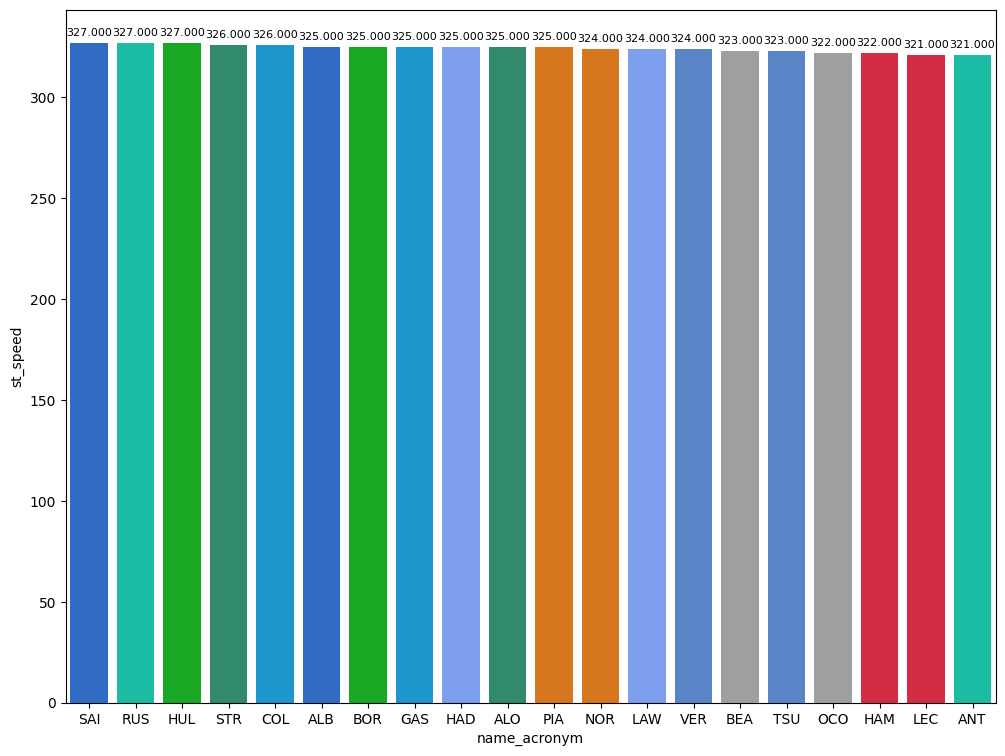

In [11]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

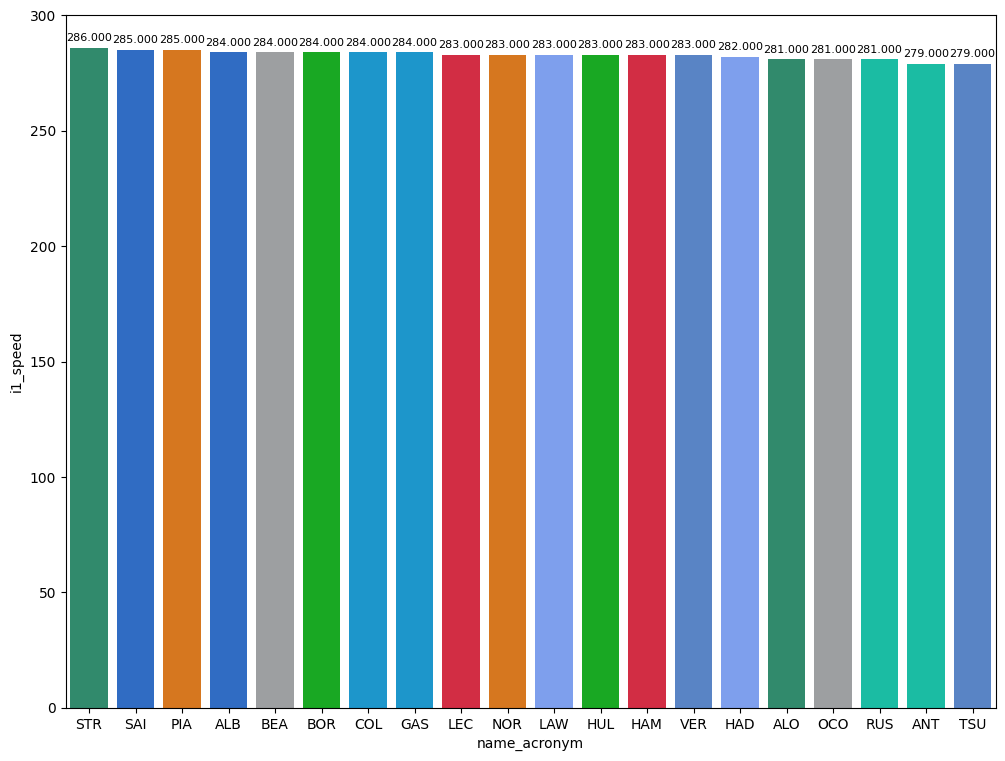

In [12]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

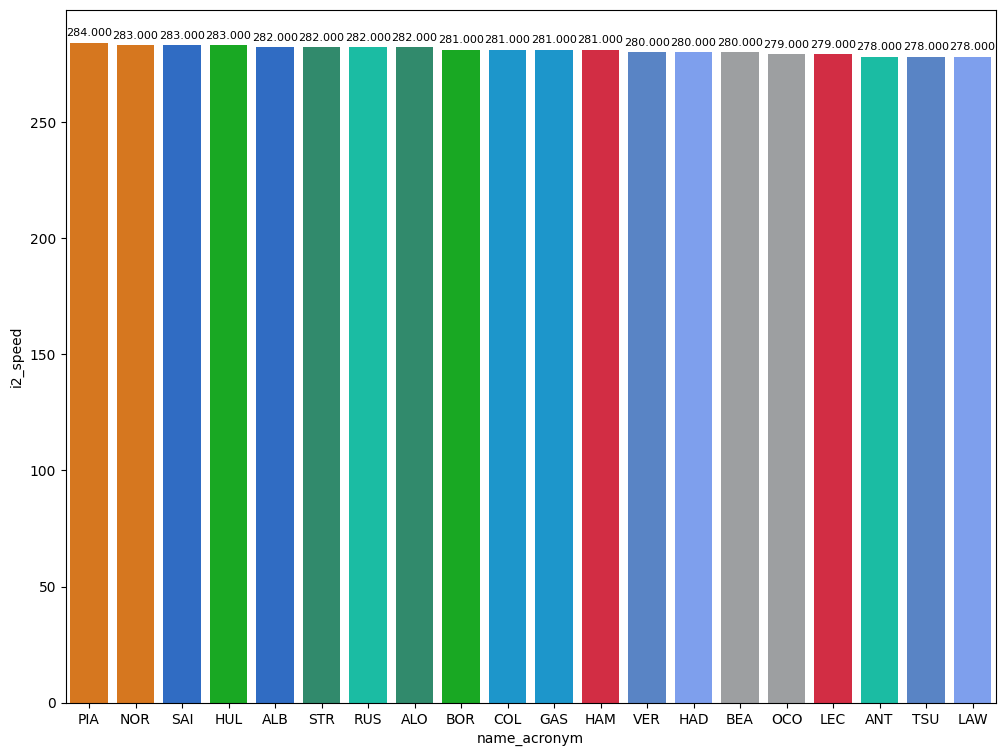

In [13]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [14]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
79    Yuki TSUNODA     HARD             25.267             25.520   
173  Oscar PIASTRI   MEDIUM             24.578             25.341   
203   Lando NORRIS     SOFT             24.154             24.878   

     duration_sector_3  lap_duration  
79              22.224        73.011  
173             21.875        71.794  
203             21.246        70.278

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [15]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


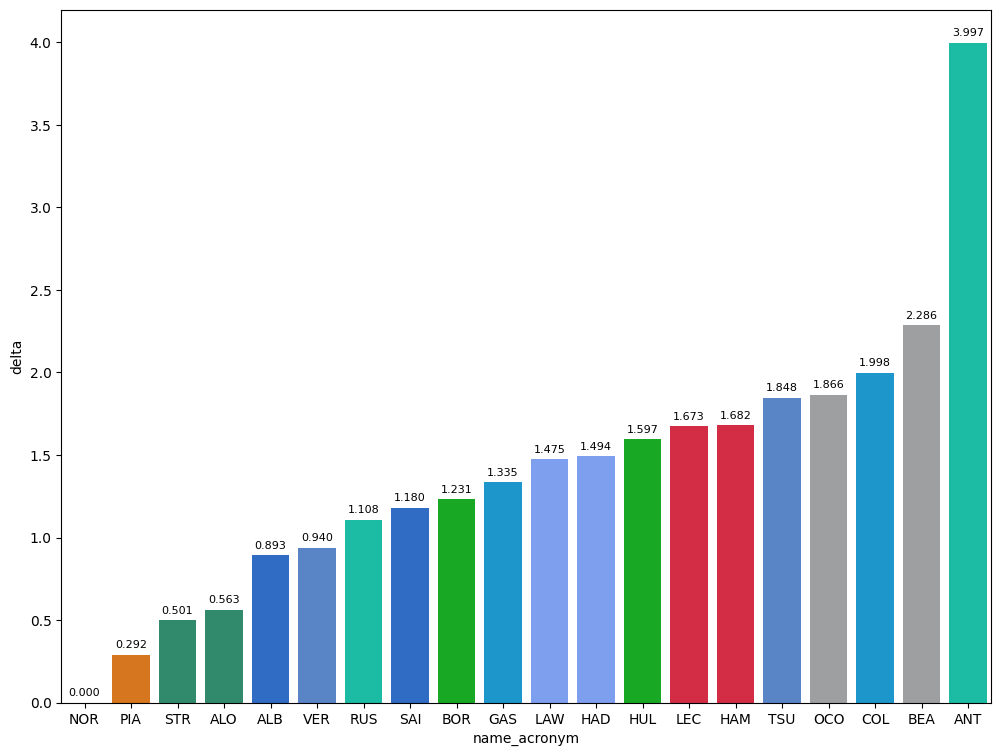

In [16]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

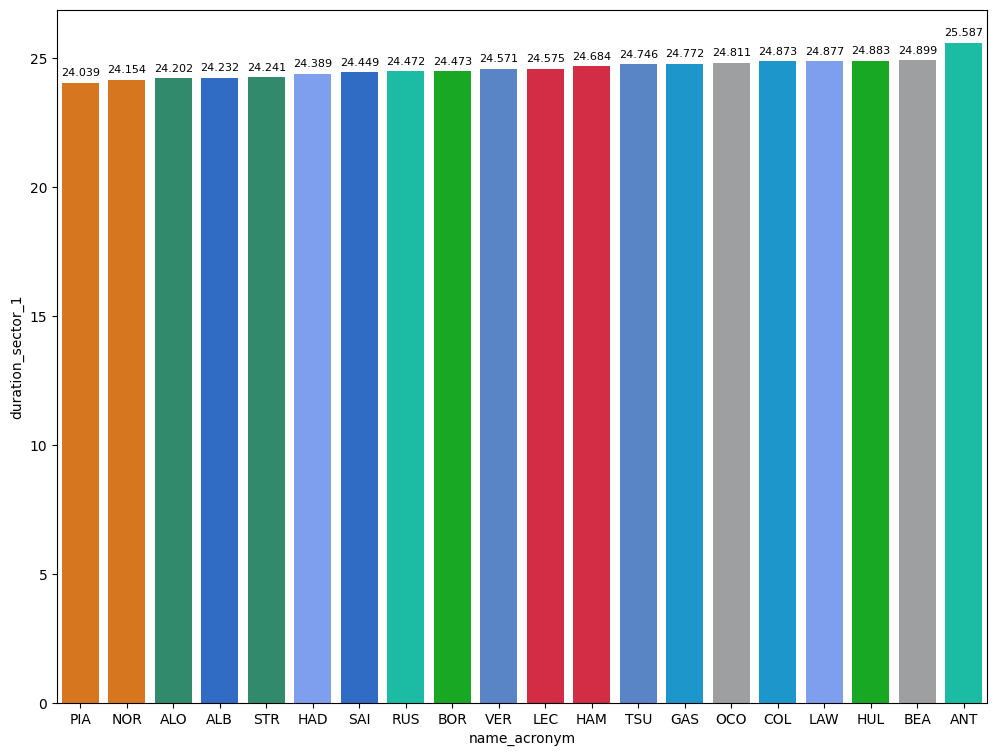

In [17]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

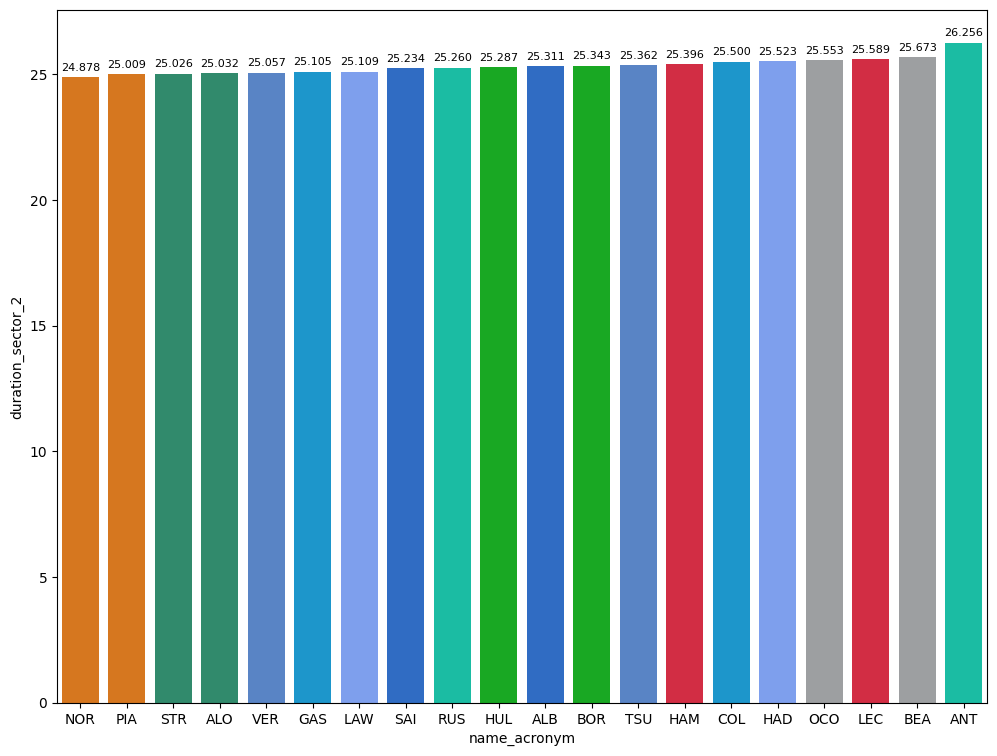

In [18]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

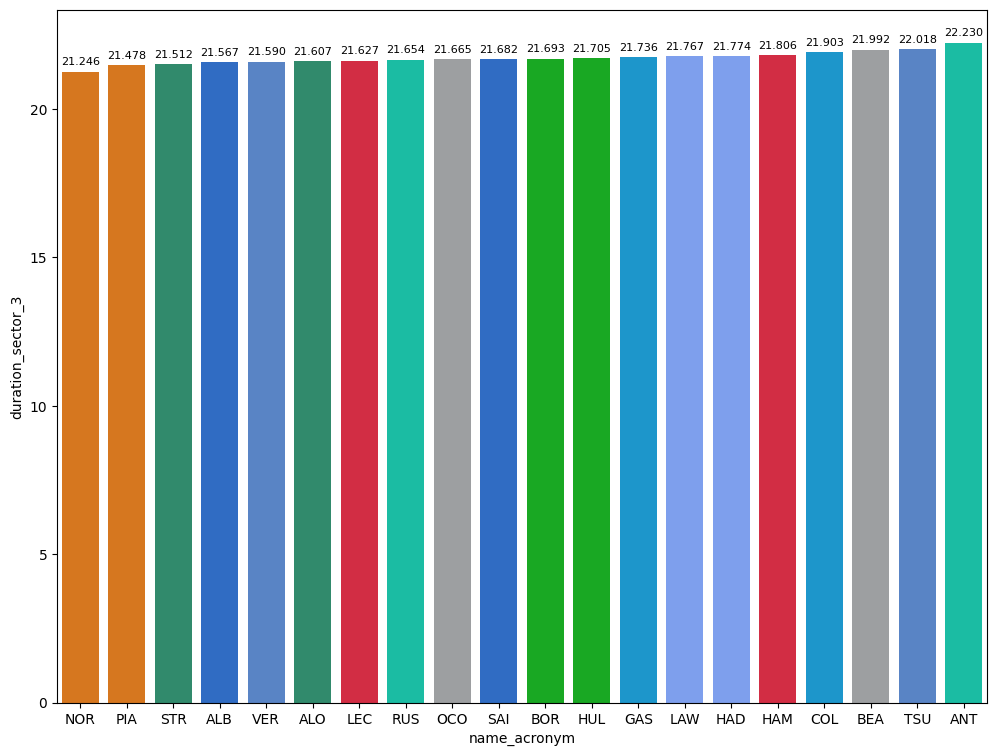

In [19]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [22]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration >88  and lap_duration <=72.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

Empty DataFrame
Columns: [lap_duration]
Index: []

## Free Practice 2
### Obtain setup

In [23]:
practice = libraryDataF1.obtain_information('laps',session_key=9914)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9914)
drivers = libraryDataF1.obtain_information('drivers',session_key=9914)

In [24]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

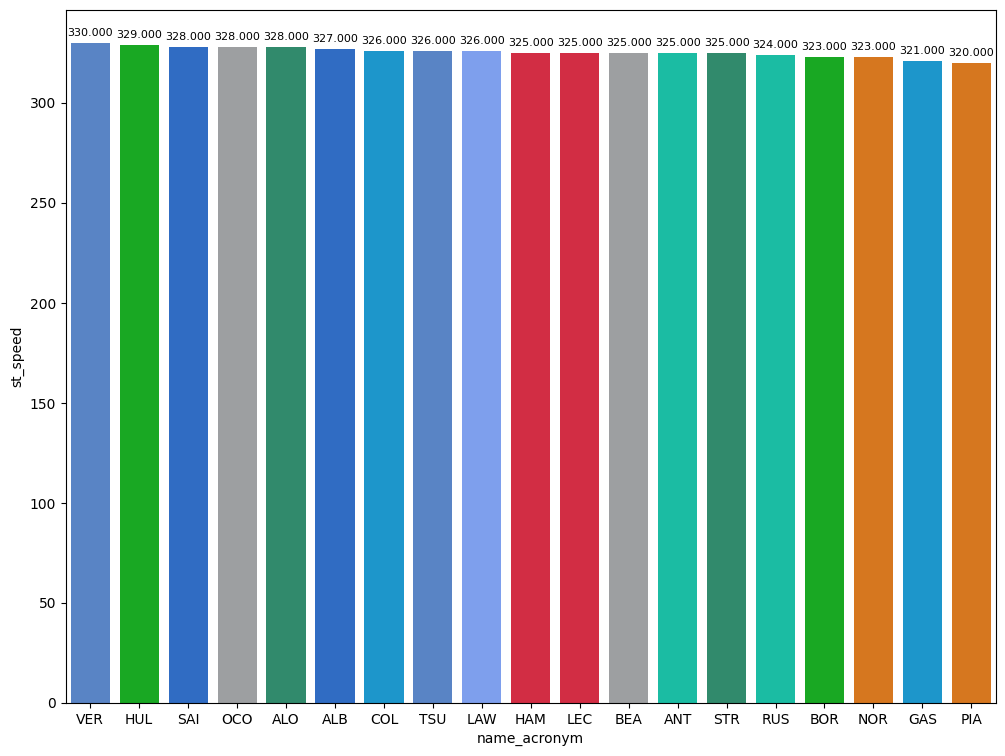

In [27]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

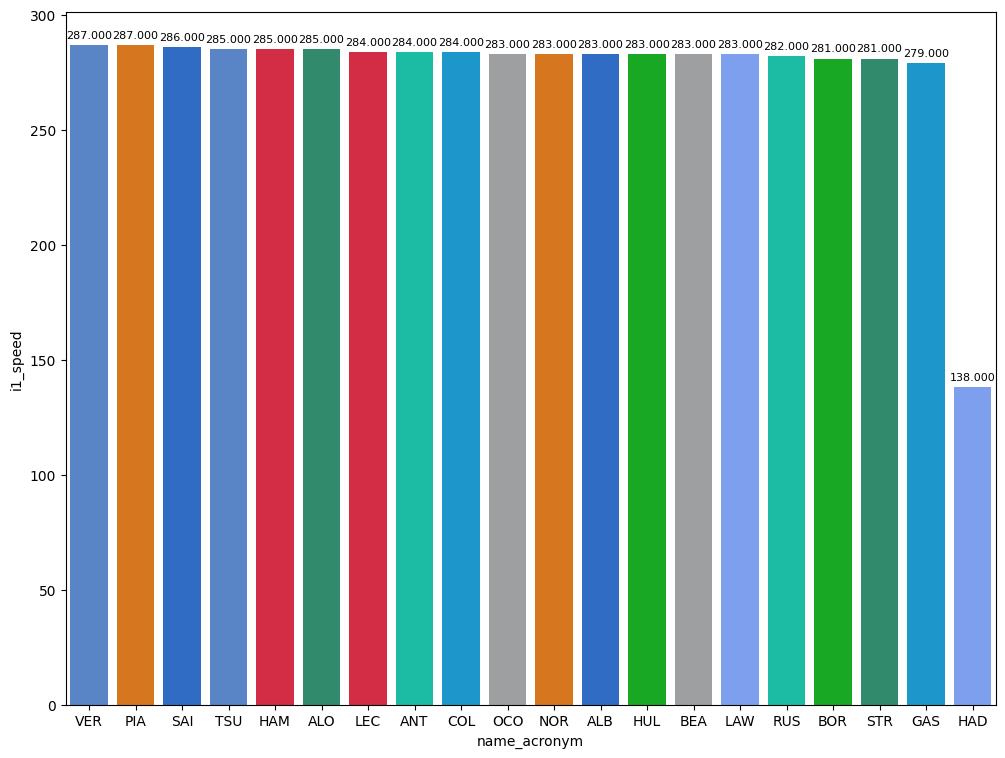

In [28]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax().dropna()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

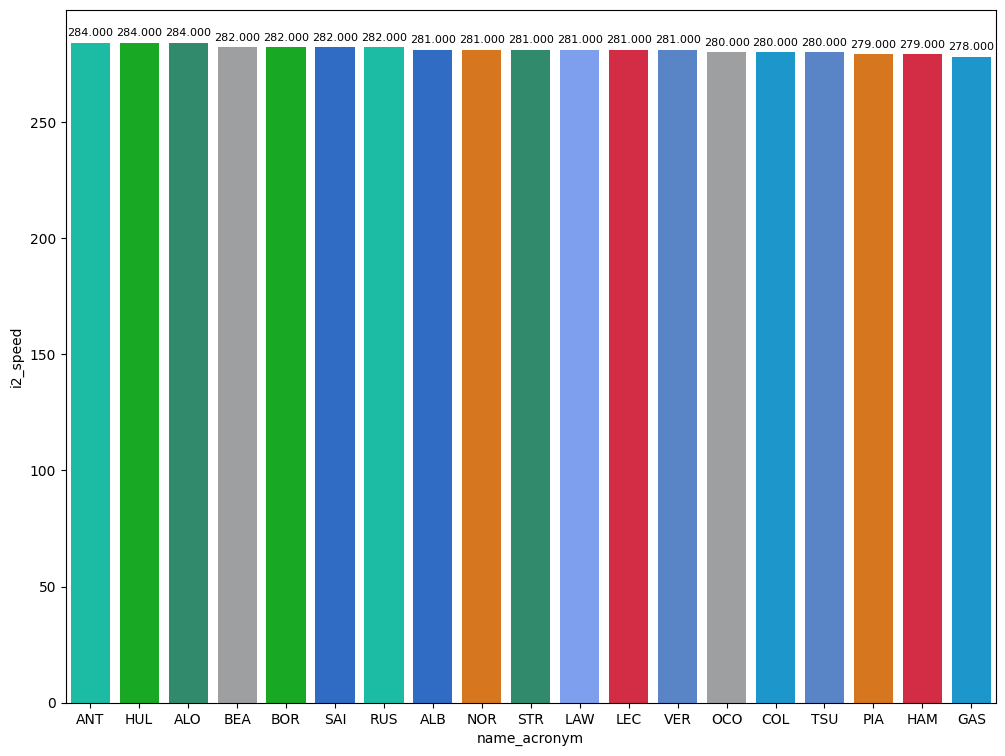

In [29]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax().dropna()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [30]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
83   Max VERSTAPPEN     HARD             24.693             25.095   
56     Lando NORRIS   MEDIUM             24.440             25.261   
200    Lando NORRIS     SOFT             24.035             24.654   

     duration_sector_3  lap_duration  
83              21.784        71.572  
56              21.593        71.294  
200             21.201        69.890

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.

In [31]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


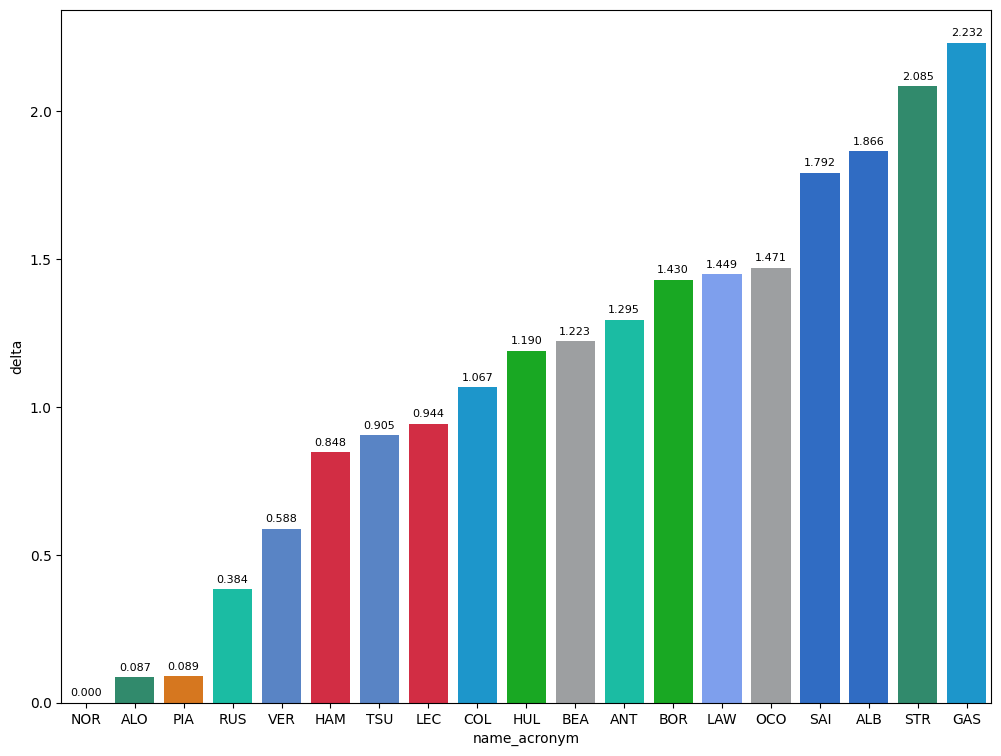

In [32]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

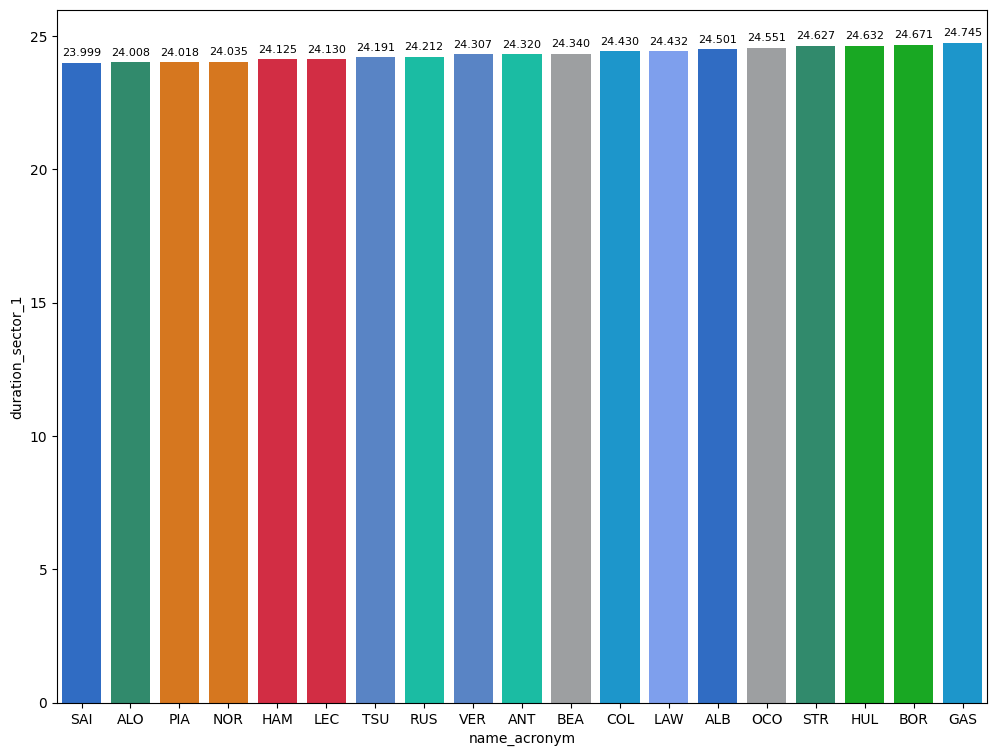

In [33]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

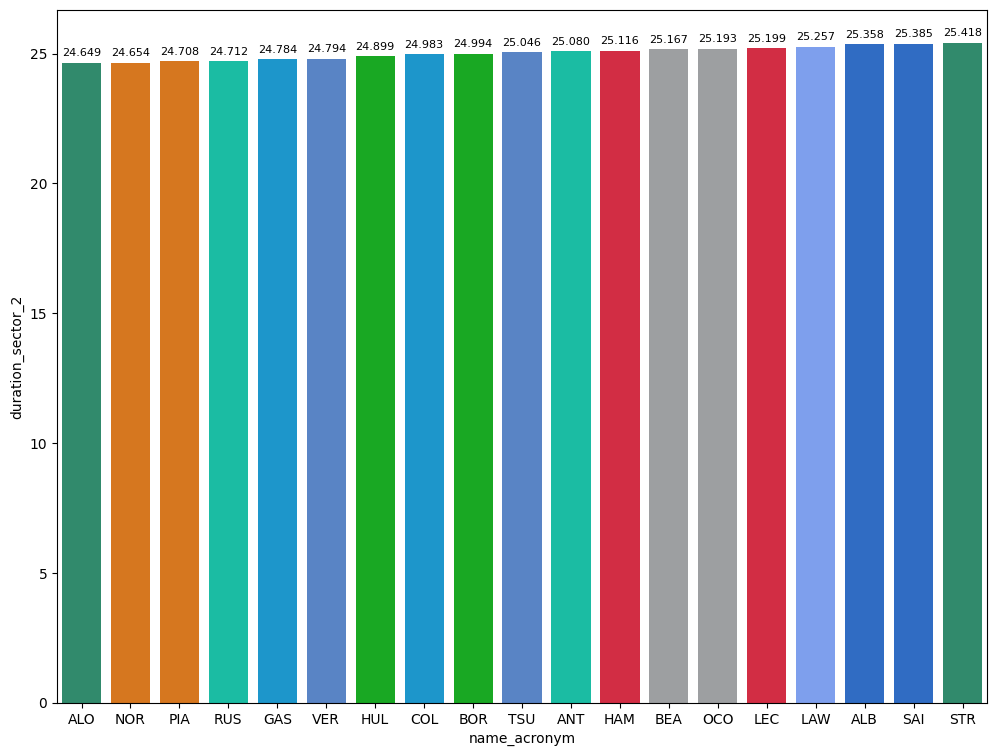

In [34]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

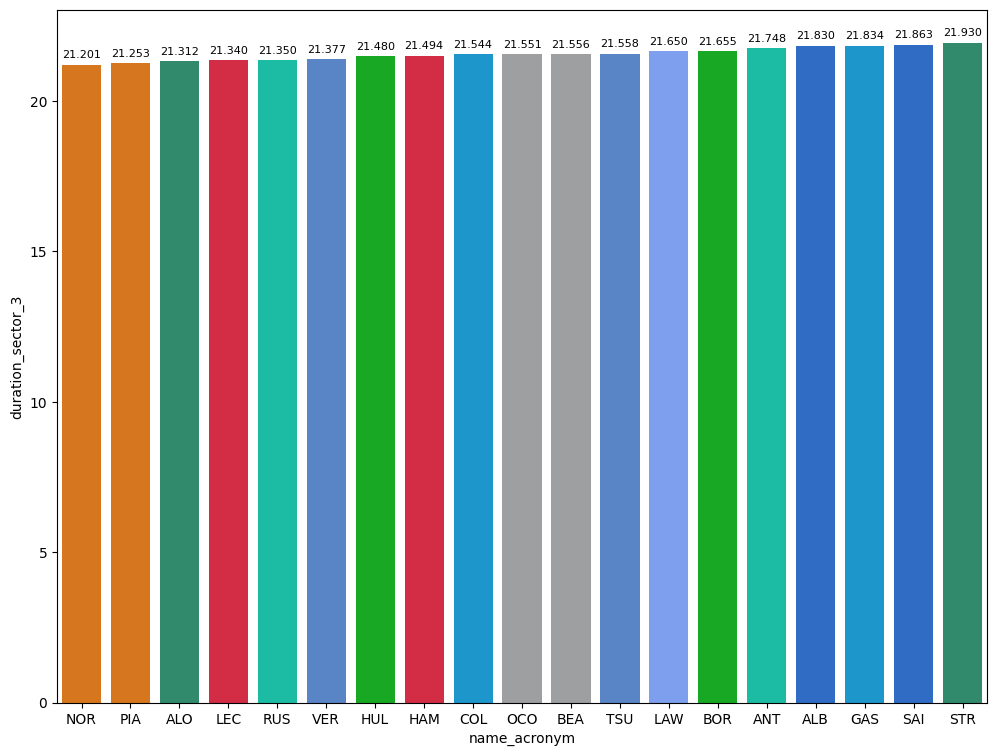

In [35]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [36]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>74.5 and lap_duration <=79").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         75.640733
HARD         75.675500
MEDIUM       76.069667

### Long runs

In [37]:
MINIMUN_SECONDS = 75
MAXIMUM_SECONDS = 78

#### Red Bull Racing

In [38]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
11         1267         9914             1              1          1        4   
12         1267         9914             1             22          1        6   
37         1267         9914             2             22          7       10   
38         1267         9914             2              1          5        7   
59         1267         9914             3              1          8       10   
63         1267         9914             3             22         11       13   
70         1267         9914             4              1         11       16   
78         1267         9914             5              1         17       23   
84         1267         9914             4             22         14       26   

   compound  tyre_age_at_start  
11     HARD                  0  
12   MEDIUM                  0  
37   MEDIUM                  6  
38     HARD                  4  
59     SOFT                  0  
63     SOFT                  0  
70     SOFT                  3  
78     HARD                  7  
84   MEDIUM                  3

In [39]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
273  Max VERSTAPPEN     SOFT  2025-08-29T14:47:16.711000+00:00          12   
288  Max VERSTAPPEN     SOFT  2025-08-29T14:48:31.612000+00:00          13   
299  Max VERSTAPPEN     SOFT  2025-08-29T14:49:46.854000+00:00          14   
310  Max VERSTAPPEN     SOFT  2025-08-29T14:51:02.229000+00:00          15   
369  Max VERSTAPPEN     HARD  2025-08-29T14:56:26.090000+00:00          19   
385  Max VERSTAPPEN     HARD  2025-08-29T14:57:41.411000+00:00          20   
400  Max VERSTAPPEN     HARD  2025-08-29T14:58:58.836000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
273             25.530             26.763             22.722        75.015  
288             25.476             27.053             22.642        75.171  
299             25.388             26.997             22.972        75.357  
310             25.450             26.932             22.807        75.189  
369             25.412             26.844             23.003        75.259  
385             25.577             28.743             23.195        77.515  
400             25.533             27.497             22.948        75.978

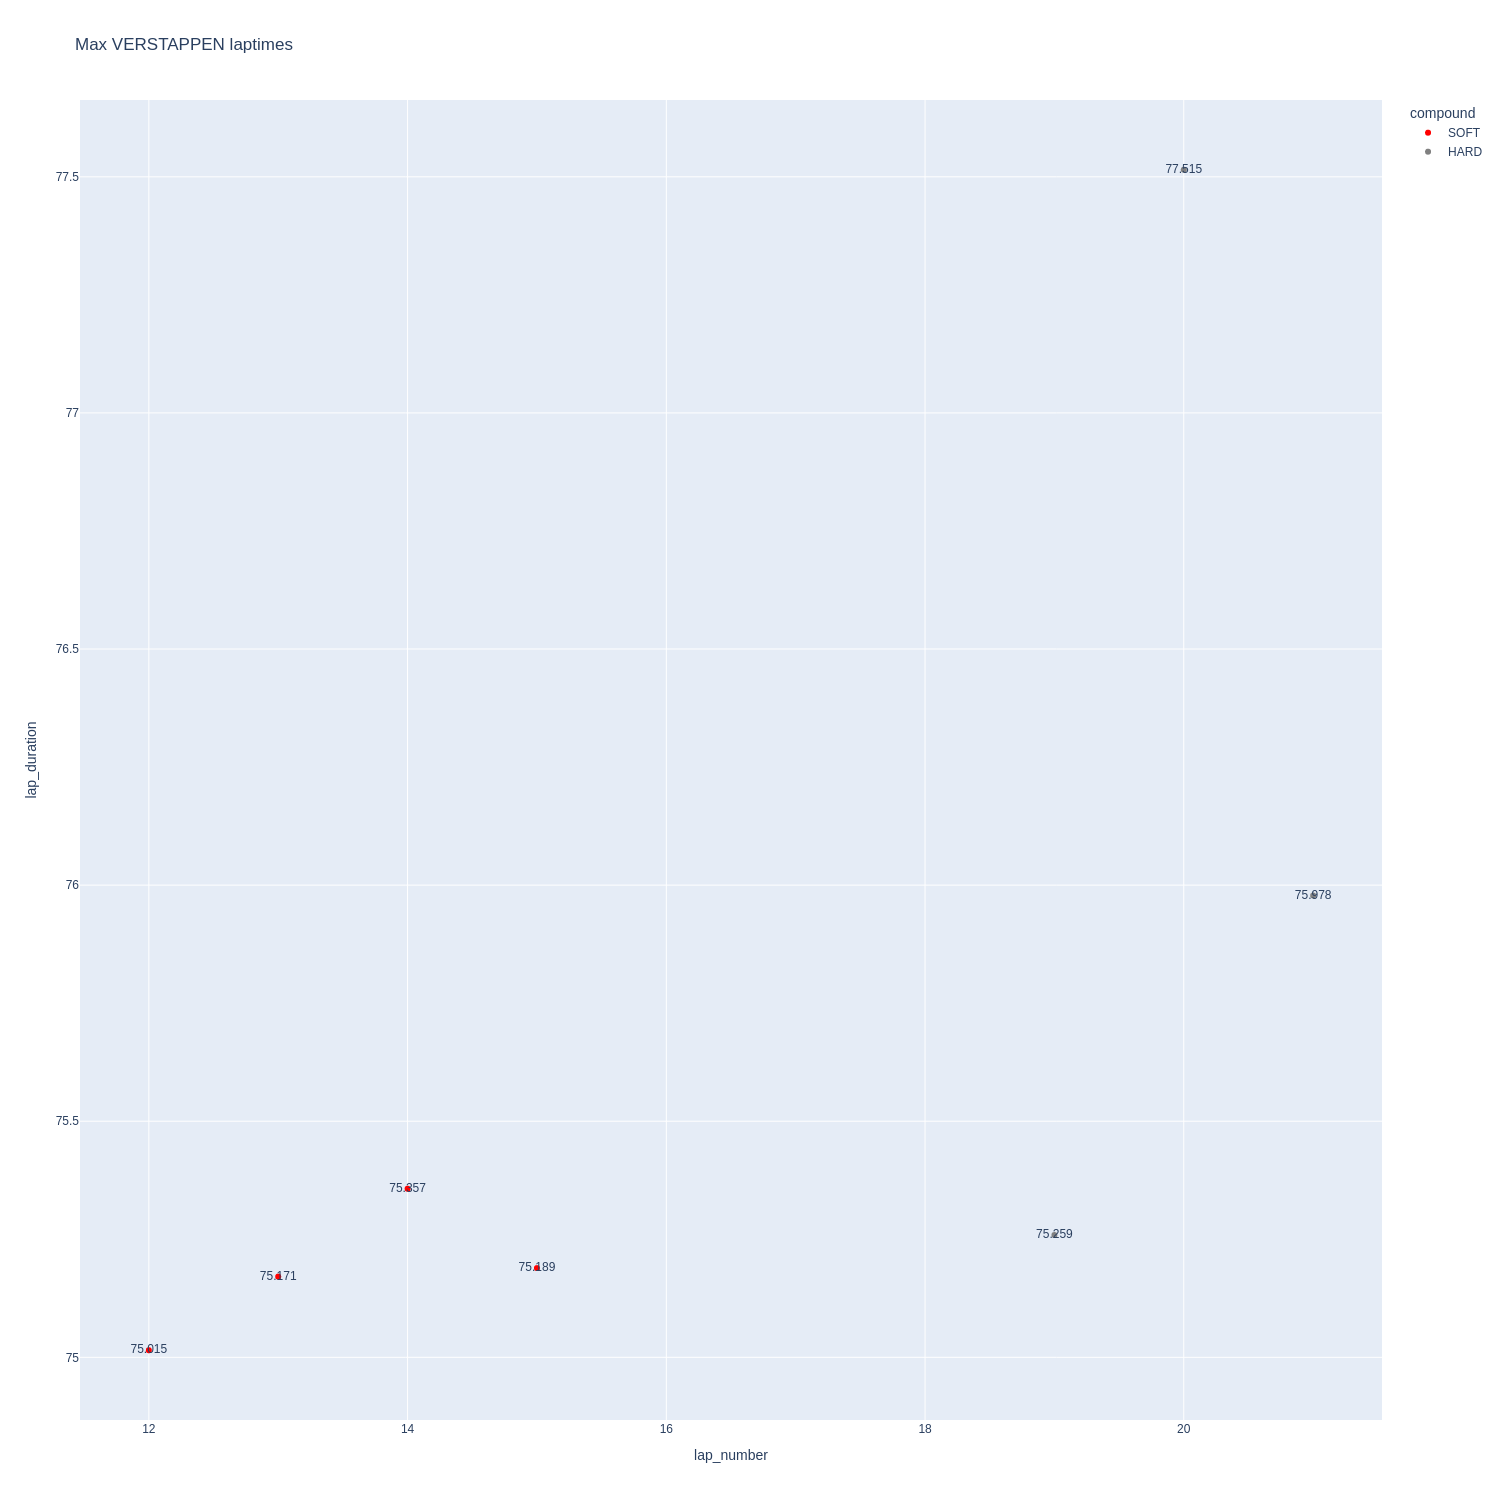

In [40]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

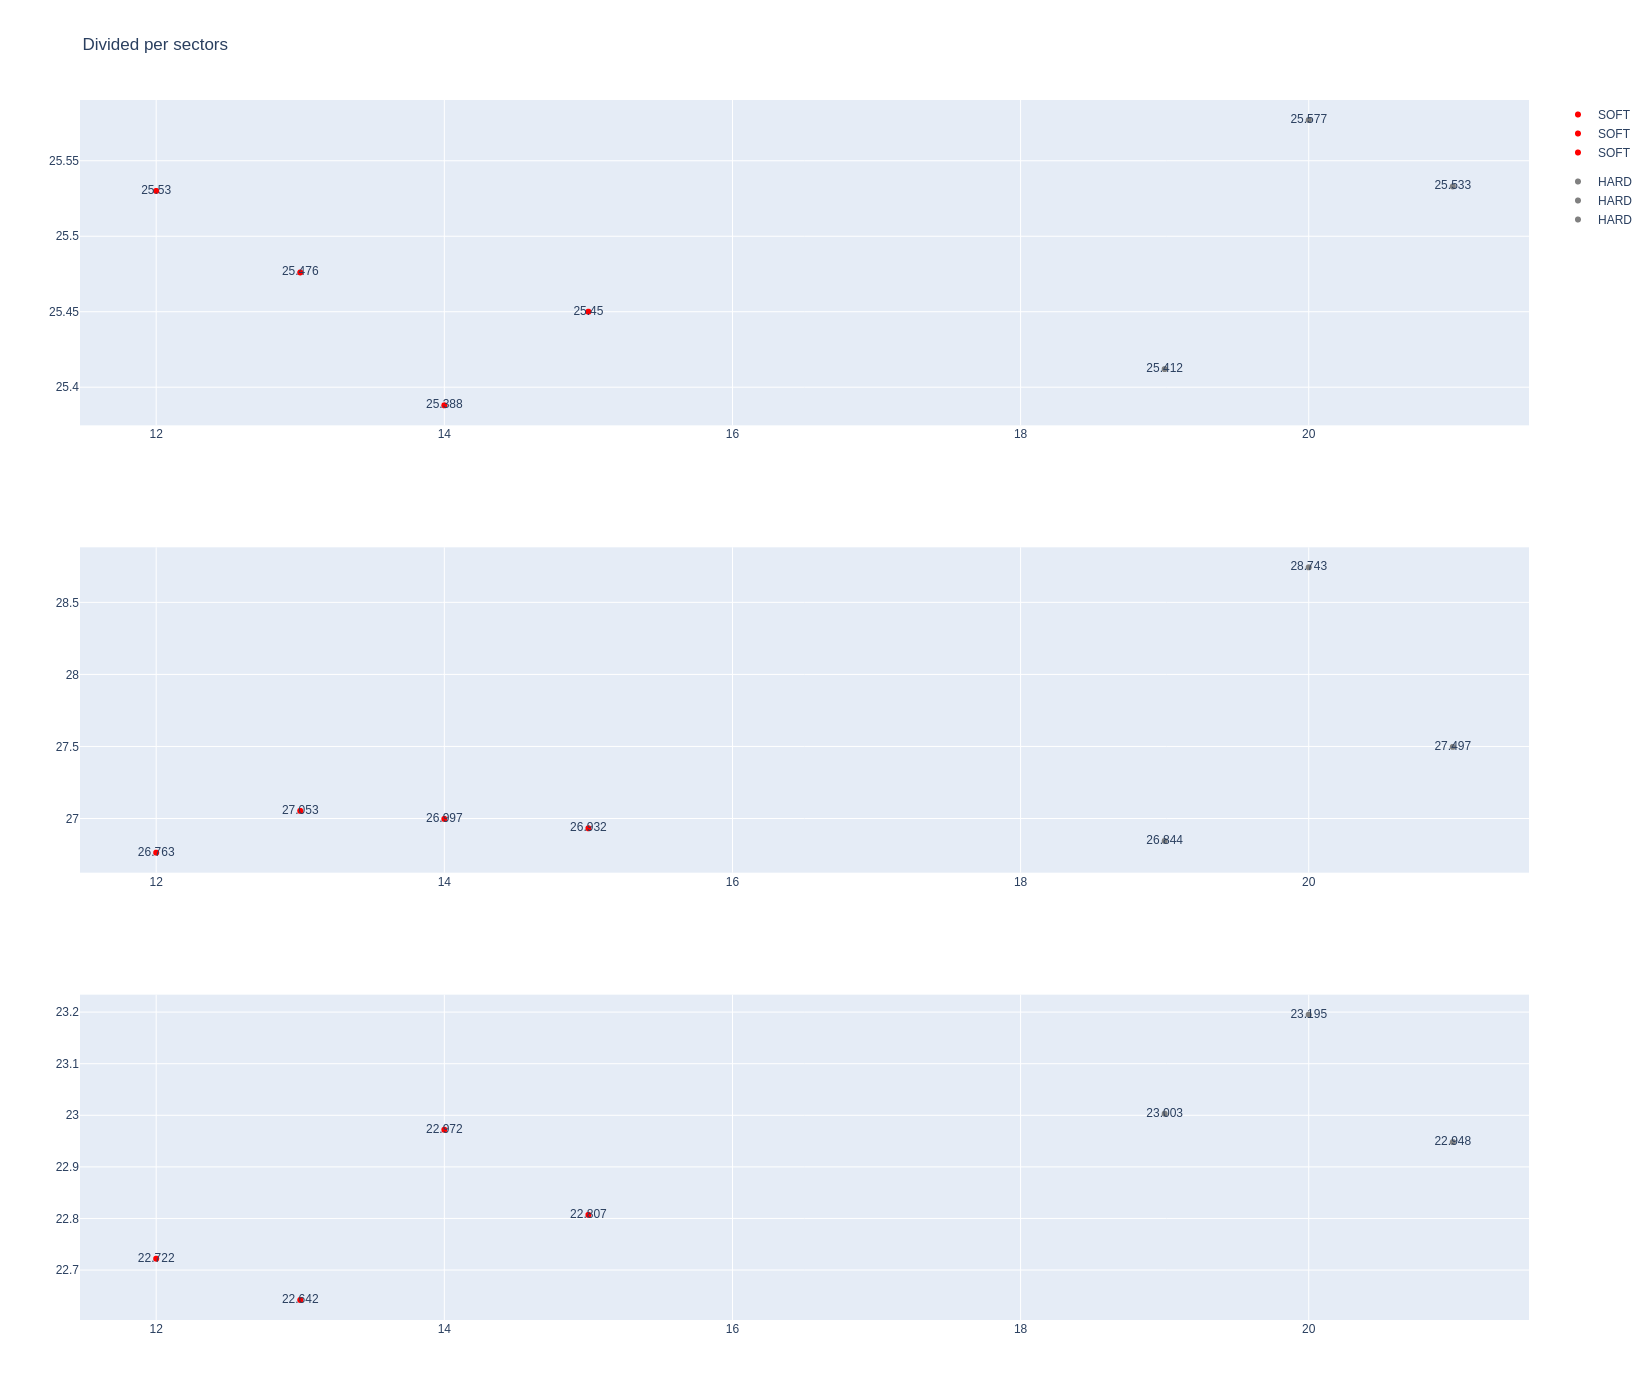

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [42]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
278  Yuki TSUNODA   MEDIUM  2025-08-29T14:47:40.221000+00:00          15   
292  Yuki TSUNODA   MEDIUM  2025-08-29T14:48:56.152000+00:00          16   
304  Yuki TSUNODA   MEDIUM  2025-08-29T14:50:12.289000+00:00          17   
314  Yuki TSUNODA   MEDIUM  2025-08-29T14:51:28.454000+00:00          18   
326  Yuki TSUNODA   MEDIUM  2025-08-29T14:52:44.764000+00:00          19   
355  Yuki TSUNODA   MEDIUM  2025-08-29T14:55:20.340000+00:00          21   
371  Yuki TSUNODA   MEDIUM  2025-08-29T14:56:36.371000+00:00          22   
404  Yuki TSUNODA   MEDIUM  2025-08-29T14:59:11.700000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
278             26.052             27.040             22.871        75.963  
292             25.922             27.312             22.847        76.081  
304             25.795             27.506             22.848        76.149  
314             25.680             27.546             23.027        76.253  
326             25.847             27.622             23.117        76.586  
355             25.839             27.342             22.979        76.160  
371             25.903             27.506             22.913        76.322  
404             25.977             27.686             23.164        76.827

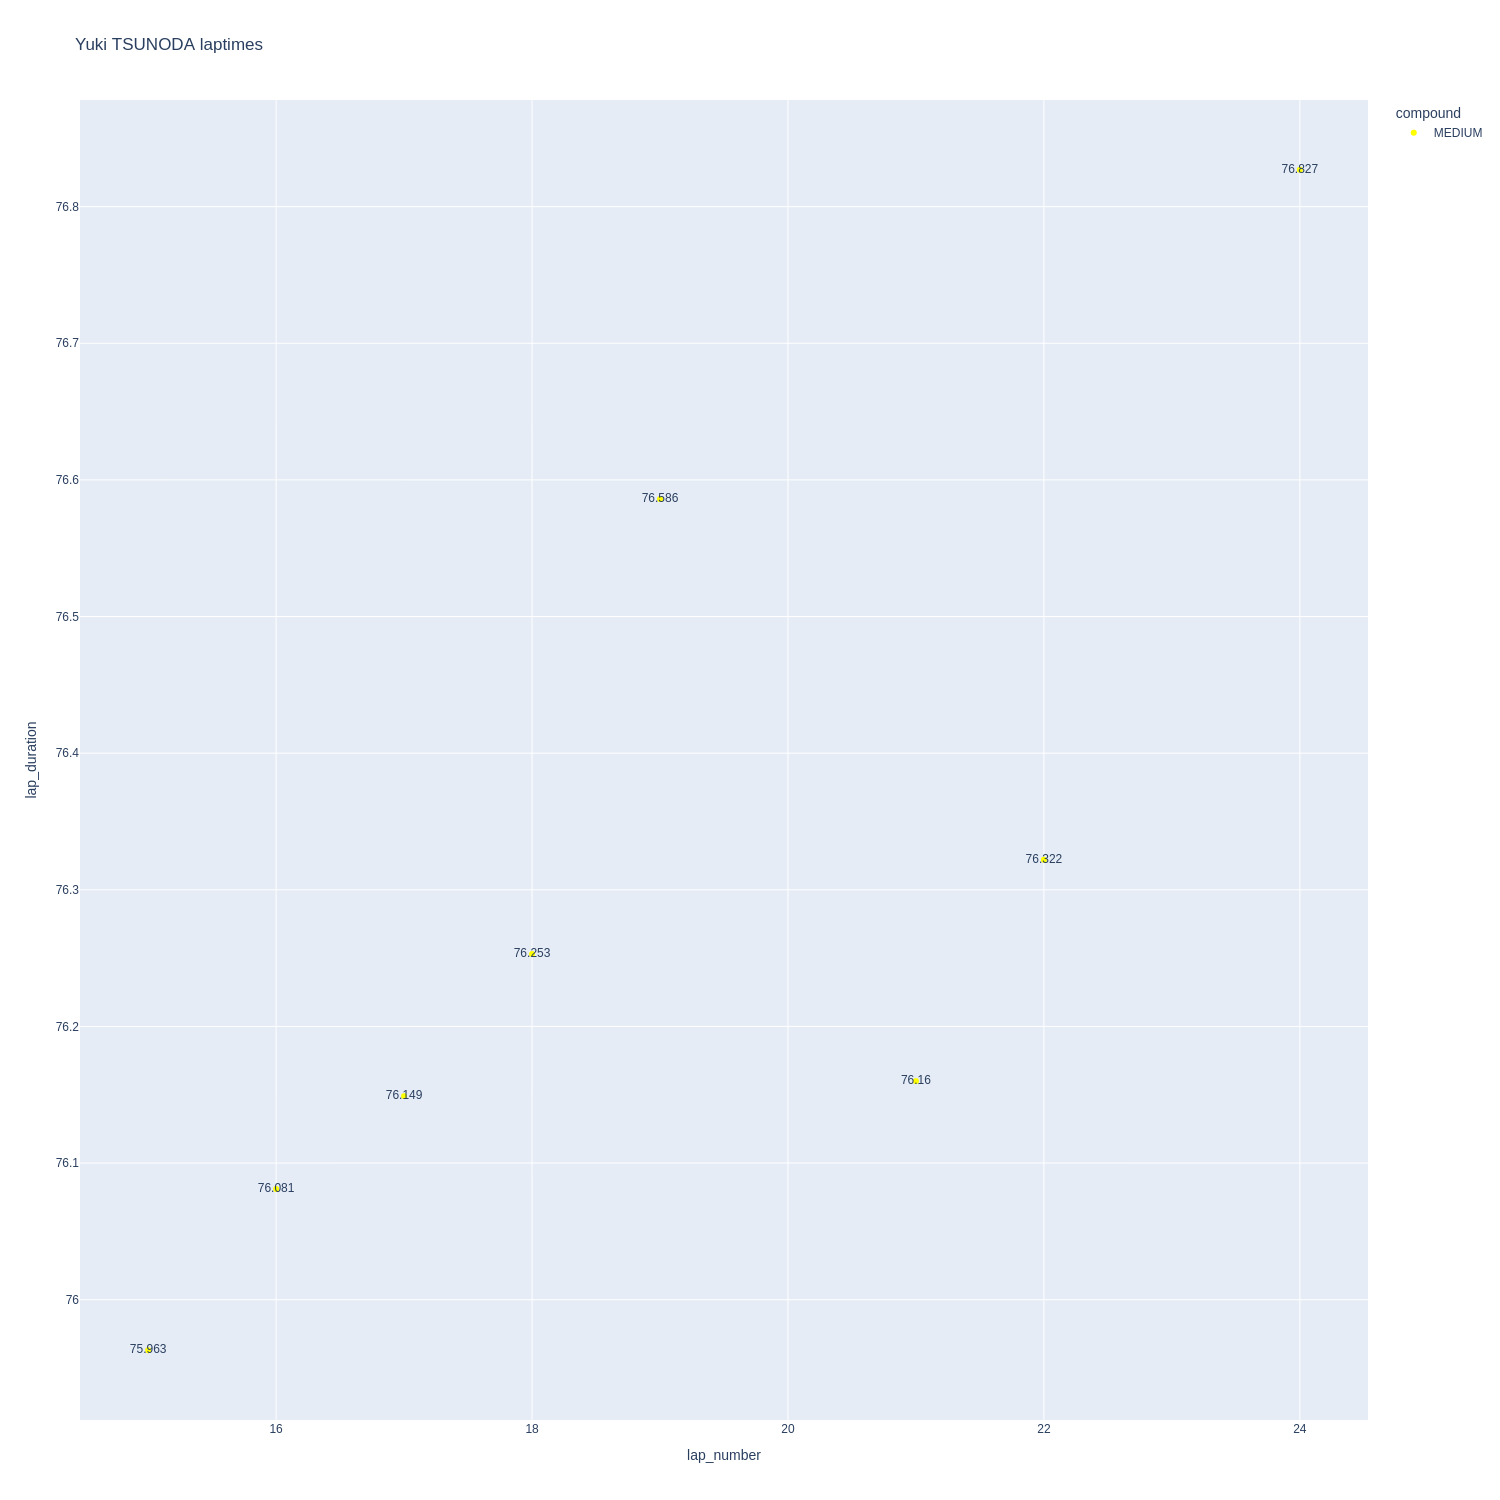

In [43]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

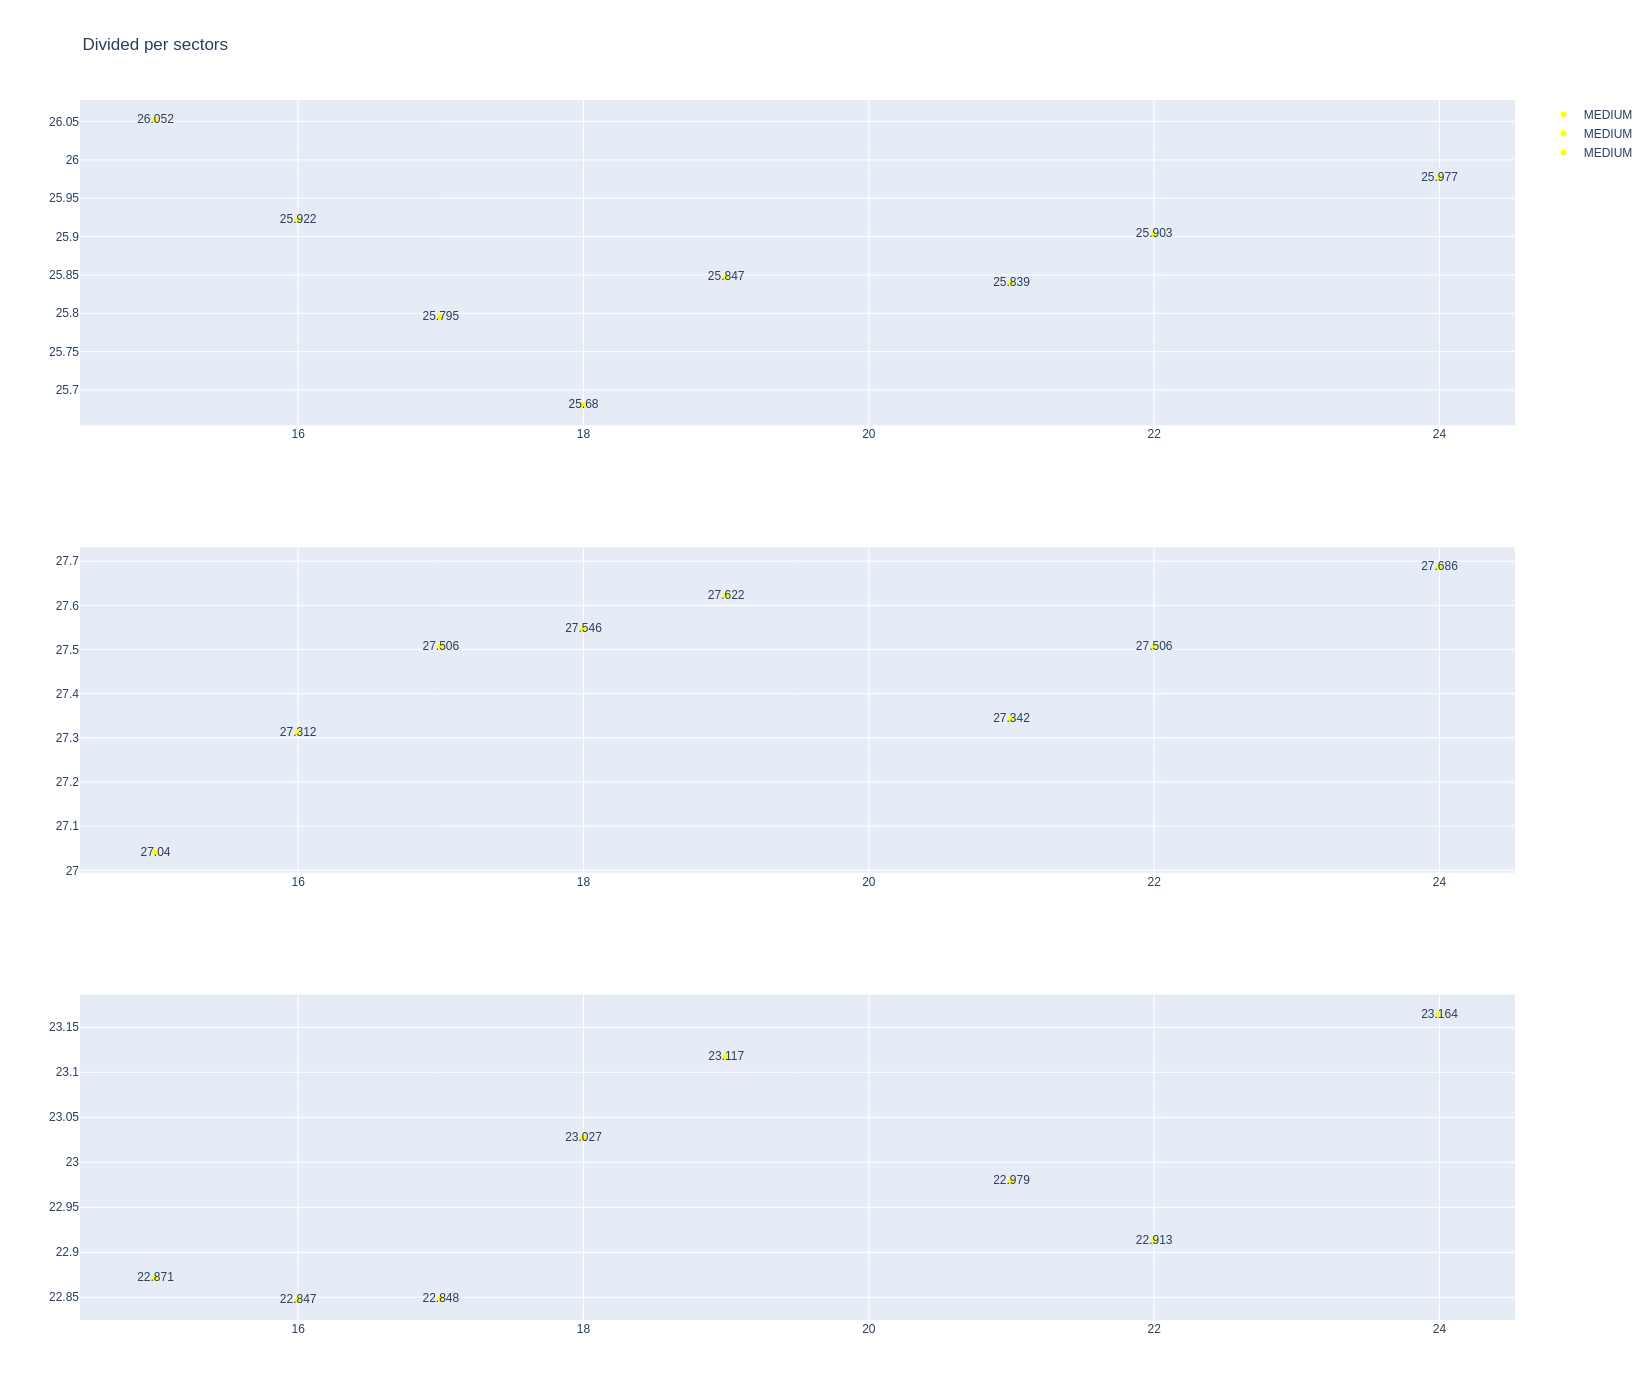

In [44]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [45]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
25         1267         9914             1             16          1        7   
28         1267         9914             1             44          1        7   
35         1267         9914             2             16          8       10   
54         1267         9914             3             16         11       13   
57         1267         9914             2             44          8       12   
67         1267         9914             3             44         13       14   
73         1267         9914             4             16         14       17   
85         1267         9914             4             44         15       22   
92         1267         9914             5             16         18       23   

   compound  tyre_age_at_start  
25     HARD                  0  
28     HARD                  0  
35     HARD                  7  
54     SOFT                  0  
57     SOFT                  0  
67     SOFT                  5  
73     SOFT                  0  
85     HARD                  7  
92     SOFT                  7

In [46]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
394  Charles LECLERC     SOFT  2025-08-29T14:58:21.934000+00:00          20   
411  Charles LECLERC     SOFT  2025-08-29T14:59:37.506000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
394             25.551             27.174             22.854        75.579  
411             25.525             27.421             23.975        76.921

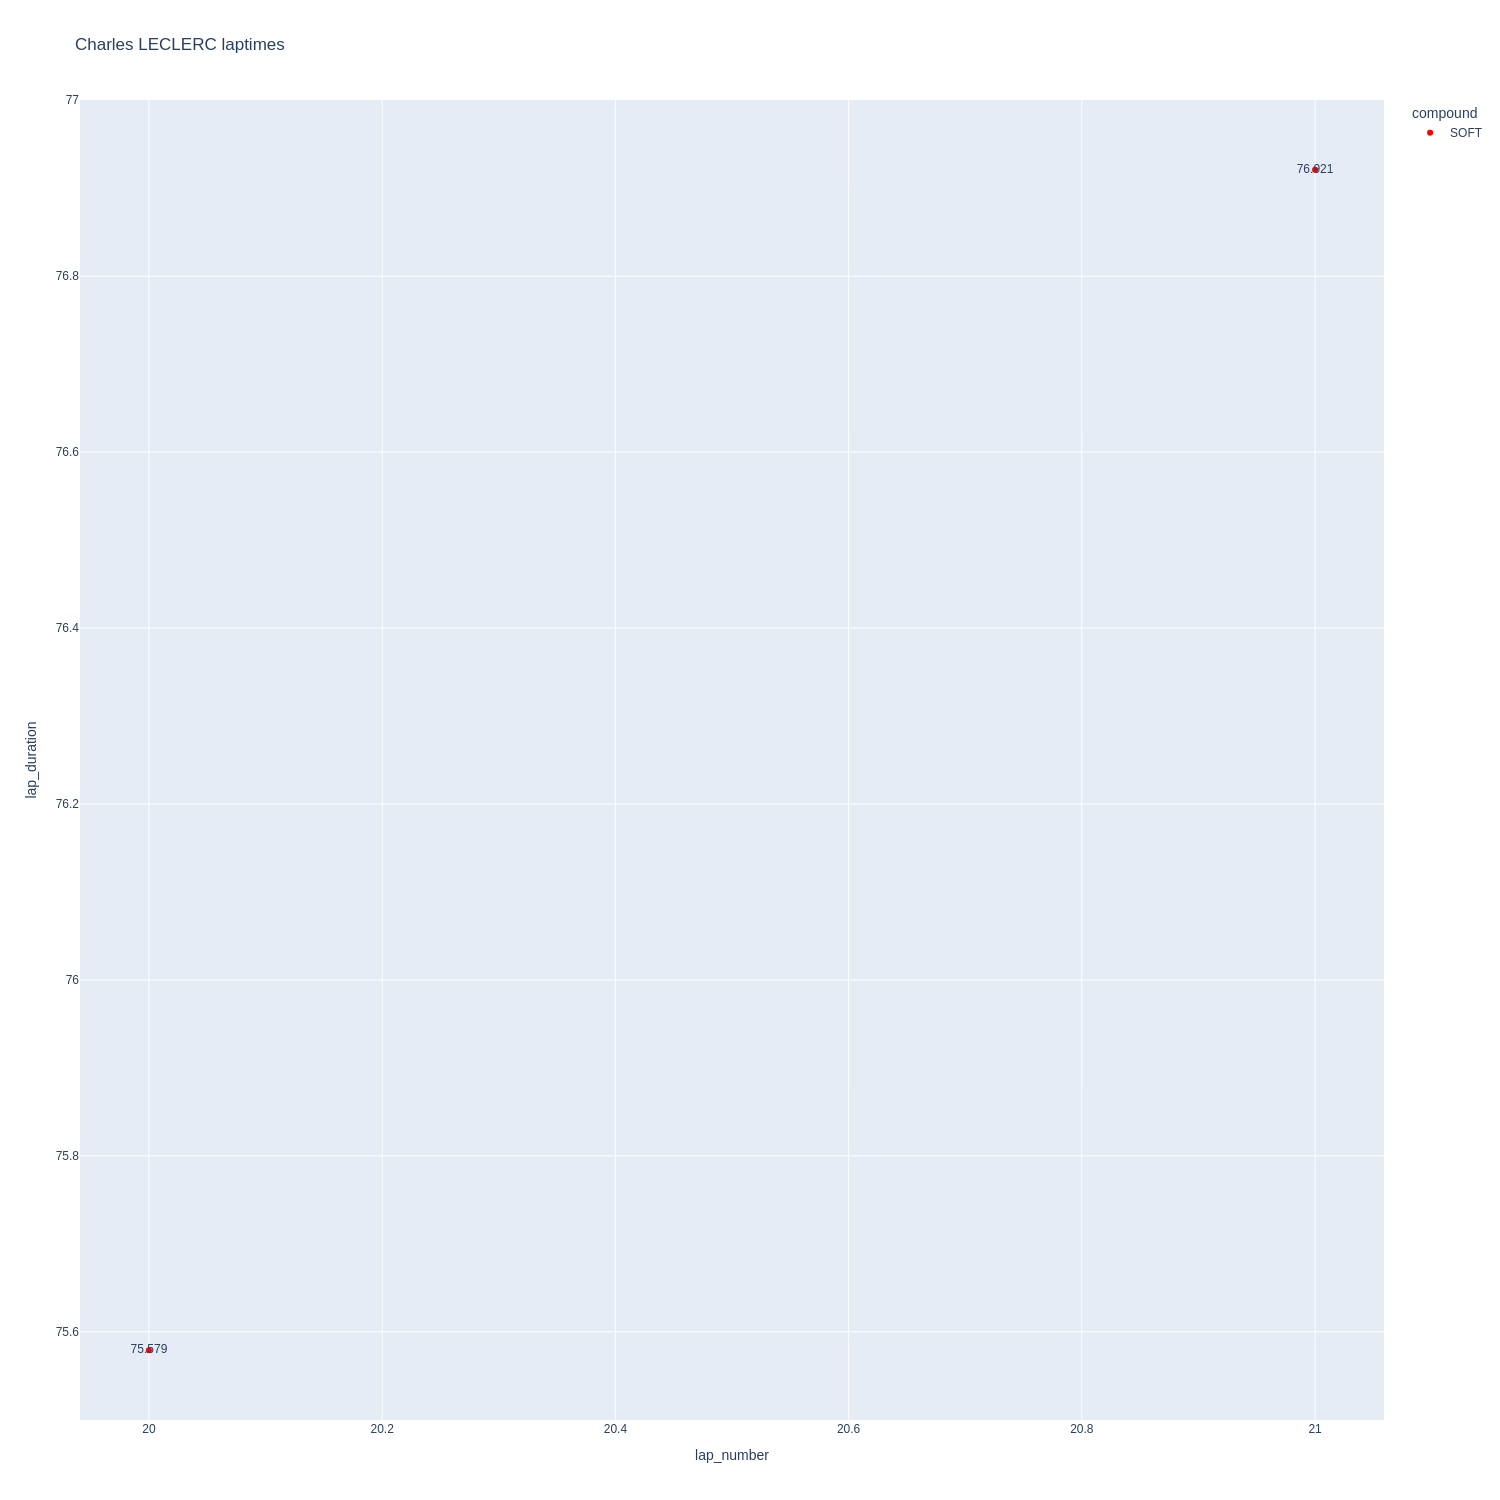

In [47]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

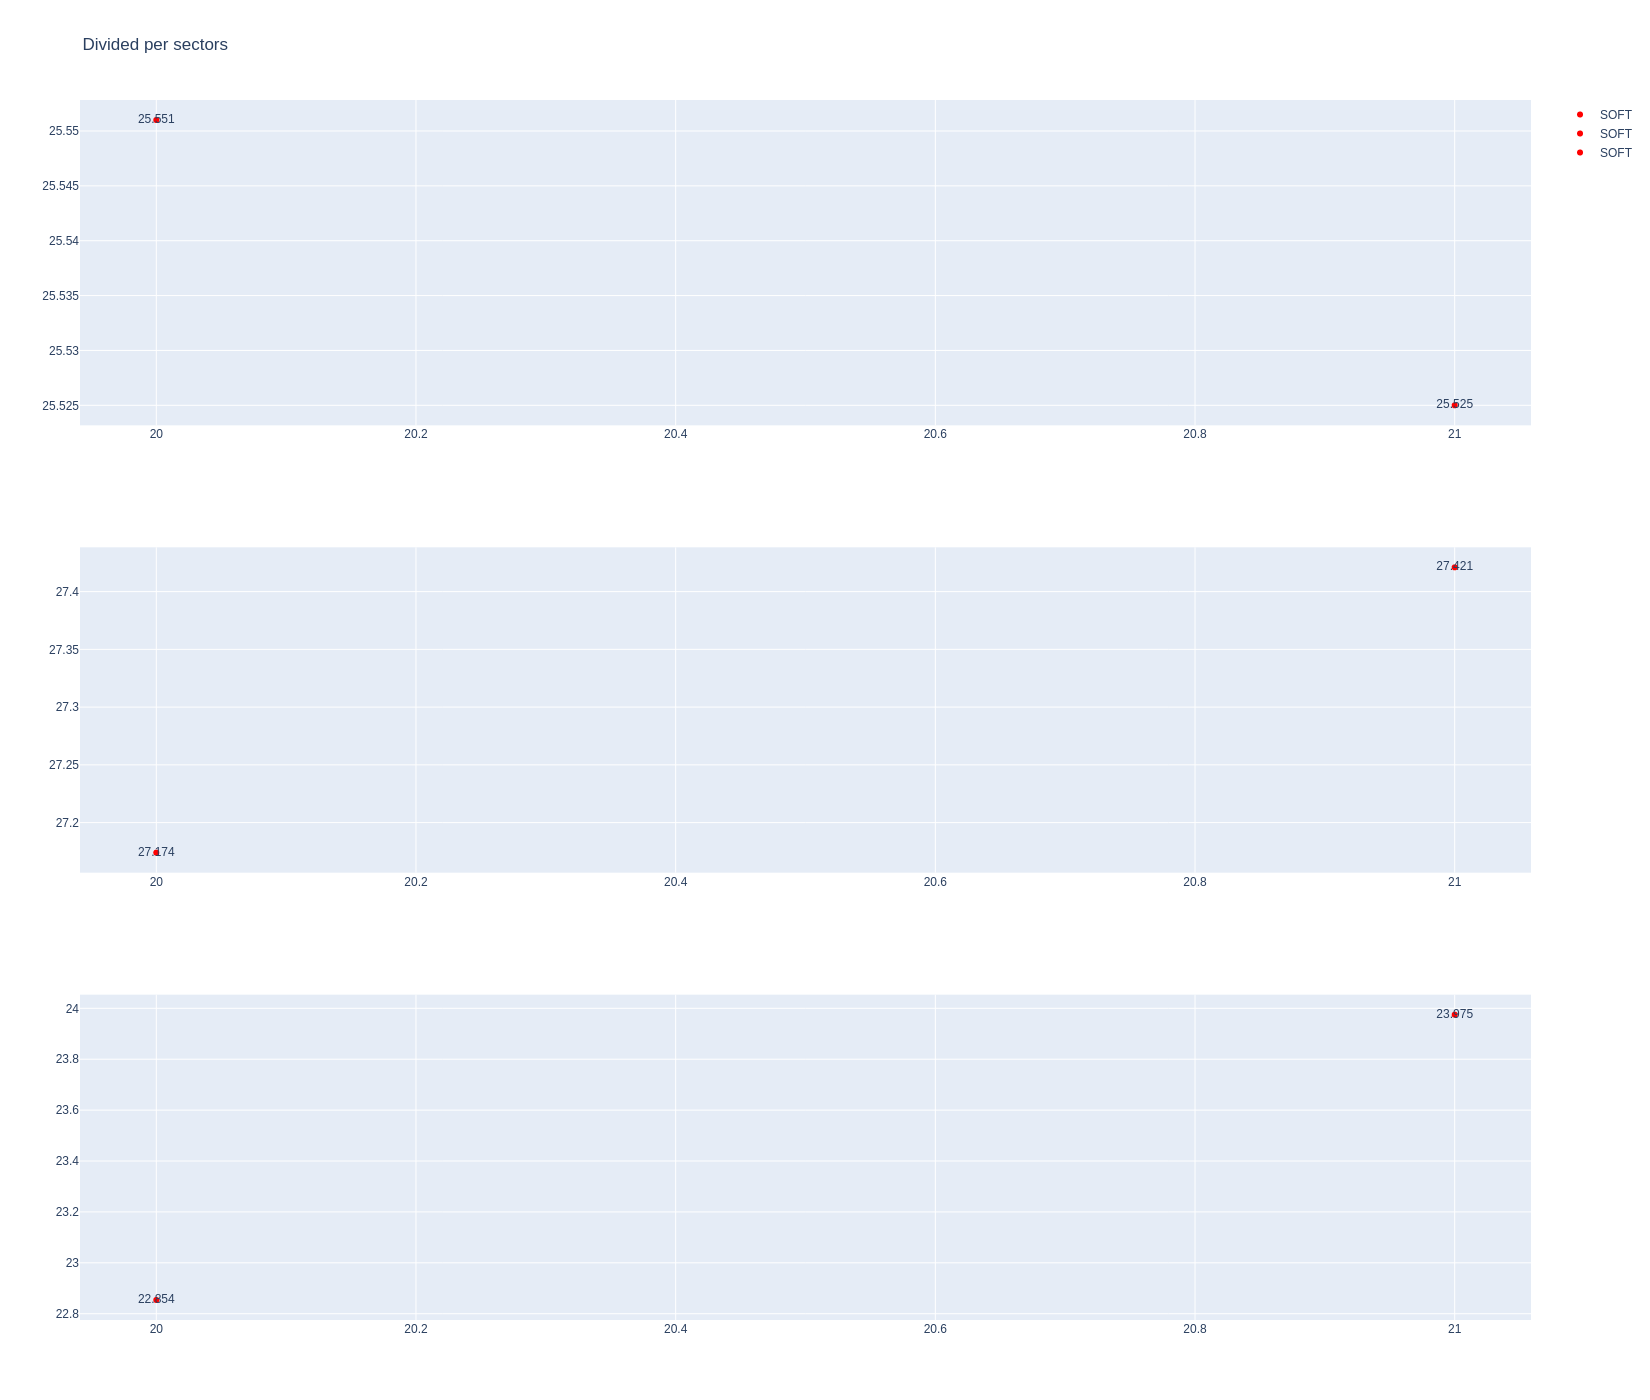

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [49]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
270  Lewis HAMILTON     SOFT  2025-08-29T14:47:04.758000+00:00          14   
340  Lewis HAMILTON     HARD  2025-08-29T14:54:00.079000+00:00          16   
354  Lewis HAMILTON     HARD  2025-08-29T14:55:15.511000+00:00          17   
370  Lewis HAMILTON     HARD  2025-08-29T14:56:30.855000+00:00          18   
386  Lewis HAMILTON     HARD  2025-08-29T14:57:46.225000+00:00          19   
401  Lewis HAMILTON     HARD  2025-08-29T14:59:01.224000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
270             24.125             25.387             25.900        75.412  
340             25.696             26.949             22.762        75.407  
354             25.547             26.815             22.964        75.326  
370             25.566             26.975             22.767        75.308  
386             25.399             26.890             22.730        75.019  
401             25.871             27.400             22.969        76.240

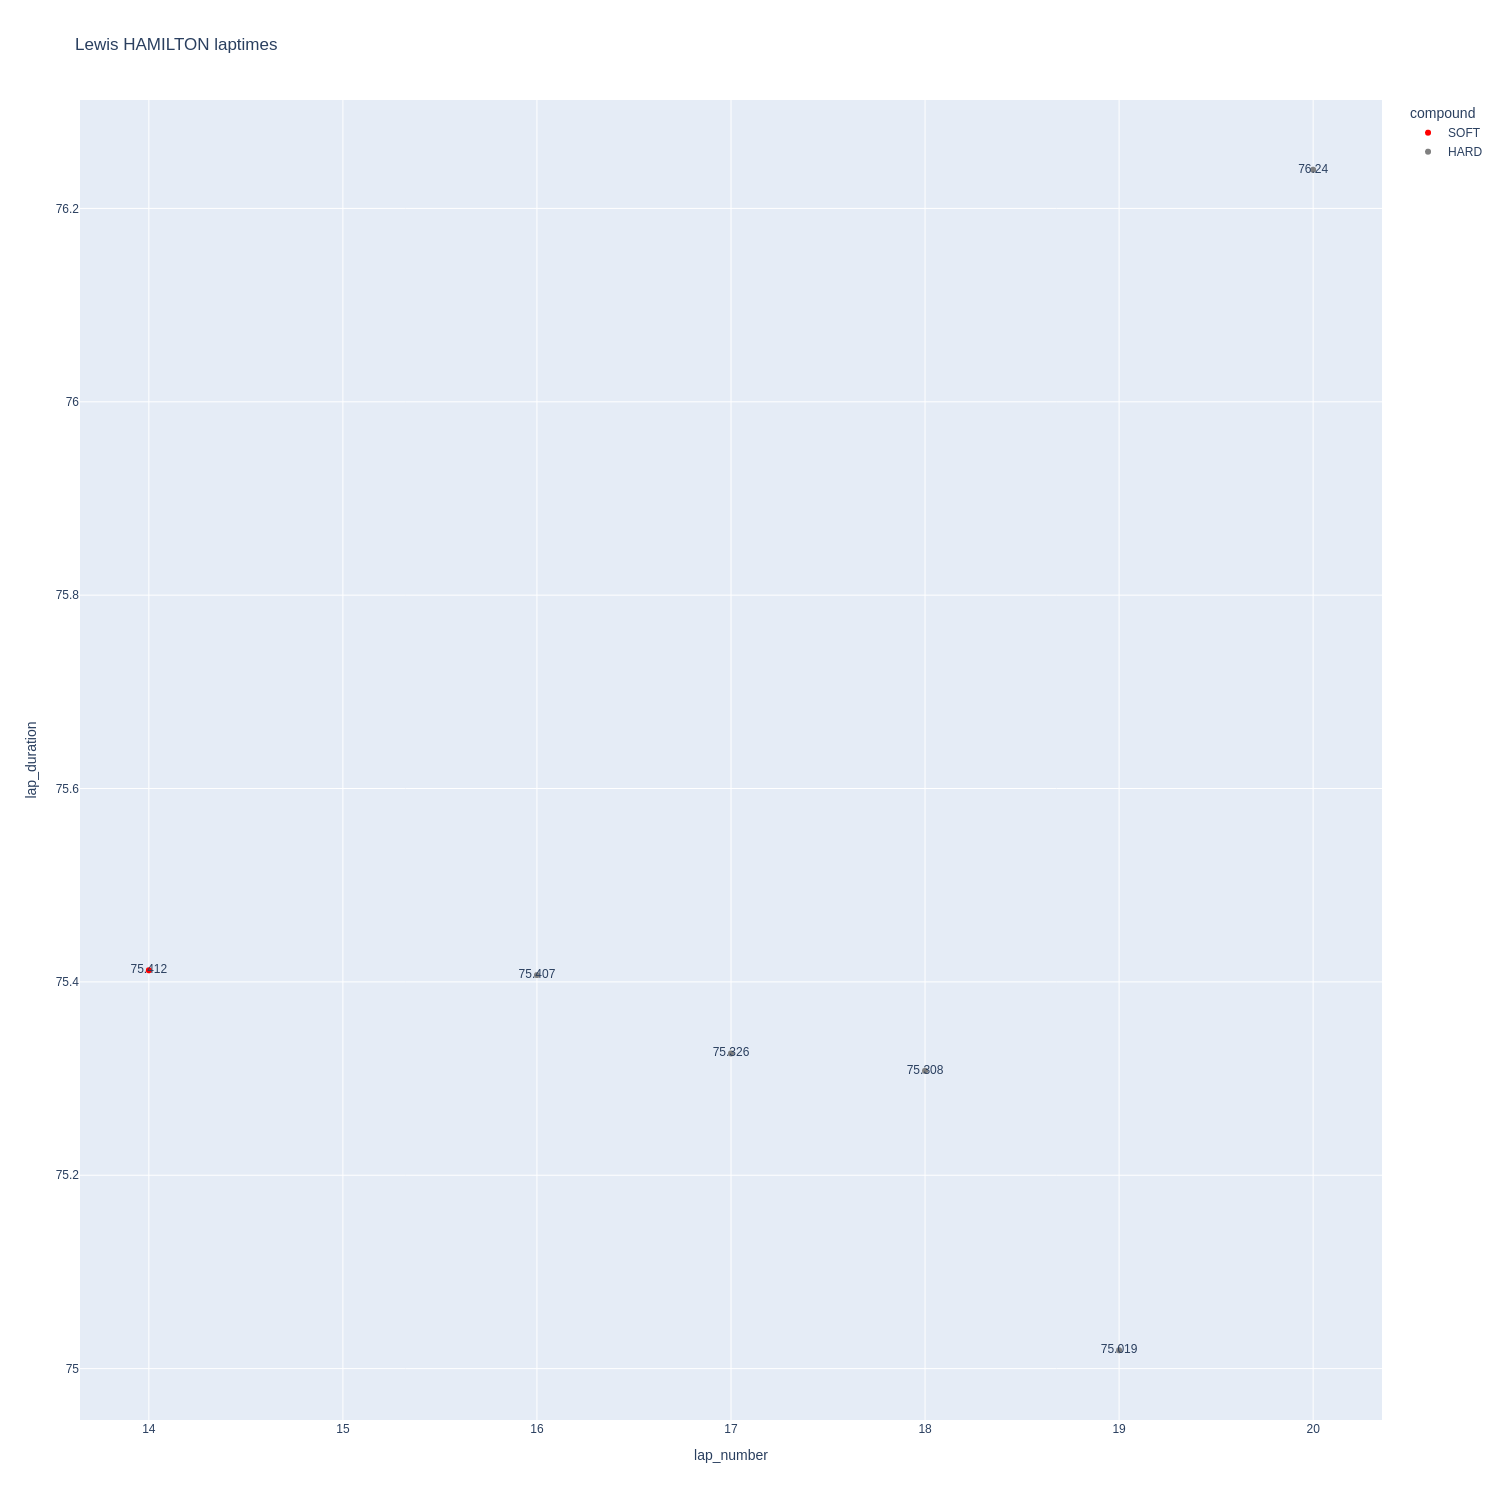

In [50]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

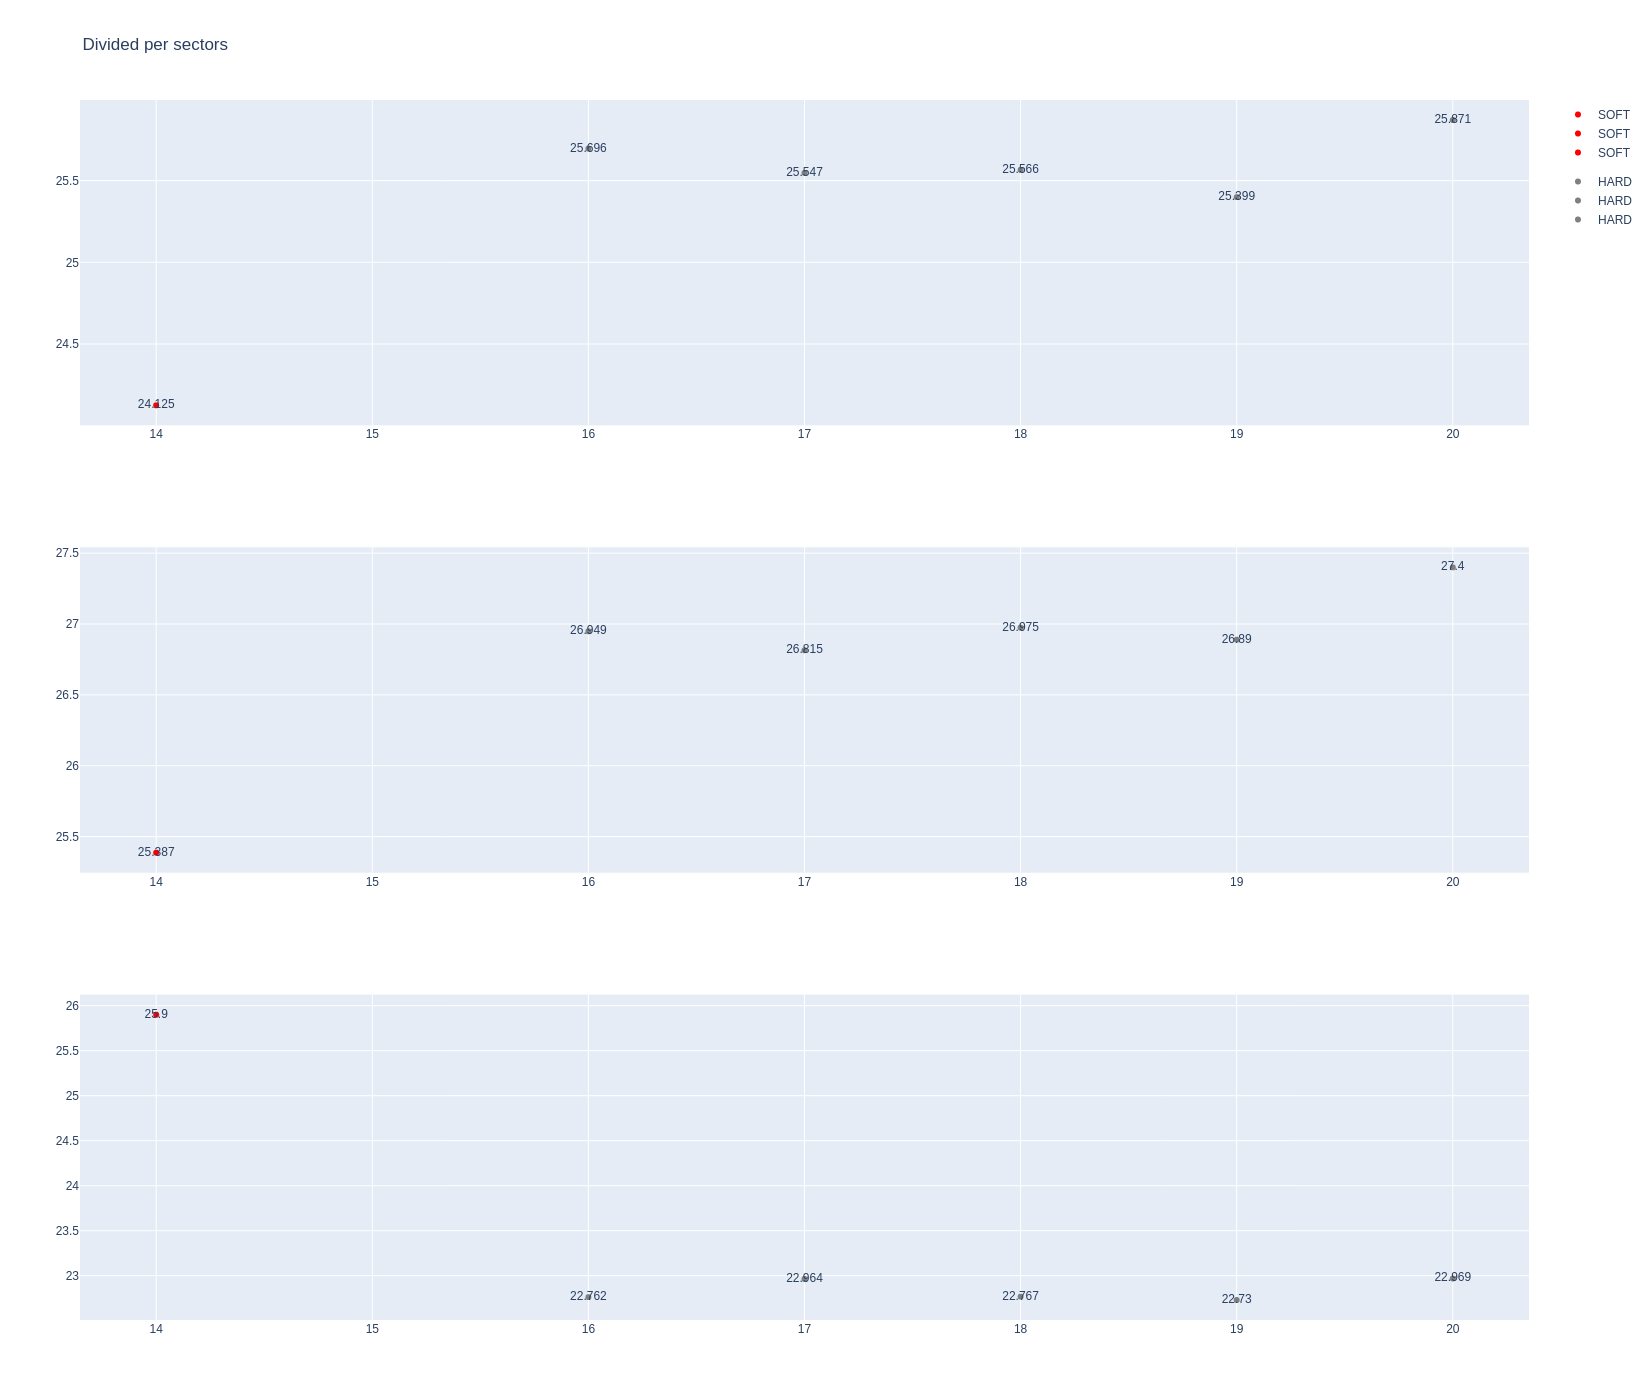

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [52]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
19         1267         9914             1             12          1        6   
21         1267         9914             1             63          1        6   
27         1267         9914             2             12          7        8   
32         1267         9914             2             63          7        8   
44         1267         9914             3             12          9       11   
52         1267         9914             4             12         12       12   
61         1267         9914             3             63          9       12   
66         1267         9914             5             12         13       15   
76         1267         9914             6             12         16       18   
81         1267         9914             4             63         13       25   
86         1267         9914             7             12         19       21   

   compound  tyre_age_at_start  
19     SOFT                  0  
21     HARD                  0  
27     SOFT                  6  
32     HARD                  6  
44     SOFT                  8  
52     SOFT                  0  
61     SOFT                  0  
66     SOFT                  1  
76     SOFT                  4  
81     HARD                  8  
86     SOFT                  7

In [53]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [54]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [56]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
276  George RUSSELL     HARD  2025-08-29T14:47:30.700000+00:00          14   
290  George RUSSELL     HARD  2025-08-29T14:48:46.449000+00:00          15   
301  George RUSSELL     HARD  2025-08-29T14:50:01.758000+00:00          16   
312  George RUSSELL     HARD  2025-08-29T14:51:16.988000+00:00          17   
323  George RUSSELL     HARD  2025-08-29T14:52:32.092000+00:00          18   
367  George RUSSELL     HARD  2025-08-29T14:56:17.168000+00:00          21   
383  George RUSSELL     HARD  2025-08-29T14:57:33.640000+00:00          22   
398  George RUSSELL     HARD  2025-08-29T14:58:48.881000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
276             25.778             26.885             23.142        75.805  
290             25.406             27.039             22.812        75.257  
301             25.346             27.128             22.764        75.238  
312             25.326             27.086             22.763        75.175  
323             25.452             27.212             22.743        75.407  
367             25.914             27.638             22.856        76.408  
383             25.447             27.042             22.846        75.335  
398             25.513             27.270             22.863        75.646

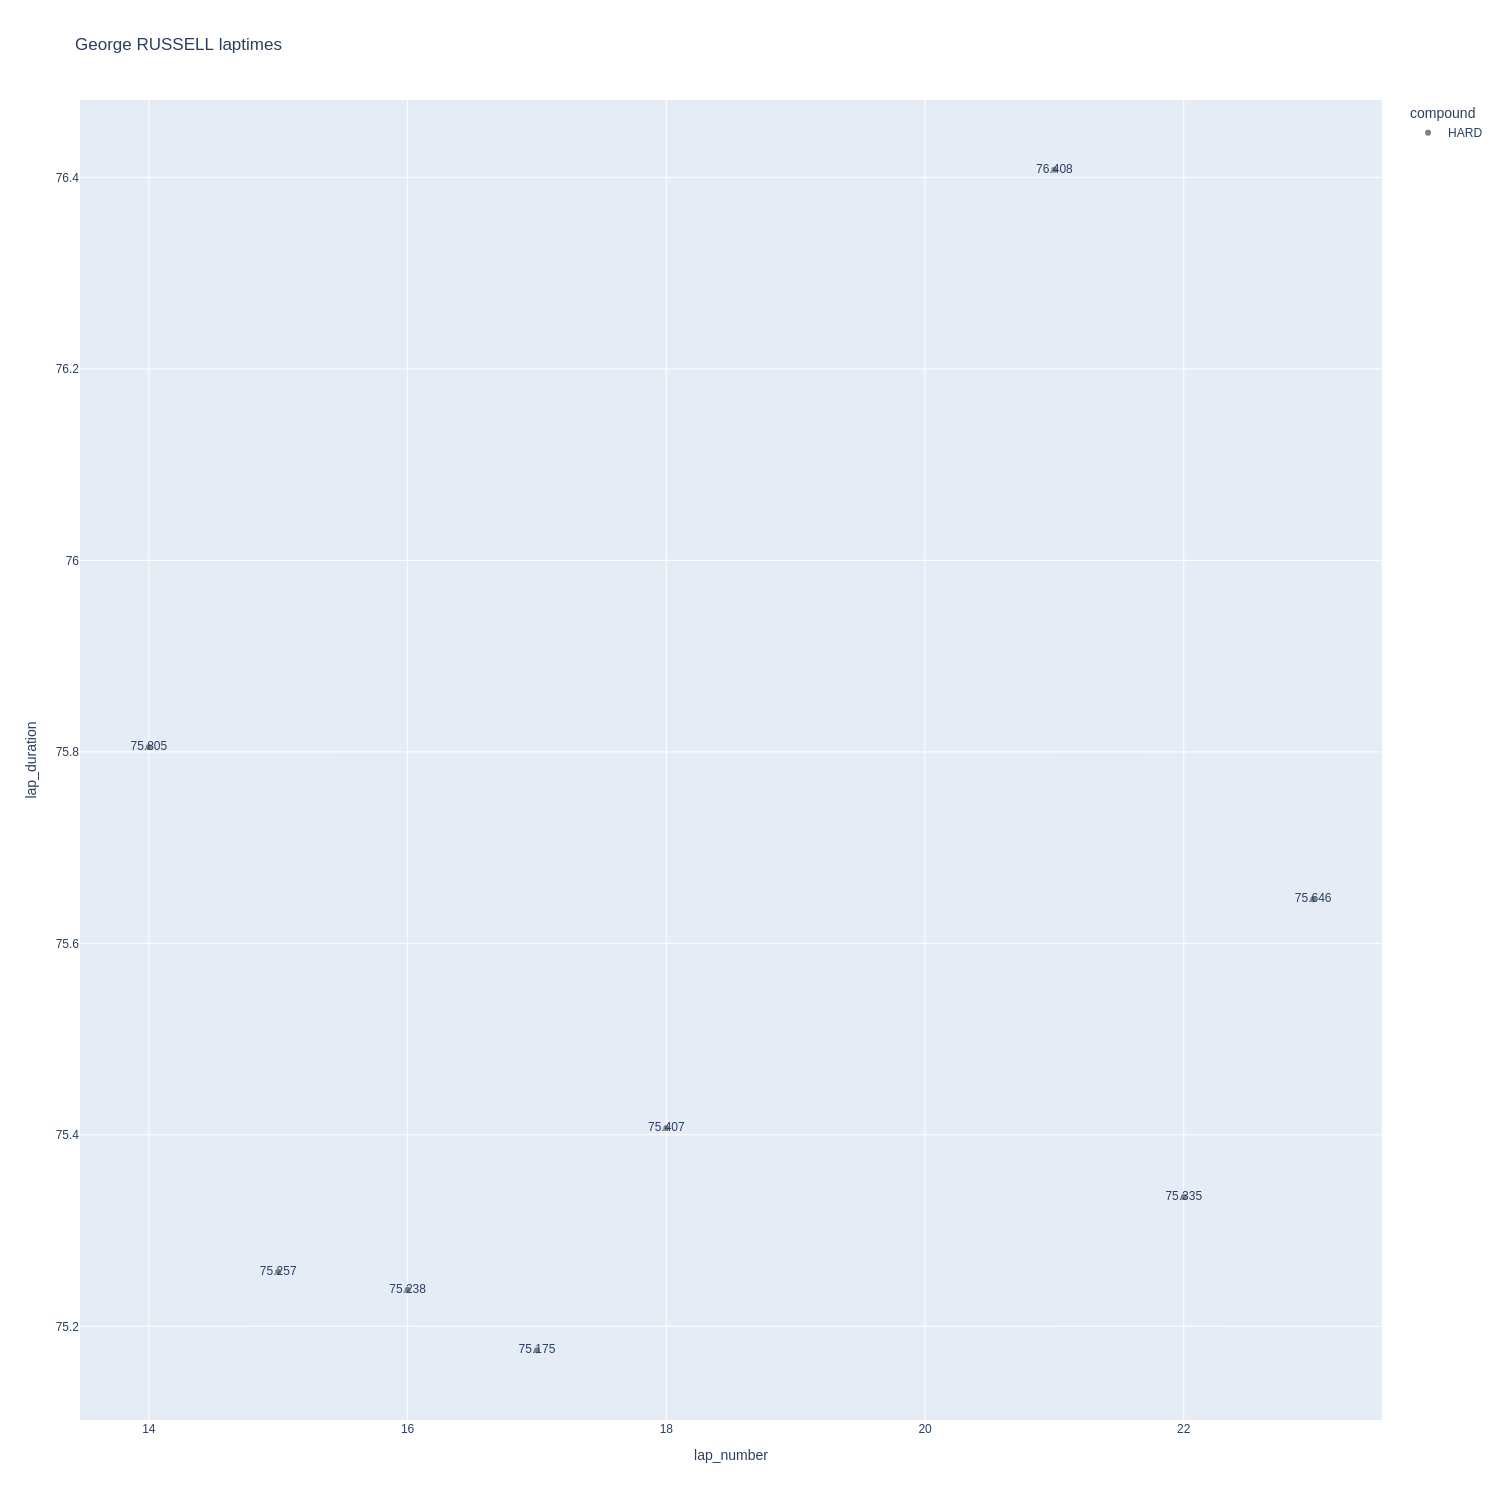

In [57]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

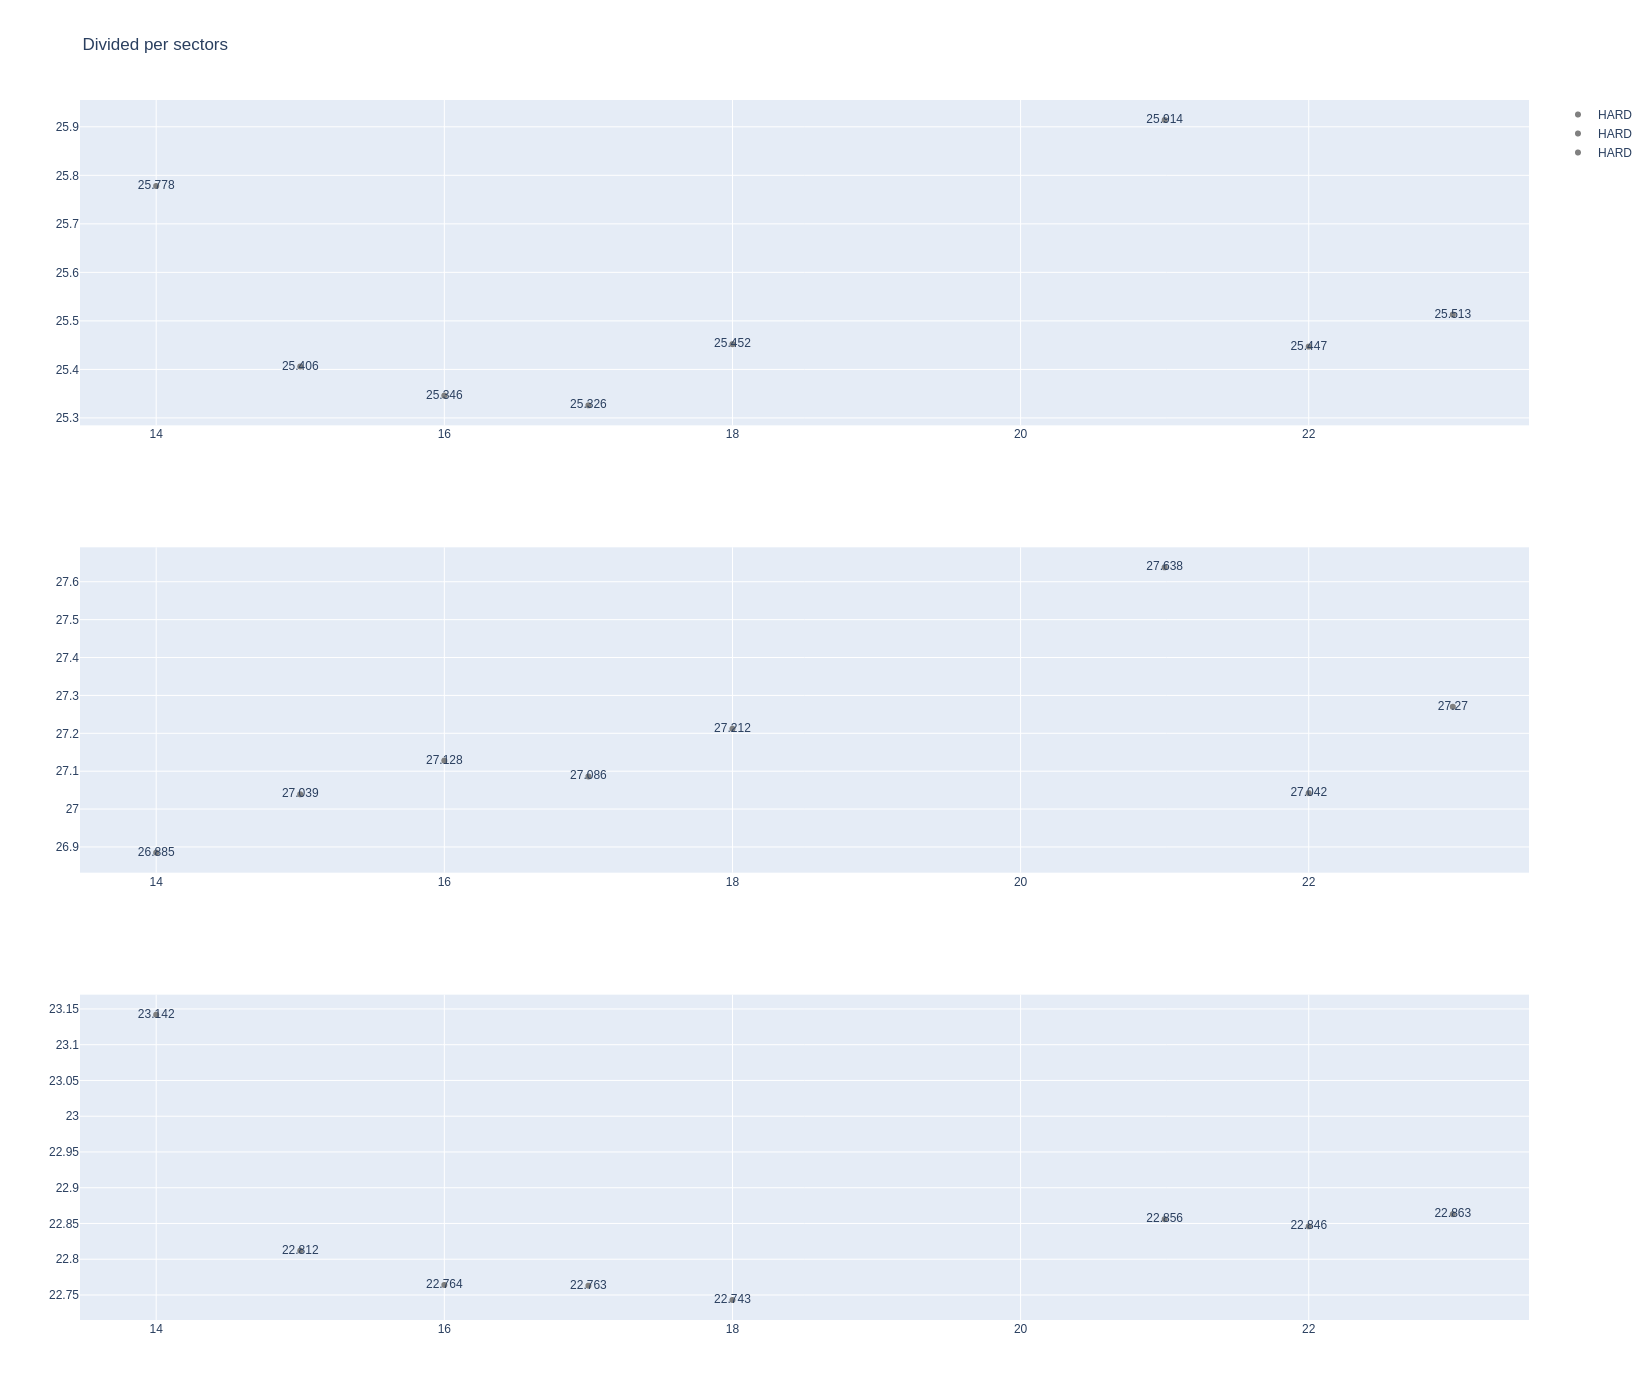

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [59]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1267         9914             1             81          1        7   
22         1267         9914             1              4          1        7   
26         1267         9914             2             81          8        9   
33         1267         9914             2              4          8       11   
36         1267         9914             3             81         10       12   
46         1267         9914             3              4         12       14   
56         1267         9914             4             81         13       15   
62         1267         9914             4              4         15       15   
74         1267         9914             5             81         16       25   
75         1267         9914             5              4         16       25   
80         1267         9914             6              4         26       28   
93         1267         9914             6             81         26       29   

   compound  tyre_age_at_start  
13   MEDIUM                  0  
22   MEDIUM                  0  
26   MEDIUM                  7  
33   MEDIUM                  0  
36   MEDIUM                  0  
46     SOFT                  0  
56     SOFT                  0  
62     SOFT                  3  
74   MEDIUM                 12  
75   MEDIUM                 11  
80     SOFT                  4  
93     SOFT                  0

In [60]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
324  Lando NORRIS   MEDIUM  2025-08-29T14:52:33.904000+00:00          21   
337  Lando NORRIS   MEDIUM  2025-08-29T14:53:48.907000+00:00          22   
352  Lando NORRIS   MEDIUM  2025-08-29T14:55:04.011000+00:00          23   
368  Lando NORRIS   MEDIUM  2025-08-29T14:56:19.012000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
324             25.152             27.061             22.830        75.043  
337             25.421             27.029             22.636        75.086  
352             25.264             27.049             22.723        75.036  
368             25.295             27.530             22.971        75.796

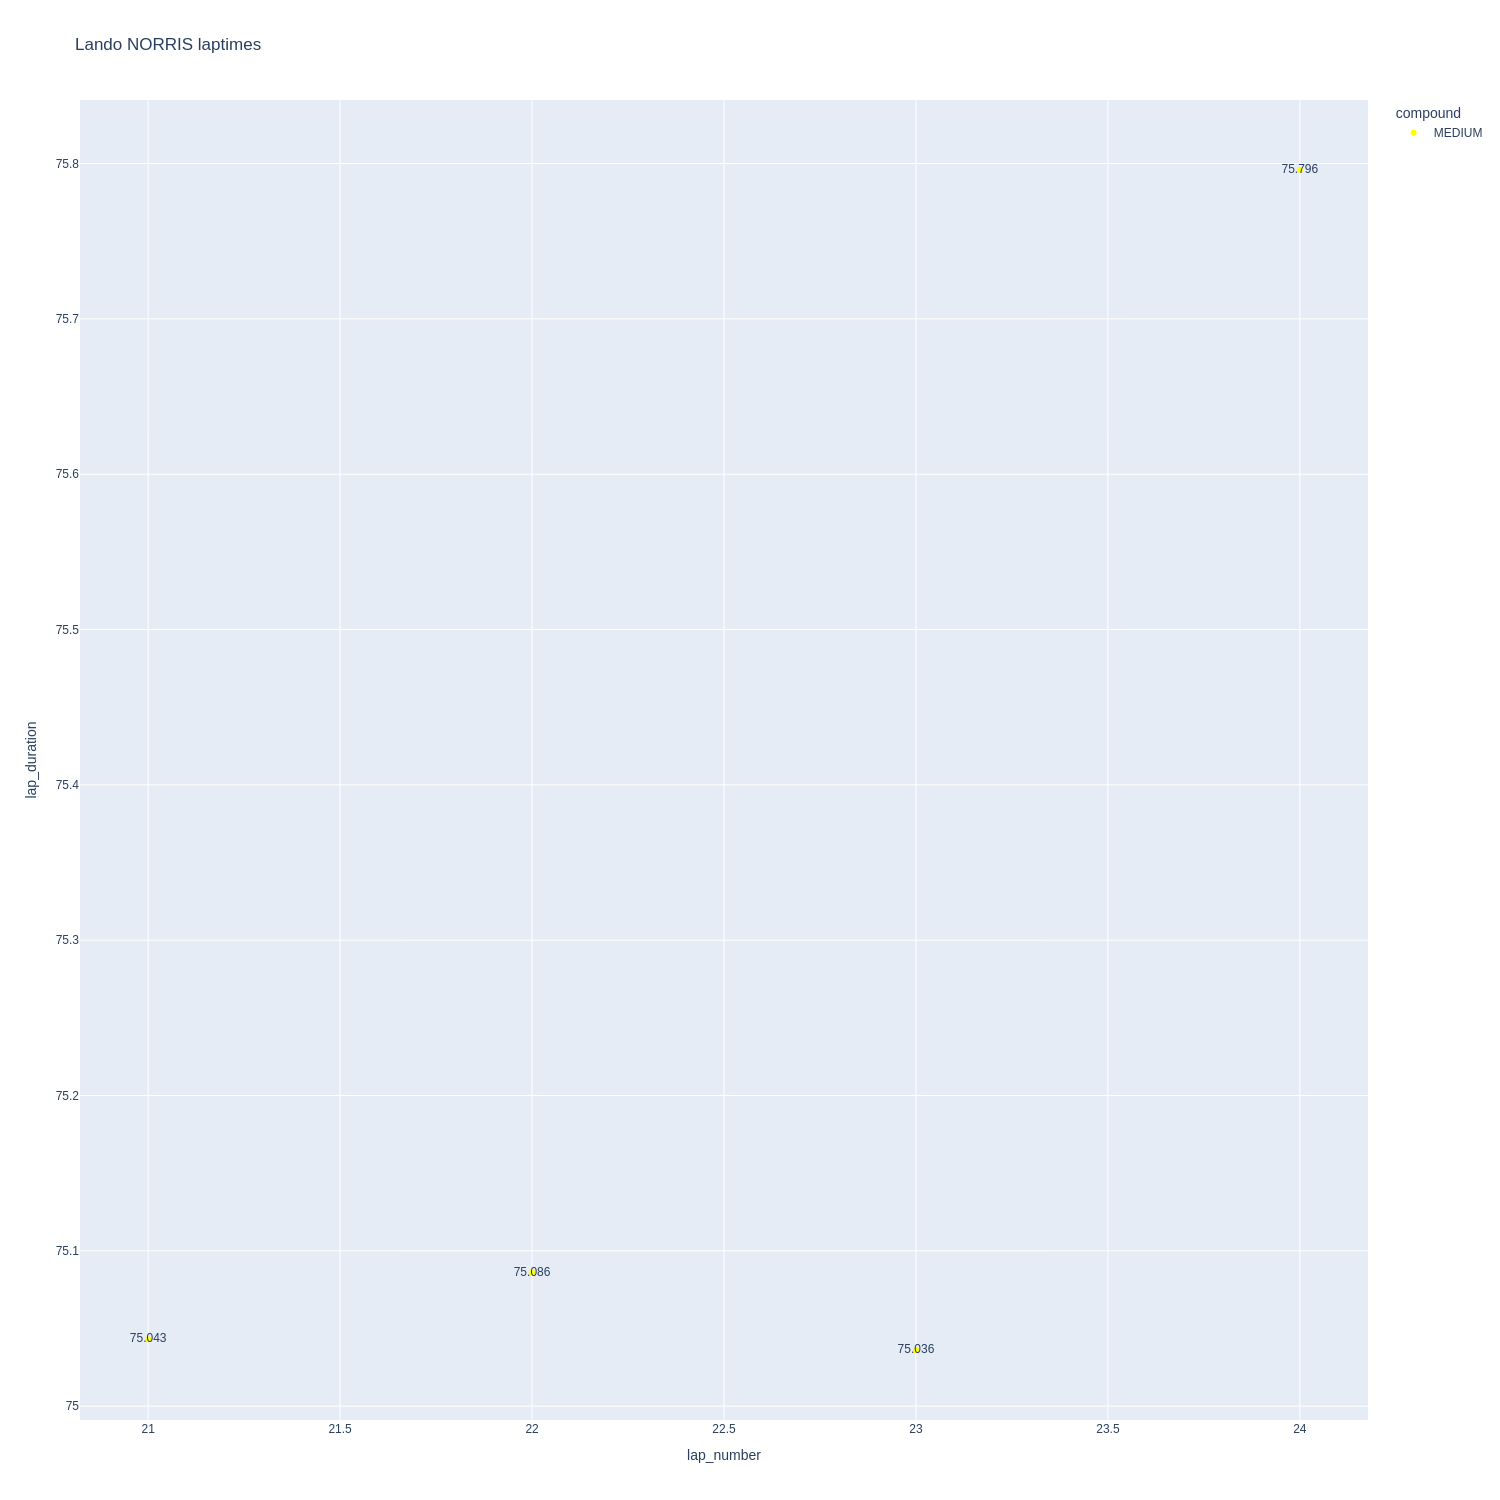

In [61]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

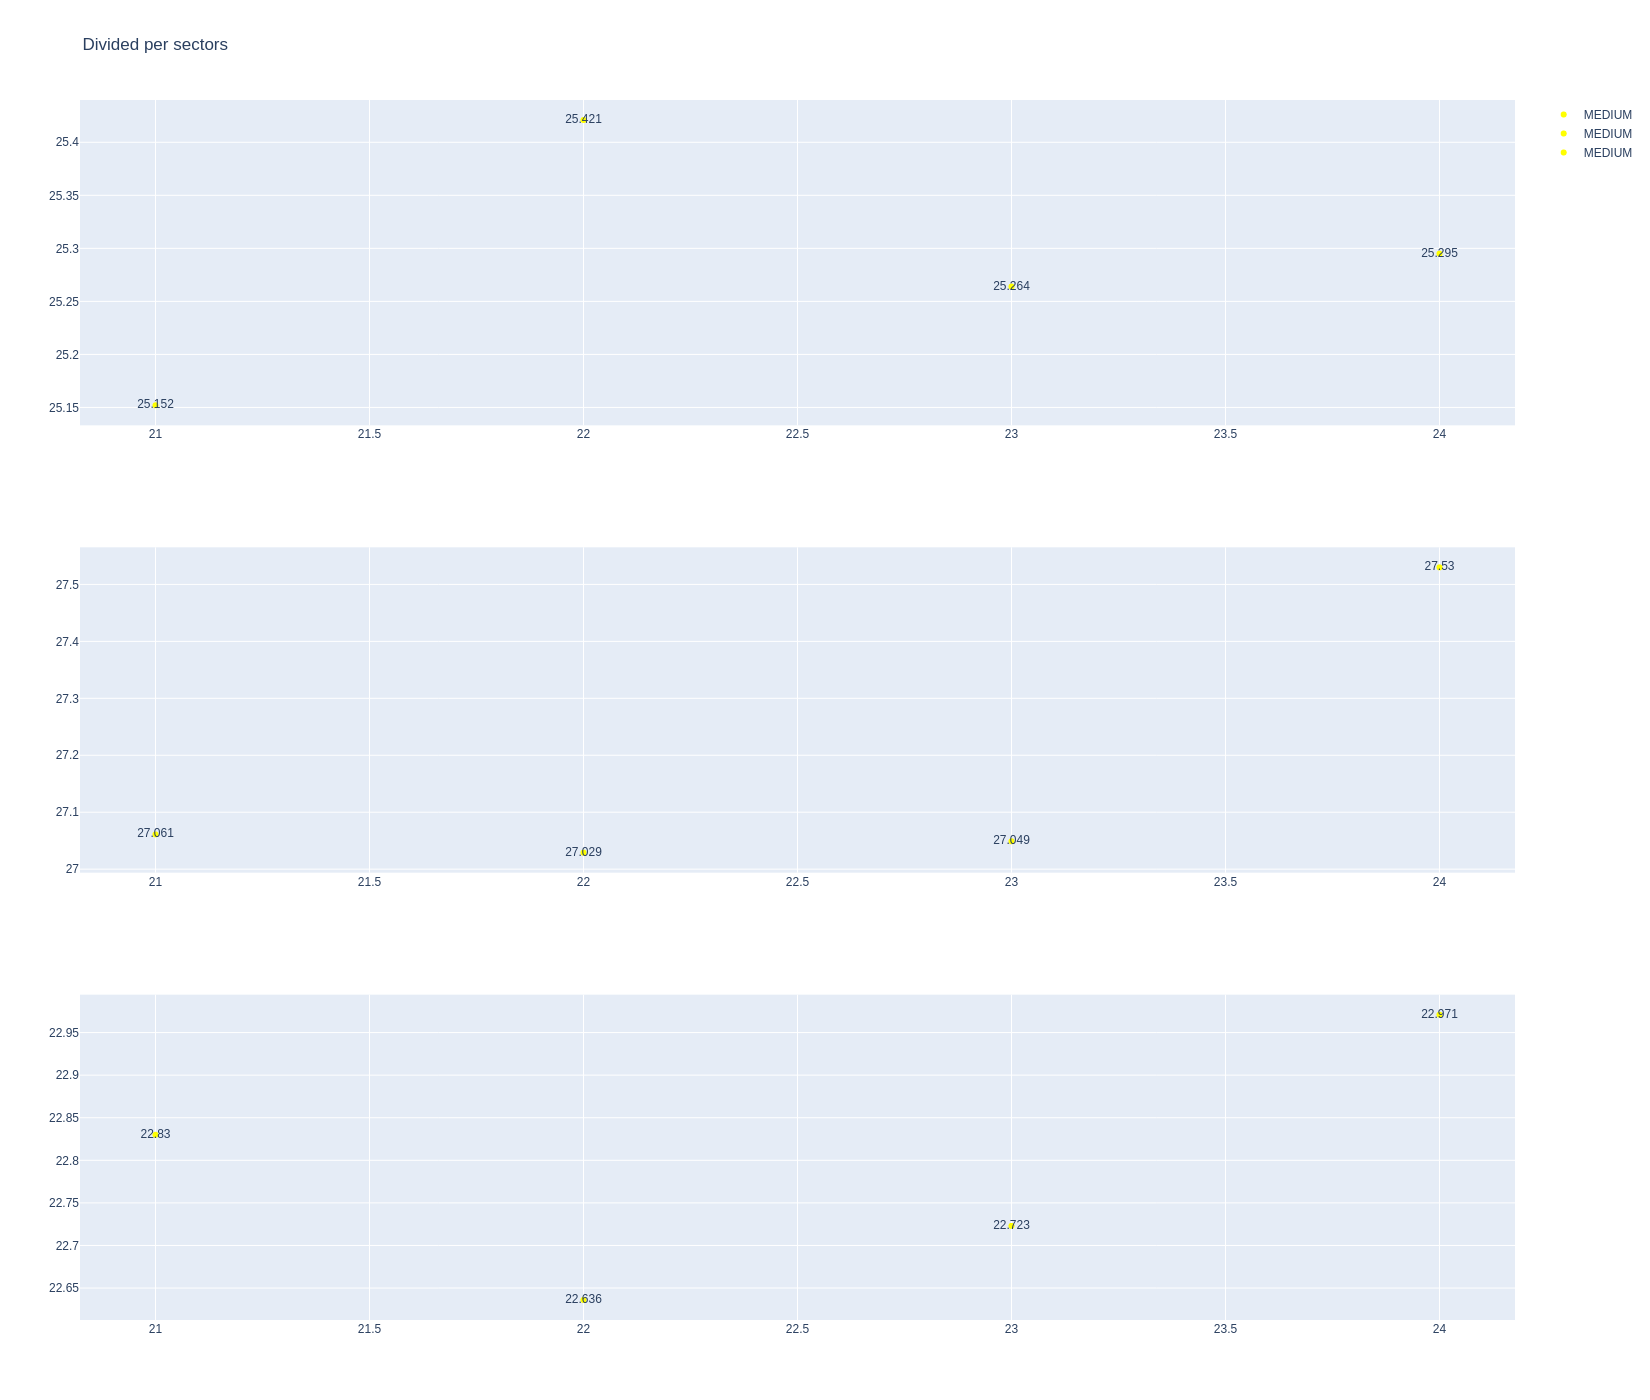

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [63]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
284  Oscar PIASTRI   MEDIUM  2025-08-29T14:48:05.146000+00:00          18   
295  Oscar PIASTRI   MEDIUM  2025-08-29T14:49:20.469000+00:00          19   
307  Oscar PIASTRI   MEDIUM  2025-08-29T14:50:36.286000+00:00          20   
317  Oscar PIASTRI   MEDIUM  2025-08-29T14:51:51.351000+00:00          21   
330  Oscar PIASTRI   MEDIUM  2025-08-29T14:53:07.286000+00:00          22   
344  Oscar PIASTRI   MEDIUM  2025-08-29T14:54:22.751000+00:00          23   
360  Oscar PIASTRI   MEDIUM  2025-08-29T14:55:38.902000+00:00          24   
375  Oscar PIASTRI   MEDIUM  2025-08-29T14:56:54.215000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
284             25.424             27.110             22.866        75.400  
295             25.304             27.471             23.011        75.786  
307             25.306             27.198             22.558        75.062  
317             25.688             27.702             22.544        75.934  
330             25.422             27.371             22.690        75.483  
344             25.210             27.894             23.120        76.224  
360             25.258             27.173             22.832        75.263  
375             25.462             27.178             25.260        77.900

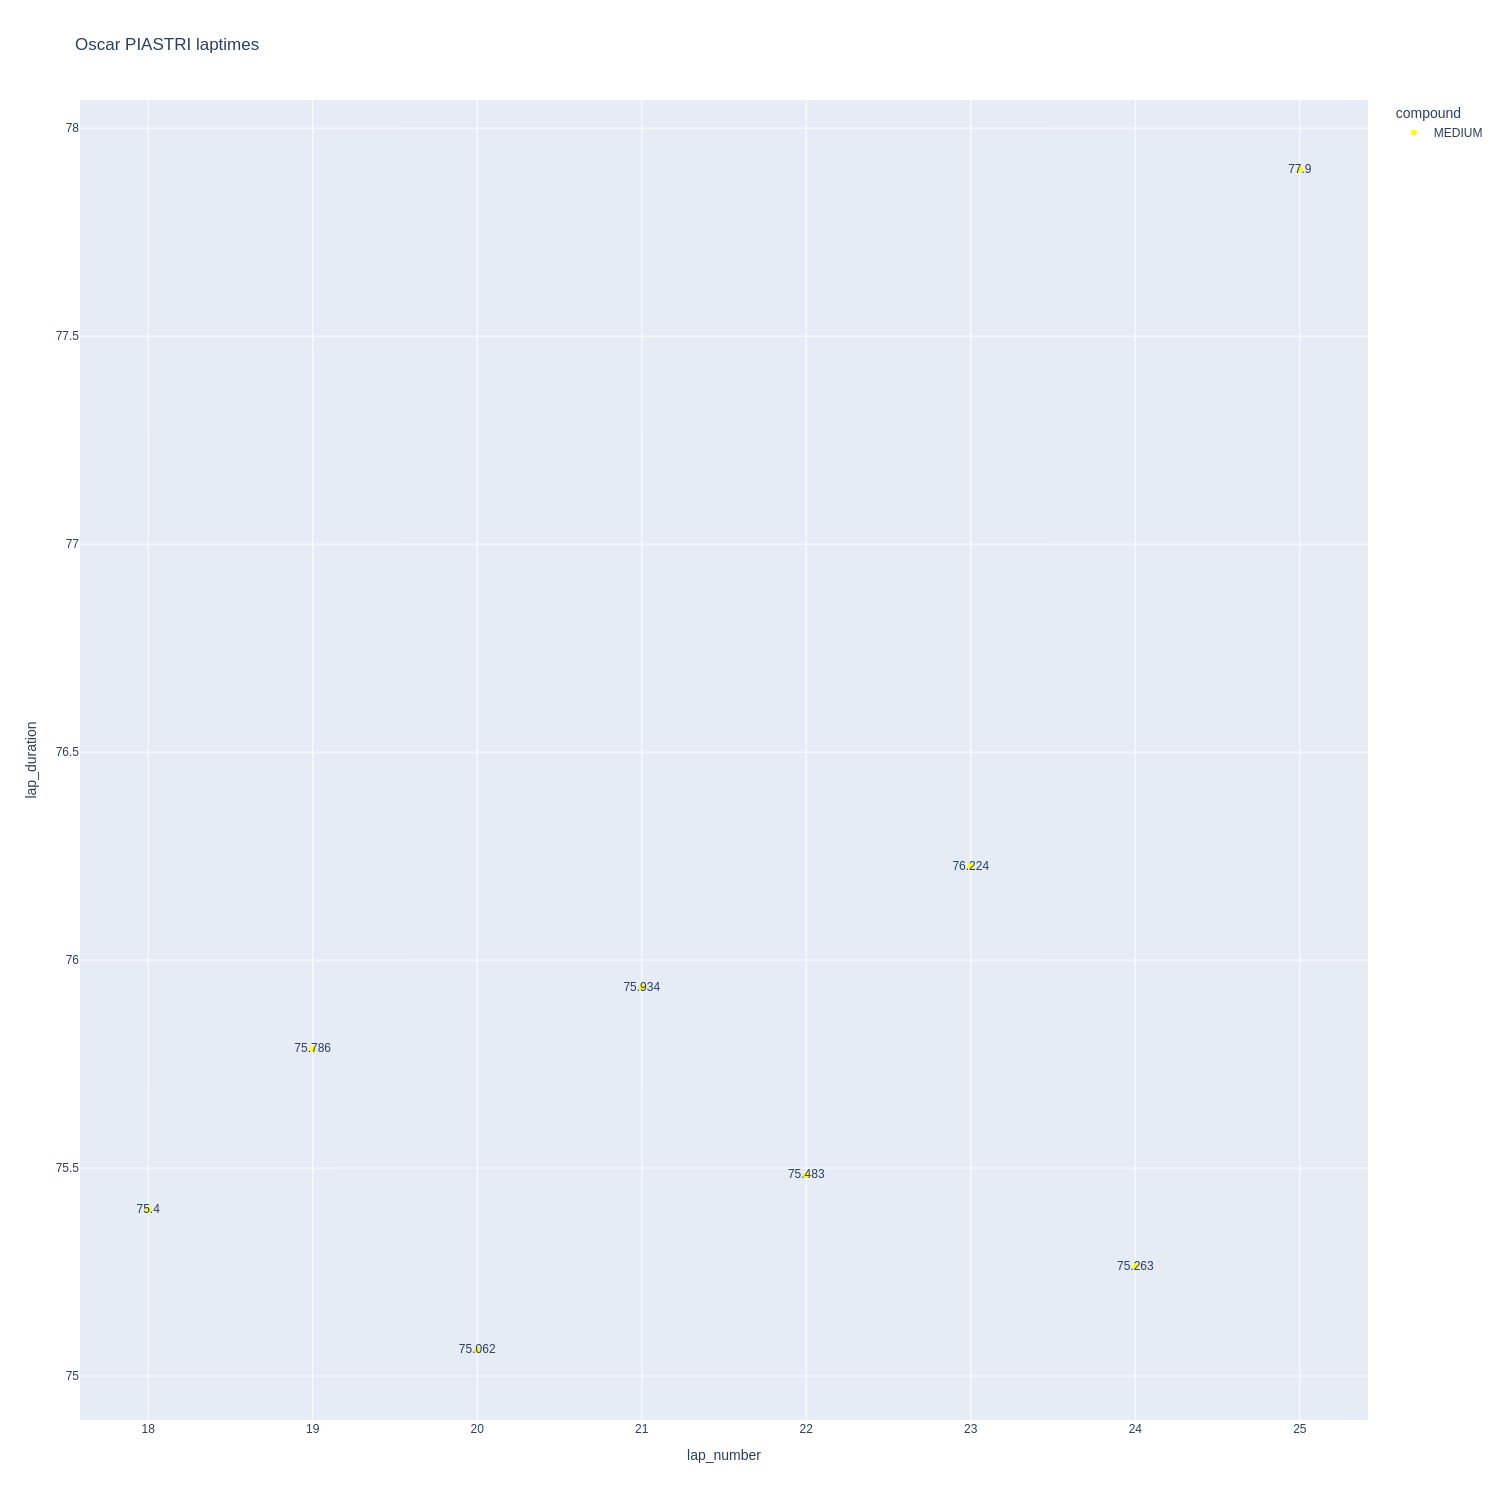

In [64]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

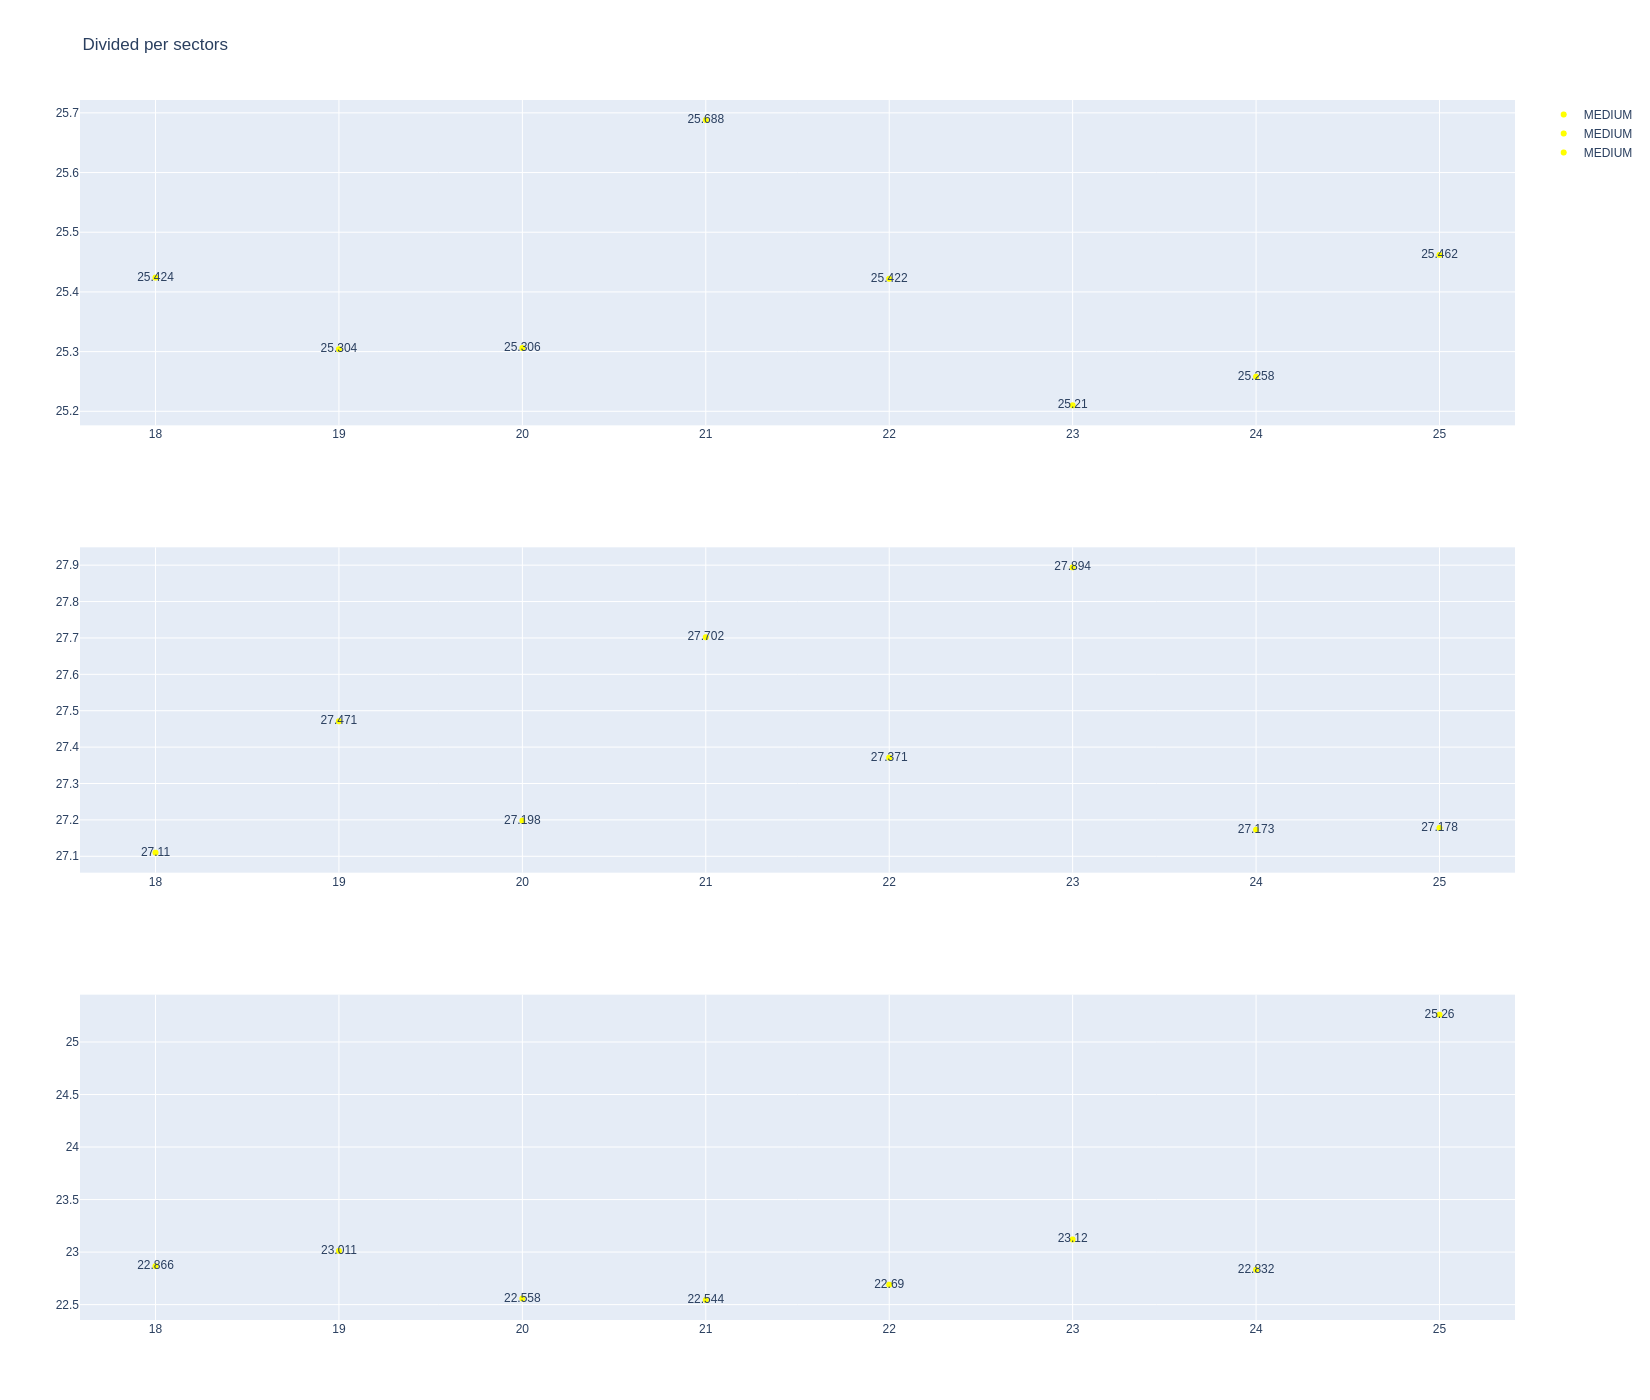

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [66]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1267         9914             1             18          1        7   
31         1267         9914             1             14          1        7   
53         1267         9914             2             14          8       10   
72         1267         9914             3             14         11       13   
88         1267         9914             4             14         14       20   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
31   MEDIUM                  0  
53     SOFT                  0  
72     SOFT                  3  
88   MEDIUM                  7

In [67]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
380  Fernando ALONSO   MEDIUM  2025-08-29T14:57:08.684000+00:00          16   
395  Fernando ALONSO   MEDIUM  2025-08-29T14:58:24.497000+00:00          17   
412  Fernando ALONSO   MEDIUM  2025-08-29T14:59:39.912000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
380             25.755             27.099             22.966        75.820  
395             25.436             27.173             22.843        75.452  
412             25.500             26.991             22.740        75.231

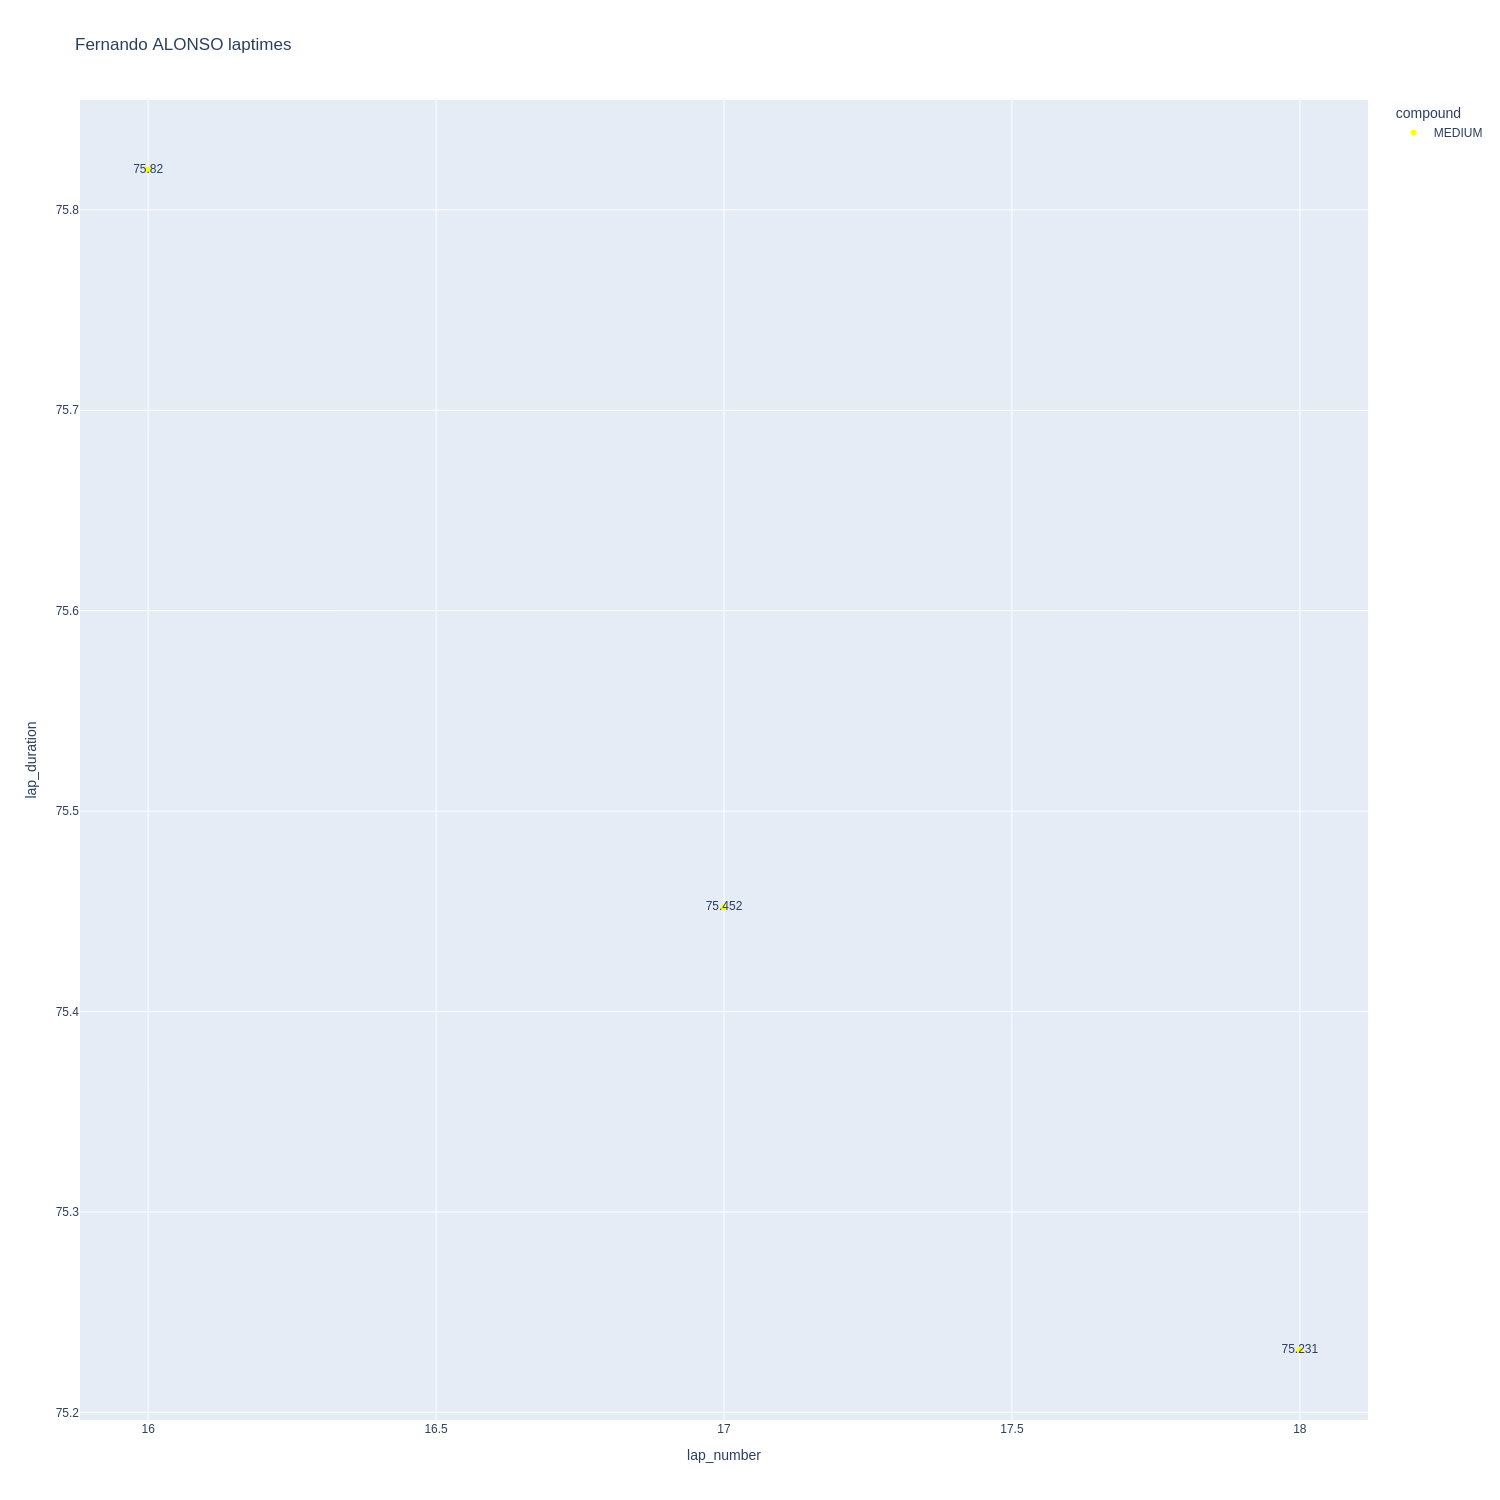

In [68]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

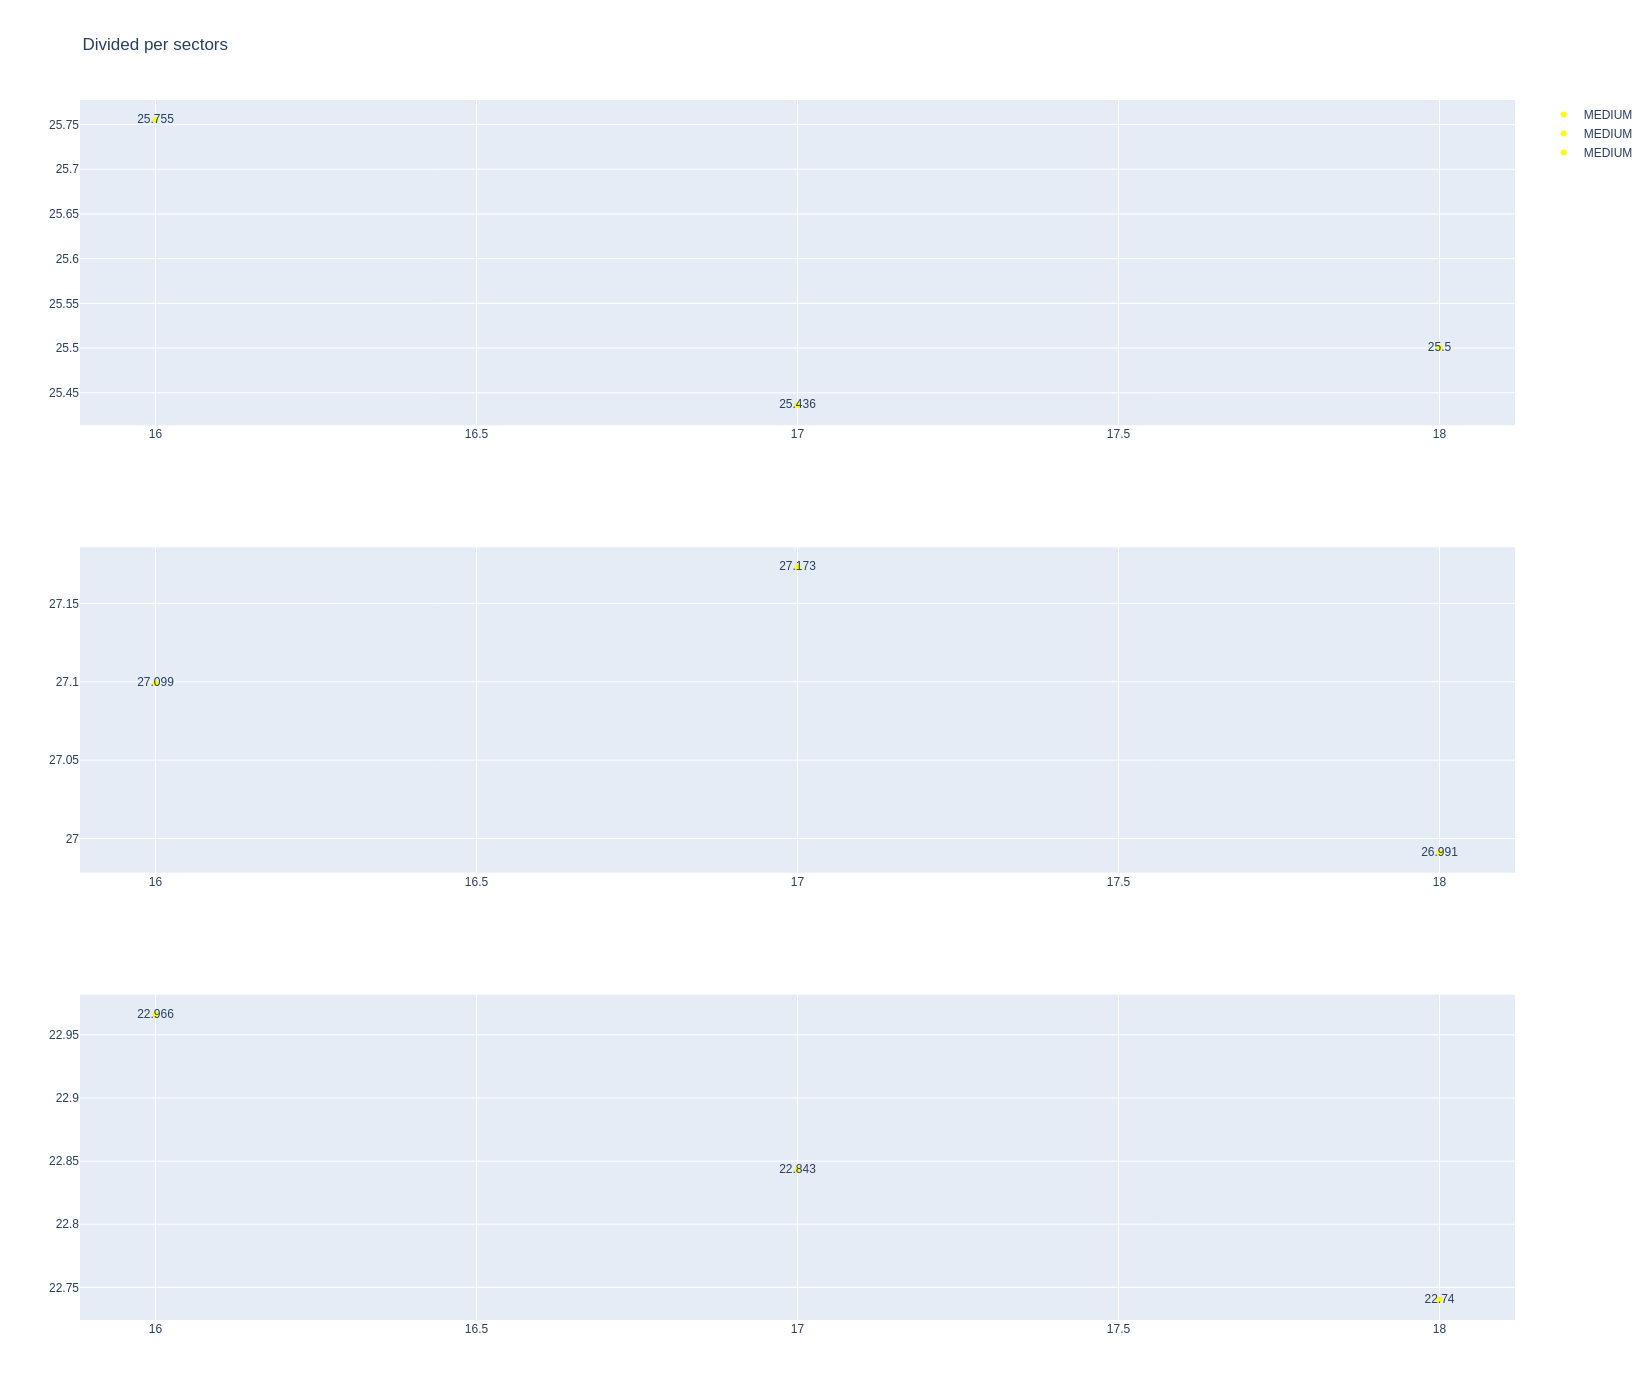

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [70]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [71]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [73]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
17         1267         9914             1             30          1        7   
18         1267         9914             1              6          1        1   
43         1267         9914             2             30          8       13   
51         1267         9914             3             30         14       15   
71         1267         9914             4             30         16       18   
83         1267         9914             5             30         19       25   

   compound  tyre_age_at_start  
17     HARD                  0  
18     HARD                  0  
43     HARD                  7  
51     SOFT                  0  
71     SOFT                  2  
83     SOFT                  5

In [74]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
13   Liam LAWSON     HARD  2025-08-29T14:01:47.004000+00:00           2   
357  Liam LAWSON     SOFT  2025-08-29T14:55:27.433000+00:00          20   
373  Liam LAWSON     SOFT  2025-08-29T14:56:43.199000+00:00          21   
389  Liam LAWSON     SOFT  2025-08-29T14:57:58.639000+00:00          22   
405  Liam LAWSON     SOFT  2025-08-29T14:59:14.122000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
13              25.761             26.980             25.113        77.854  
357             25.847             26.929             22.929        75.705  
373             25.672             26.913             22.868        75.453  
389             25.573             26.930             23.042        75.545  
405             25.432             27.301             23.132        75.865

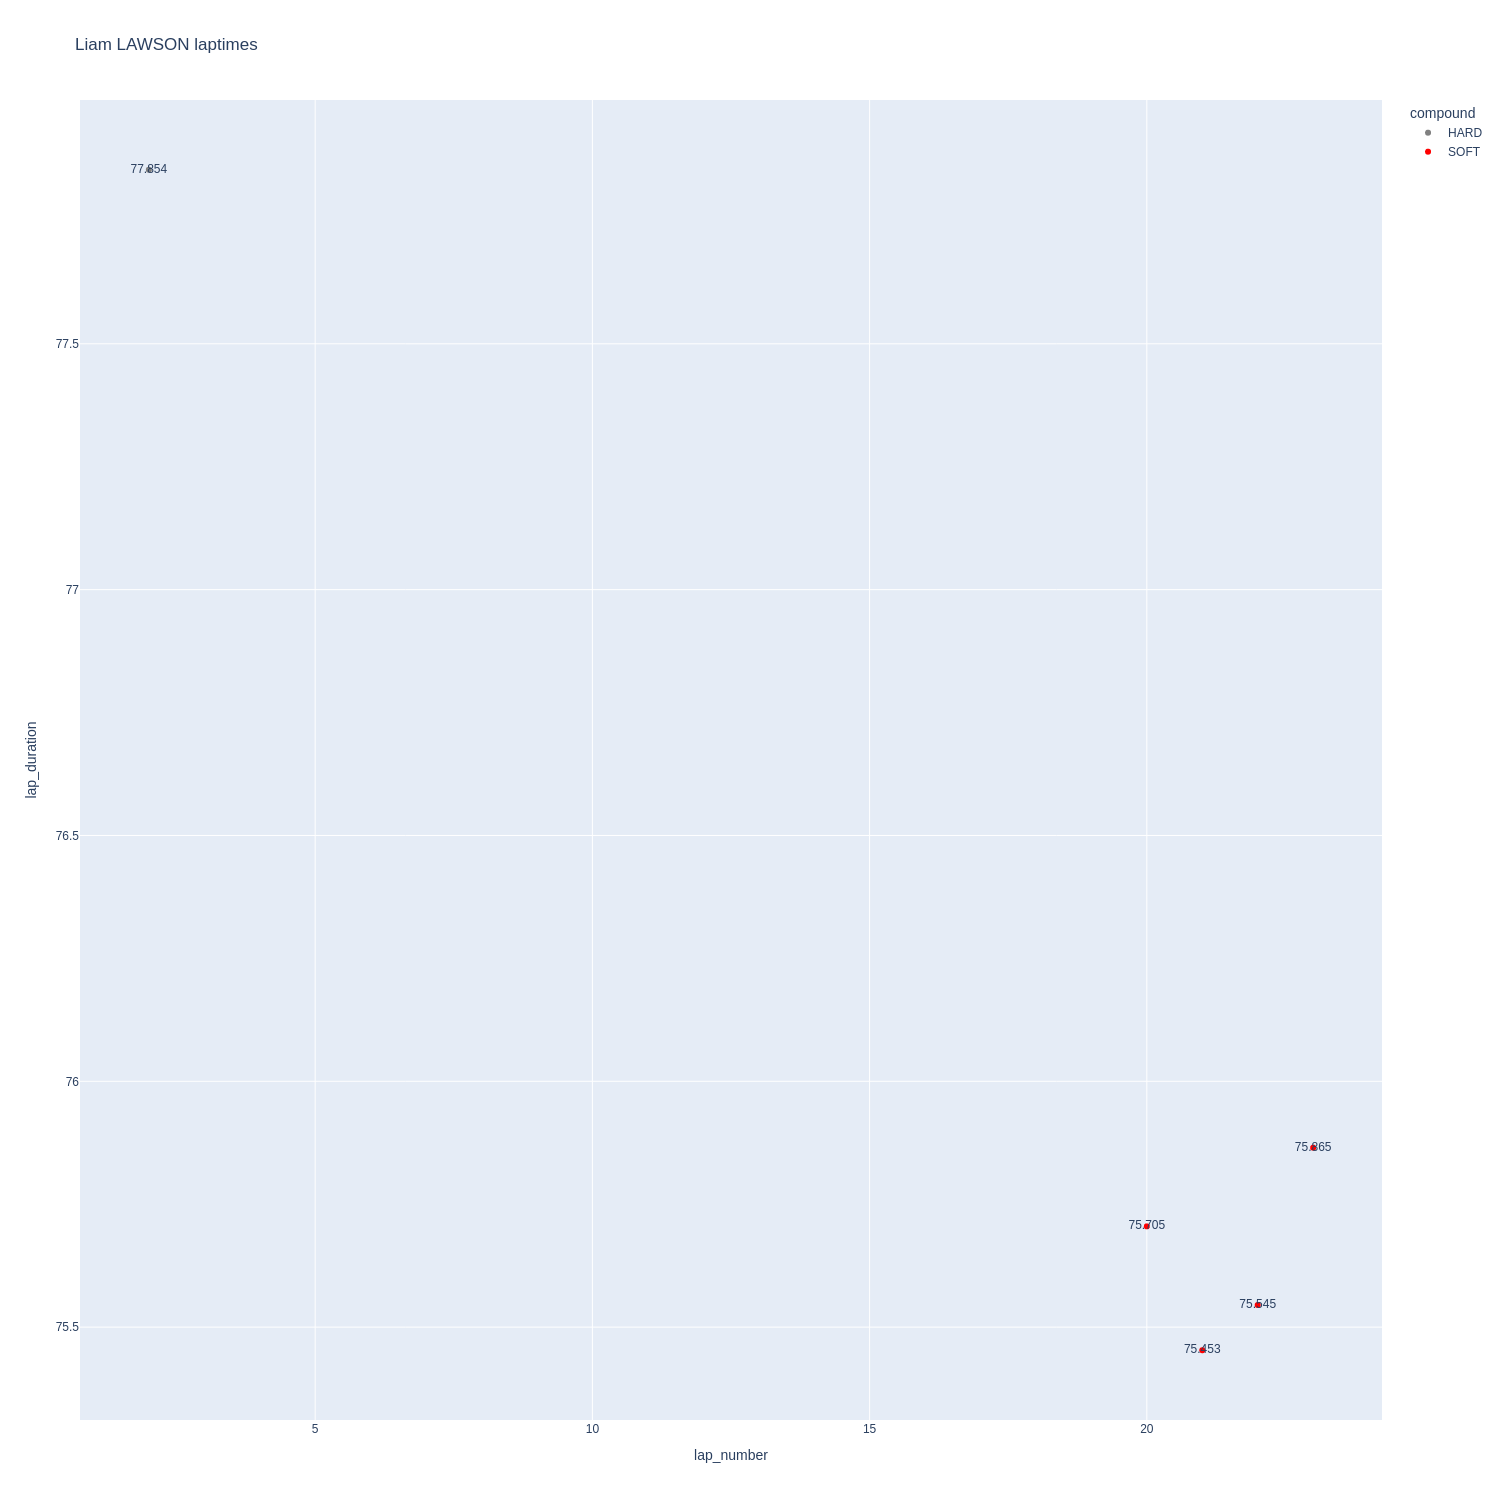

In [75]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

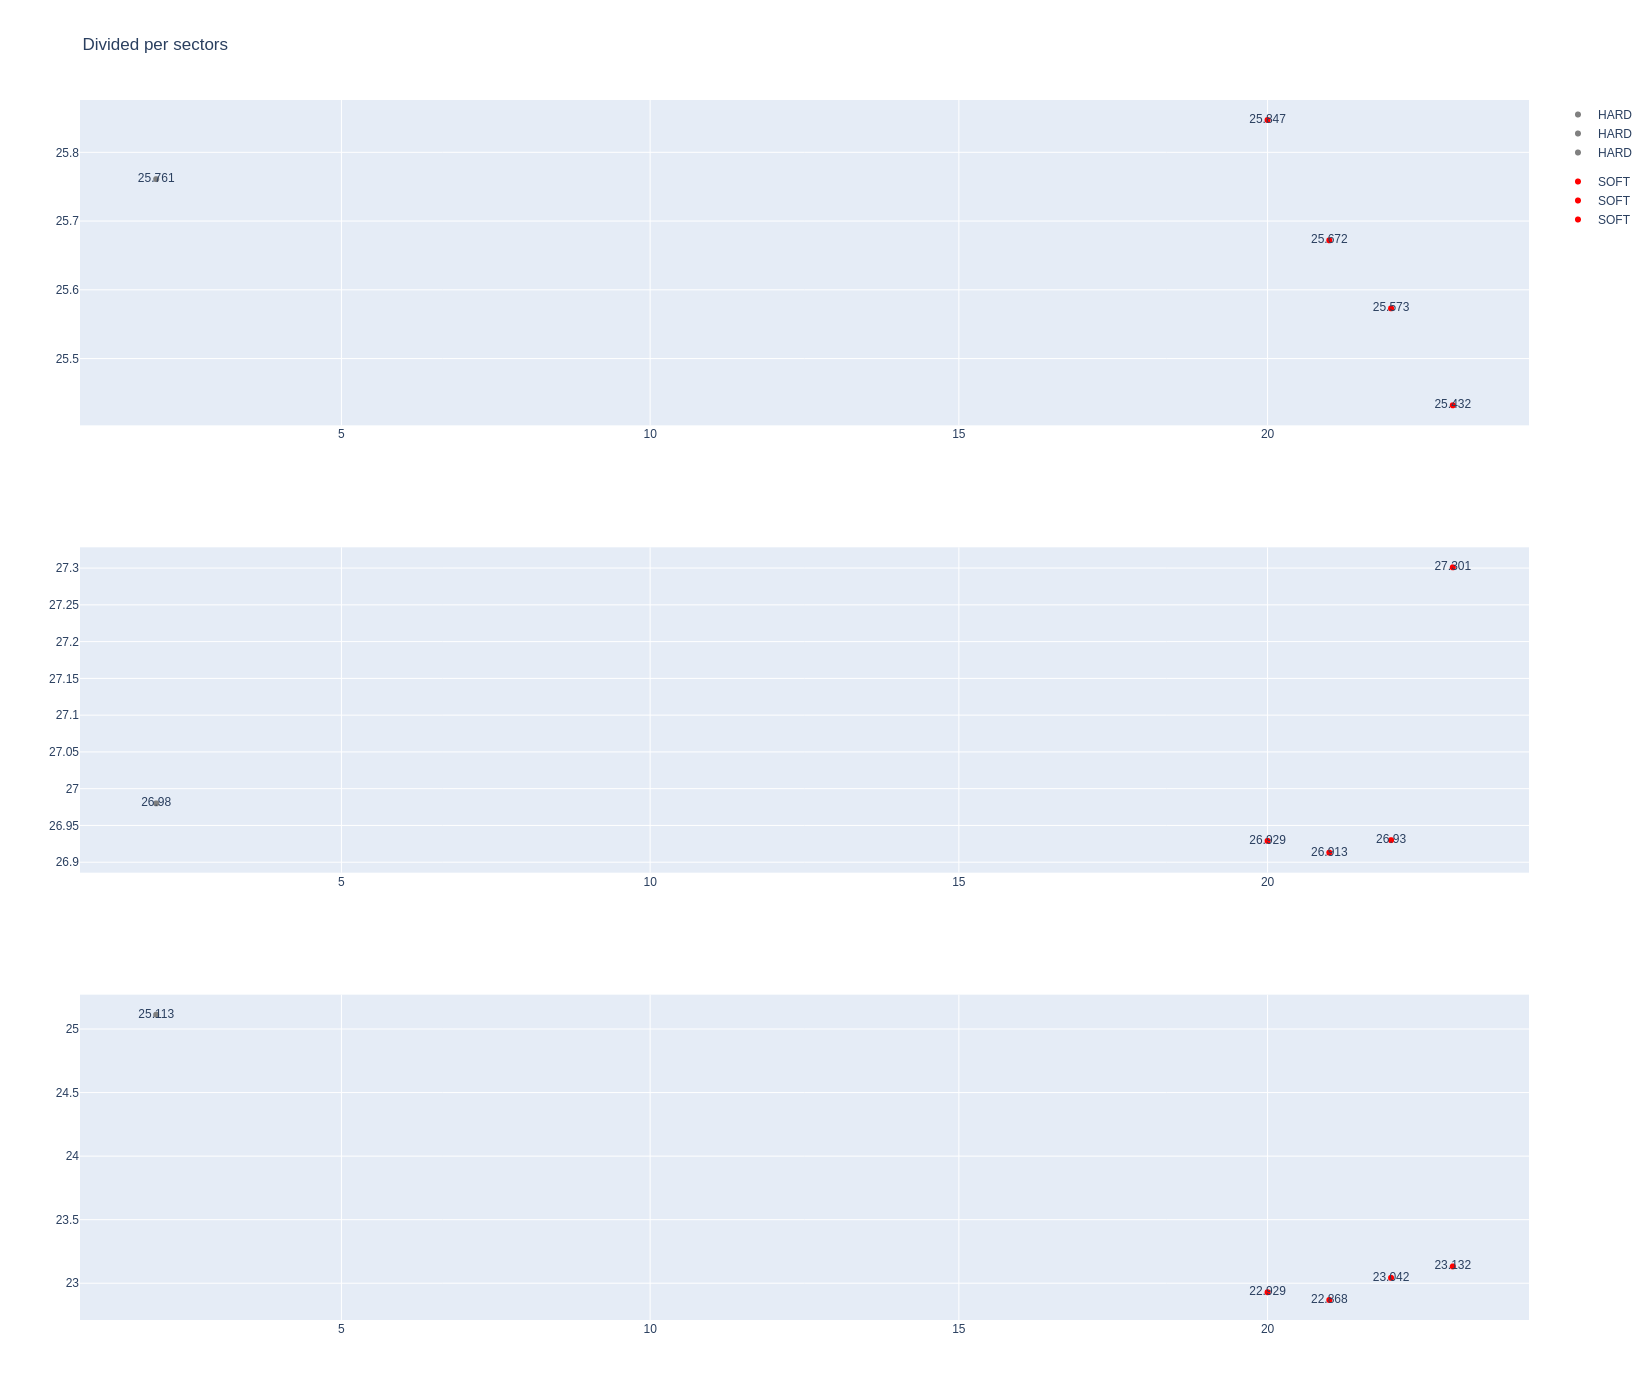

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [77]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [78]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [80]:
stintInformation.query('driver_number == 31 or driver_number == 87')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1267         9914             1             87          1        4   
4          1267         9914             1             31          1        5   
29         1267         9914             2             31          6        7   
30         1267         9914             2             87          5        7   
41         1267         9914             3             31          8       10   
50         1267         9914             3             87          8       11   
55         1267         9914             4             31         11       12   
69         1267         9914             5             31         13       15   
90         1267         9914             4             87         12       26   
91         1267         9914             6             31         16       23   

   compound  tyre_age_at_start  
2    MEDIUM                  0  
4    MEDIUM                  0  
29     SOFT                  0  
30     SOFT                  0  
41     SOFT                  0  
50     SOFT                  3  
55     SOFT                  5  
69     SOFT                  0  
90   MEDIUM                  4  
91   MEDIUM                  0

In [81]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
349  Esteban OCON   MEDIUM  2025-08-29T14:54:46.778000+00:00          17   
365  Esteban OCON   MEDIUM  2025-08-29T14:56:02.320000+00:00          18   
381  Esteban OCON   MEDIUM  2025-08-29T14:57:18.371000+00:00          19   
397  Esteban OCON   MEDIUM  2025-08-29T14:58:34.153000+00:00          20   
414  Esteban OCON   MEDIUM  2025-08-29T14:59:49.803000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
349             25.967             26.703             22.866        75.536  
365             25.873             27.157             22.993        76.023  
381             25.880             27.061             22.911        75.852  
397             25.744             27.205             22.766        75.715  
414             25.657             27.097             22.584        75.338

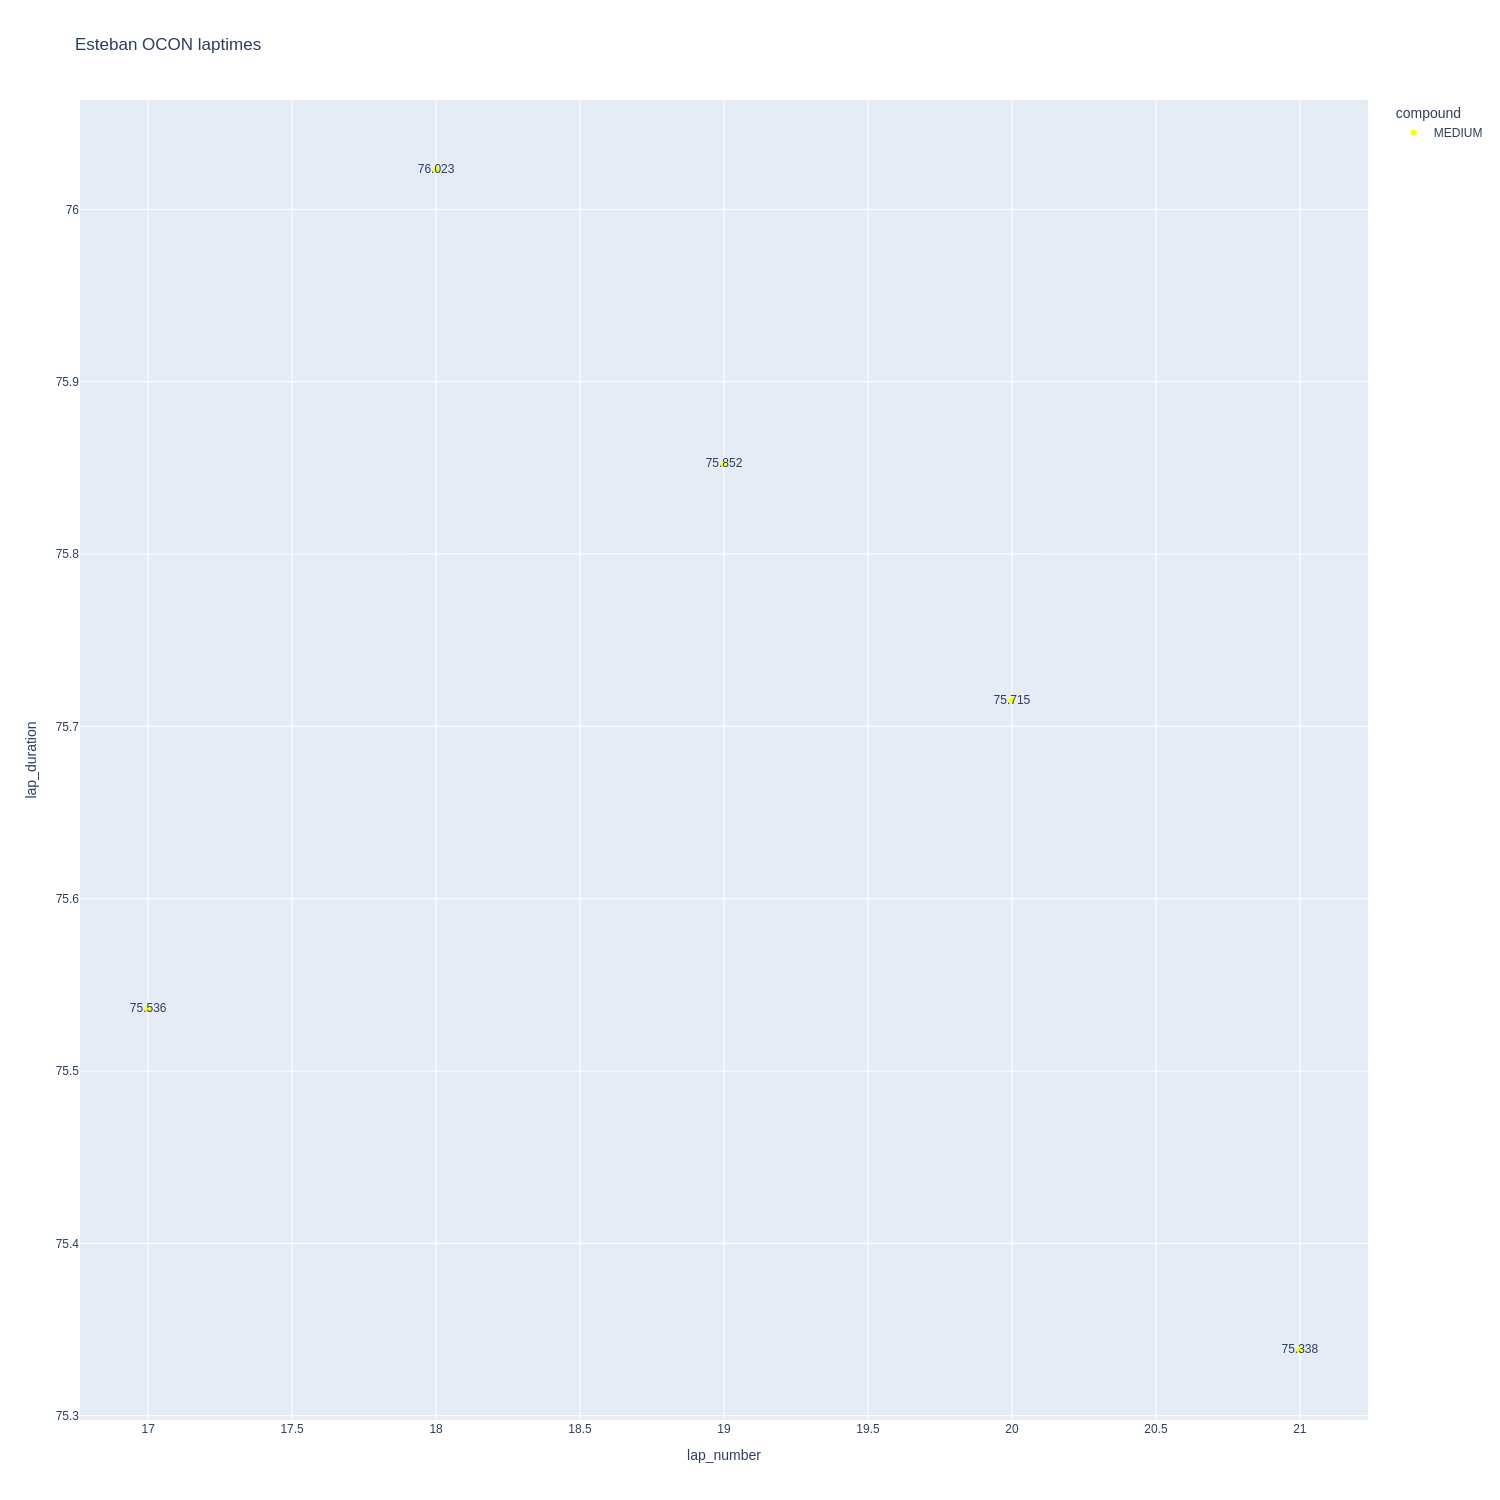

In [82]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

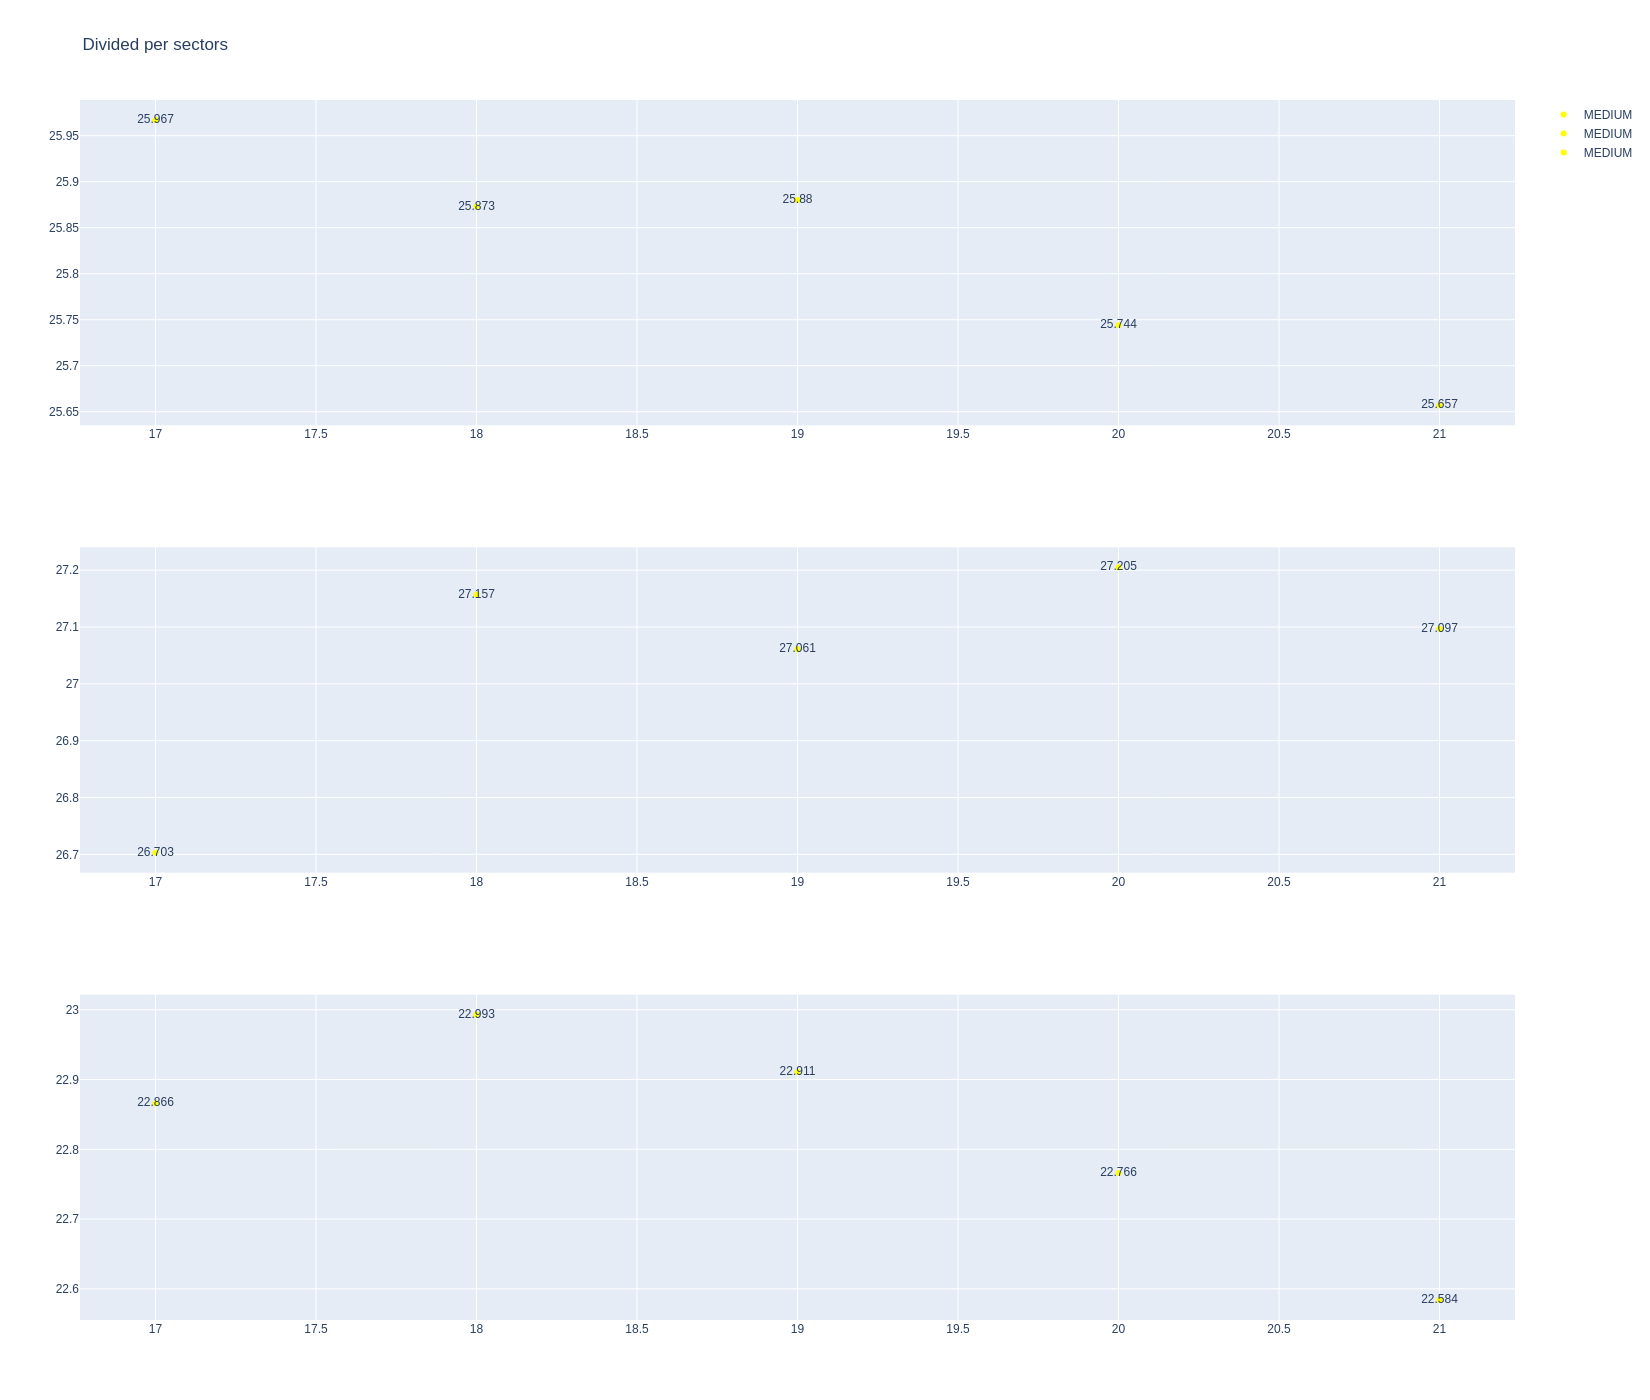

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [84]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
255  Oliver BEARMAN   MEDIUM  2025-08-29T14:45:40.751000+00:00          13   
269  Oliver BEARMAN   MEDIUM  2025-08-29T14:46:56.213000+00:00          14   
286  Oliver BEARMAN   MEDIUM  2025-08-29T14:48:11.505000+00:00          15   
297  Oliver BEARMAN   MEDIUM  2025-08-29T14:49:26.626000+00:00          16   
309  Oliver BEARMAN   MEDIUM  2025-08-29T14:50:41.787000+00:00          17   
319  Oliver BEARMAN   MEDIUM  2025-08-29T14:51:57.117000+00:00          18   
332  Oliver BEARMAN   MEDIUM  2025-08-29T14:53:12.942000+00:00          19   
348  Oliver BEARMAN   MEDIUM  2025-08-29T14:54:28.532000+00:00          20   
363  Oliver BEARMAN   MEDIUM  2025-08-29T14:55:44.324000+00:00          21   
378  Oliver BEARMAN   MEDIUM  2025-08-29T14:57:01.065000+00:00          22   
393  Oliver BEARMAN   MEDIUM  2025-08-29T14:58:16.528000+00:00          23   
410  Oliver BEARMAN   MEDIUM  2025-08-29T14:59:32.584000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
255             25.854             26.778             22.800        75.432  
269             25.668             26.892             22.718        75.278  
286             25.580             26.856             22.679        75.115  
297             25.513             26.957             22.707        75.177  
309             25.499             27.093             22.778        75.370  
319             25.644             27.314             22.874        75.832  
332             25.559             27.301             22.796        75.656  
348             25.524             27.463             22.725        75.712  
363             25.442             27.409             23.988        76.839  
378             25.440             27.339             22.617        75.396  
393             25.419             27.608             22.975        76.002  
410             25.627             27.471             22.966        76.064

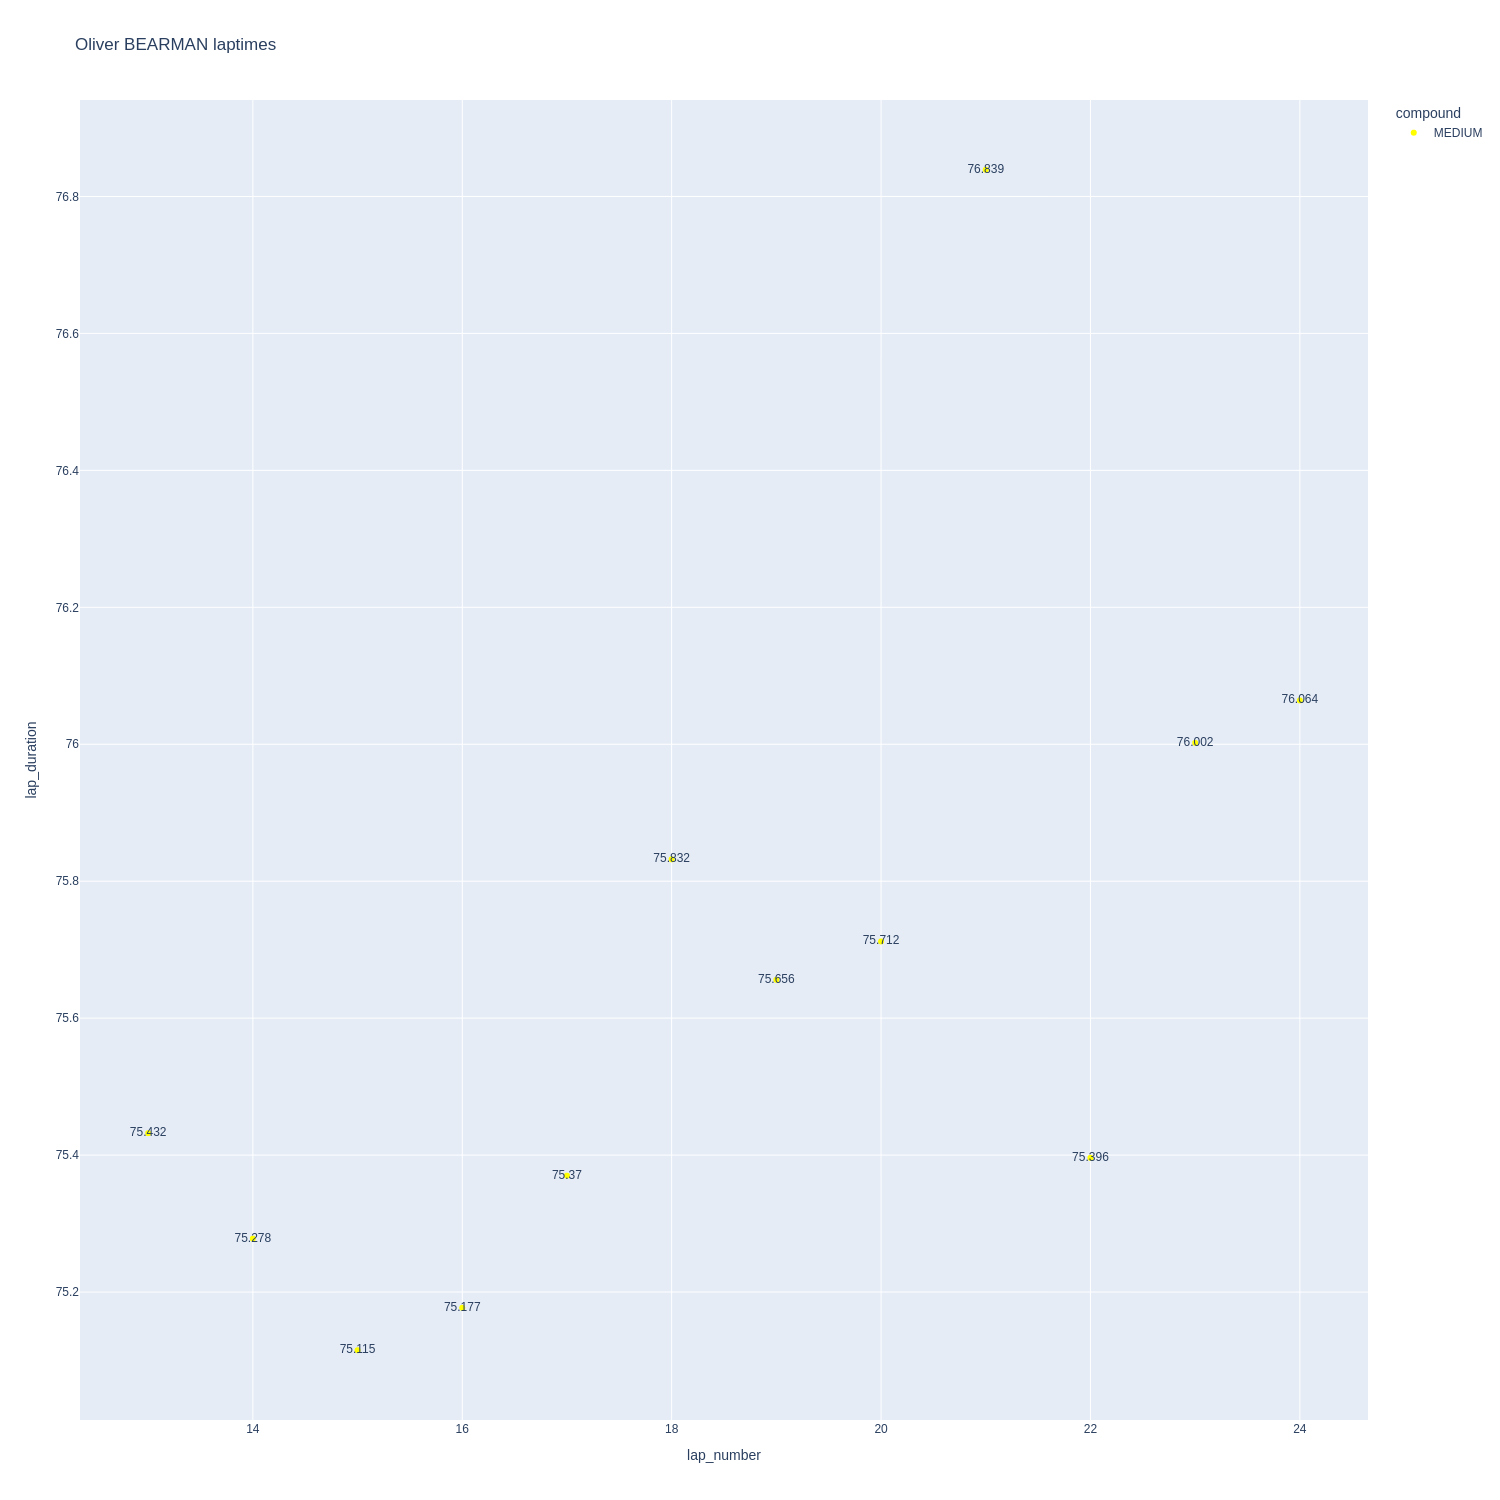

In [85]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

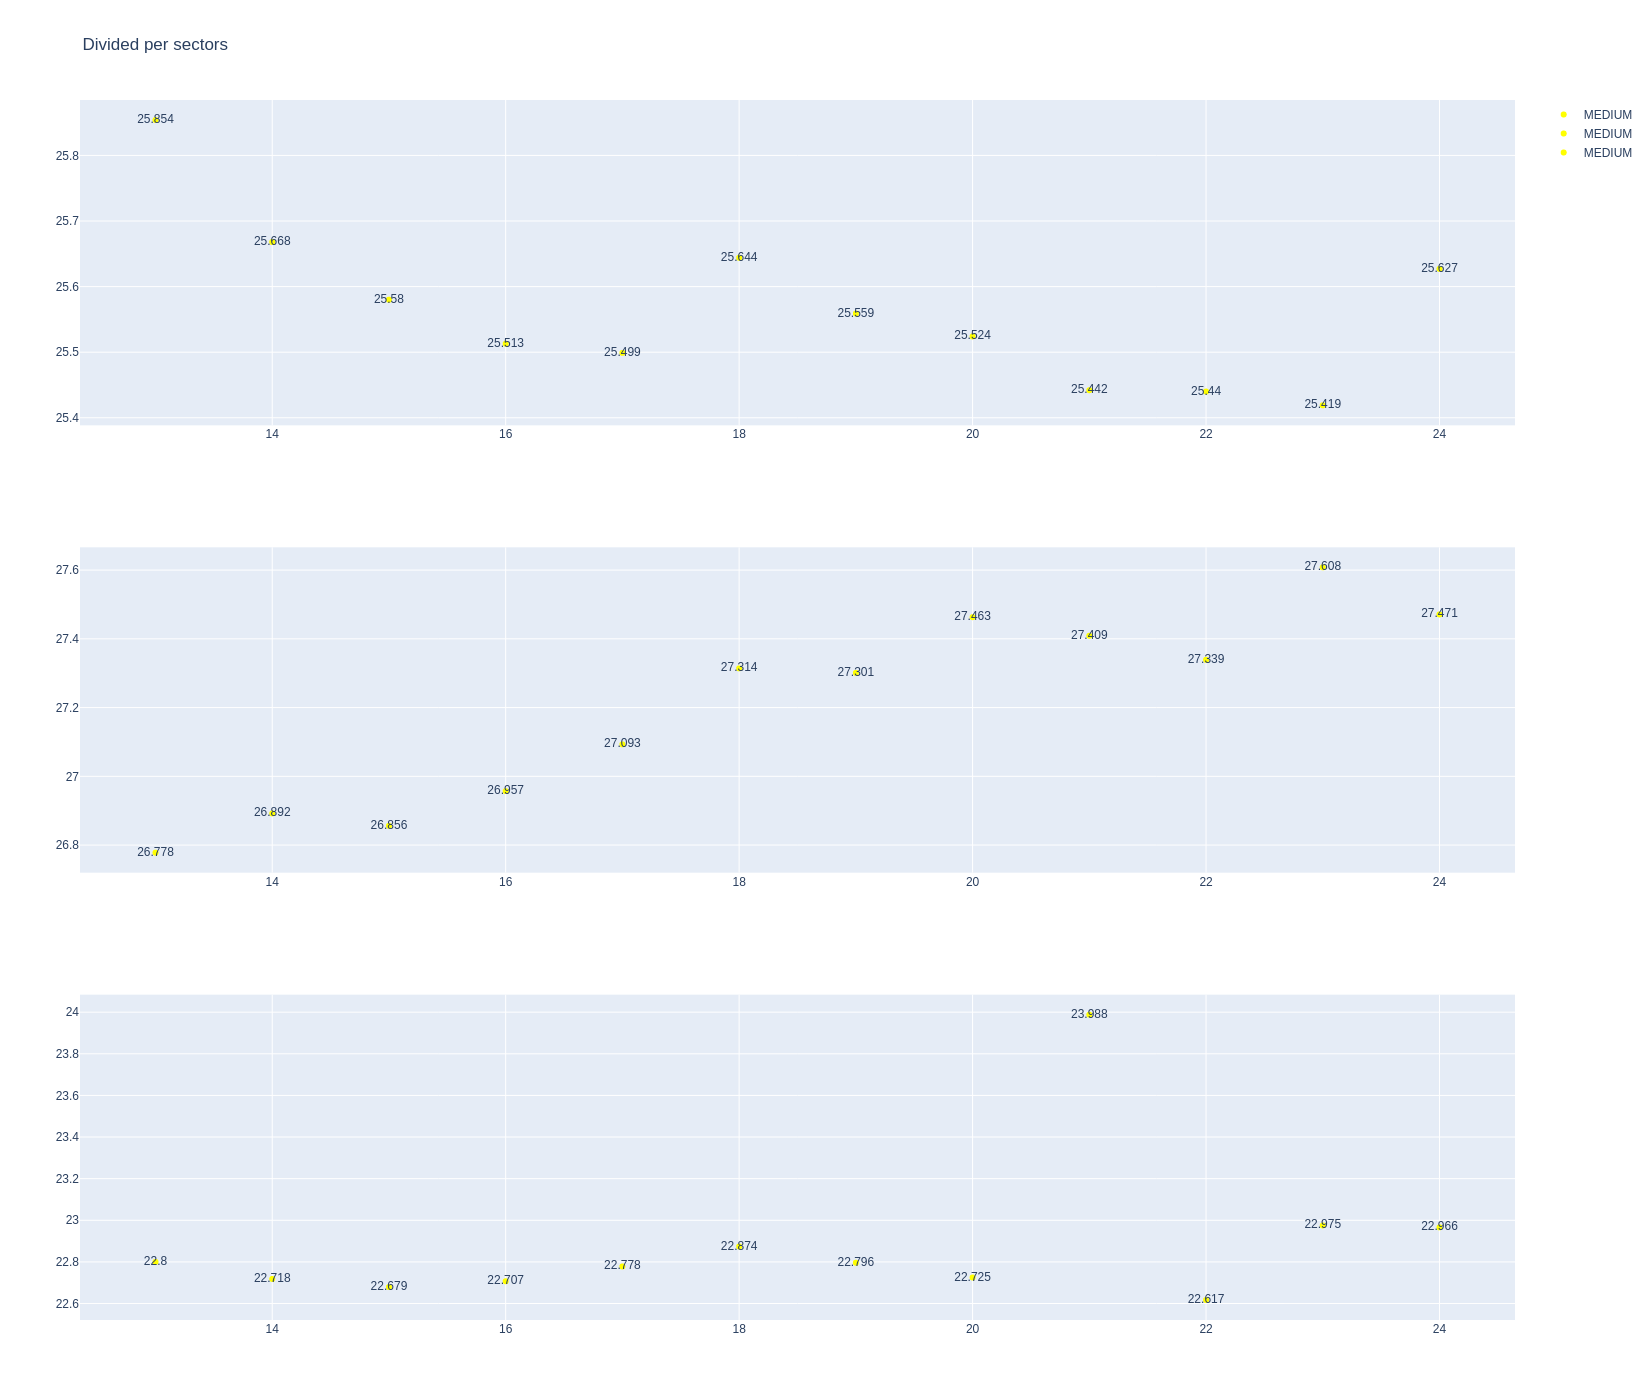

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [87]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1267         9914             1             10          1        5   
7          1267         9914             1             43          1        5   
16         1267         9914             2             43          6        6   
20         1267         9914             2             10          6        6   
39         1267         9914             3             10          7       13   
45         1267         9914             3             43          7       14   
58         1267         9914             4             43         15       15   
60         1267         9914             4             10         14       15   
68         1267         9914             5             43         16       18   
77         1267         9914             5             10         16       28   
79         1267         9914             6             43         19       26   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
7    MEDIUM                  0  
16     SOFT                  0  
20     SOFT                  0  
39   MEDIUM                  0  
45   MEDIUM                  5  
58     SOFT                  0  
60     SOFT                  1  
68     SOFT                 13  
77   MEDIUM                 12  
79     SOFT                  5

In [88]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
402  Franco COLAPINTO     SOFT  2025-08-29T14:59:07.983000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
402             25.479             26.982             22.717        75.178

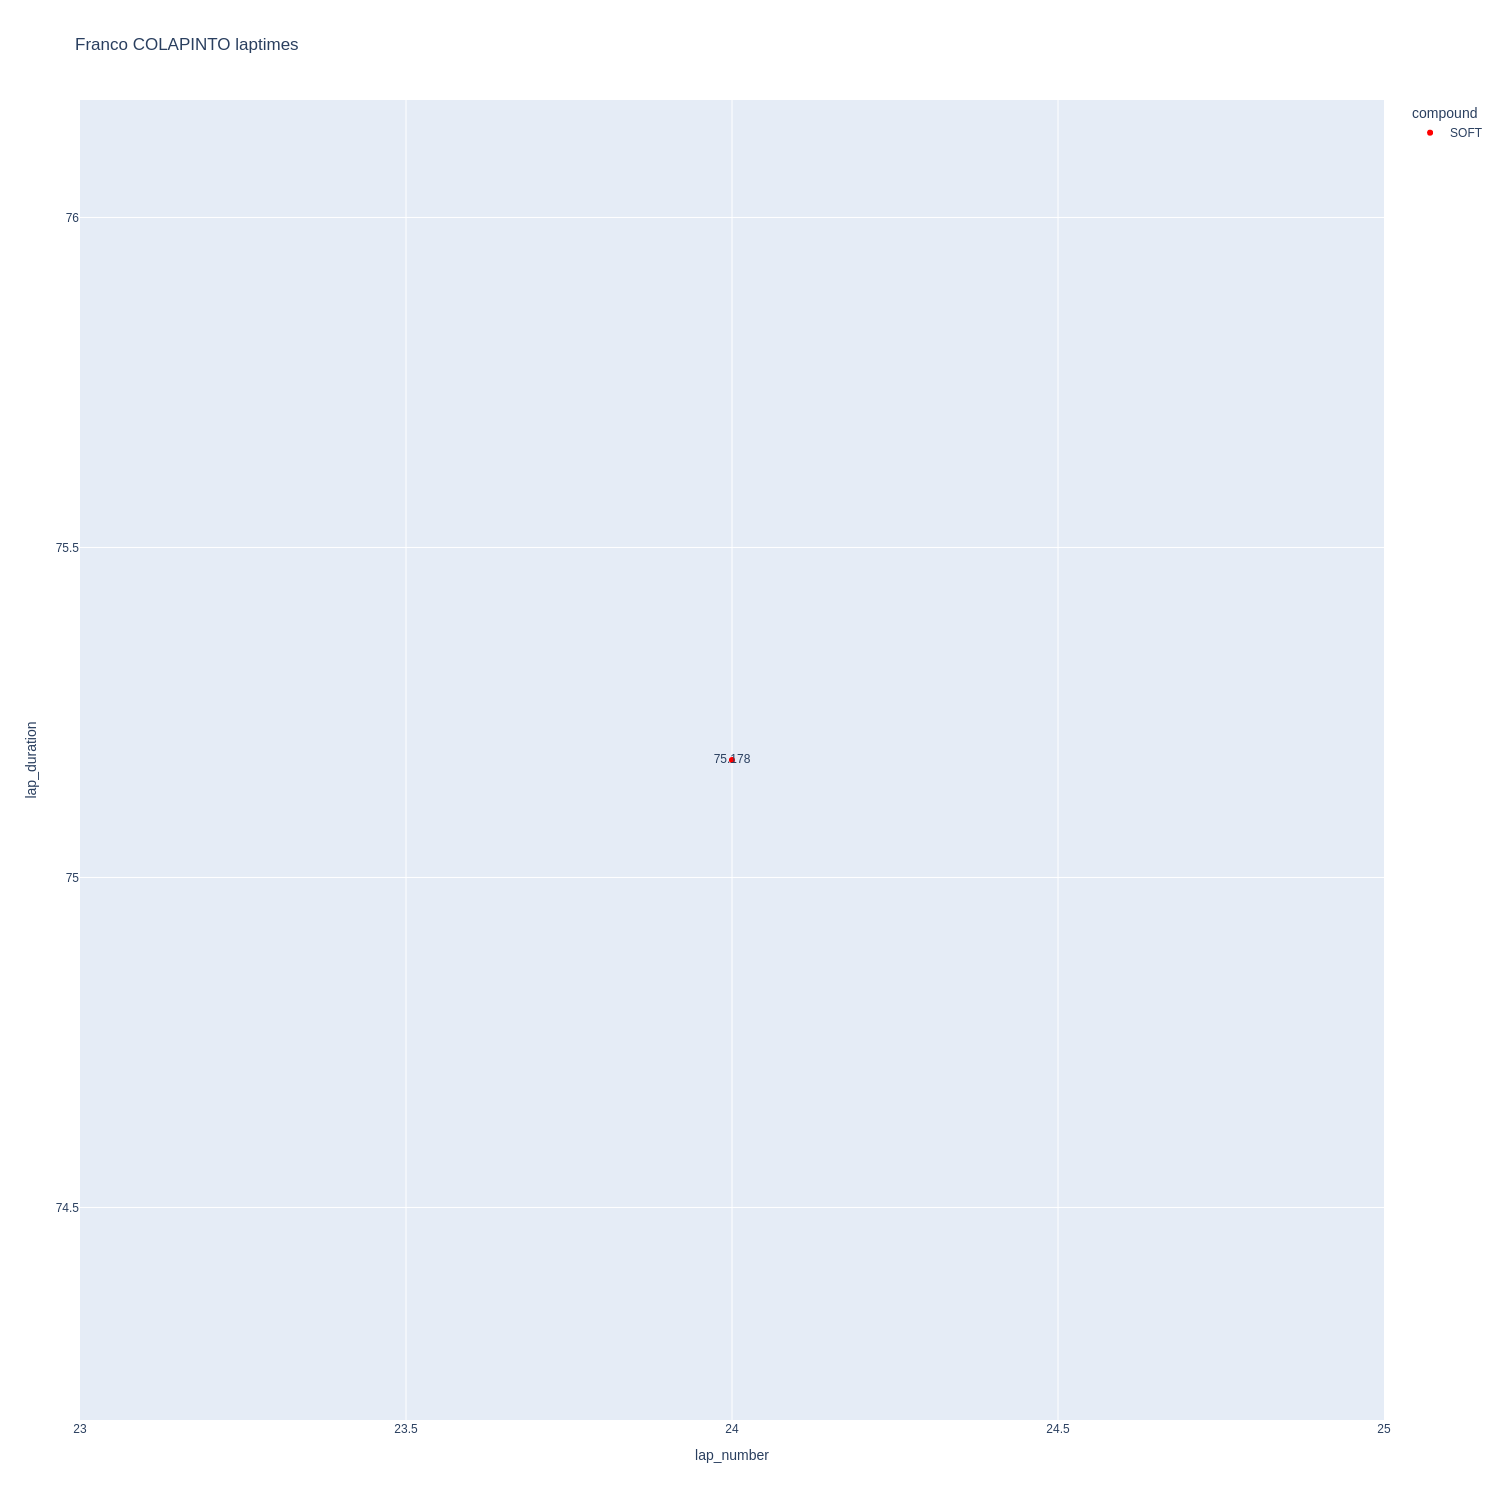

In [89]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

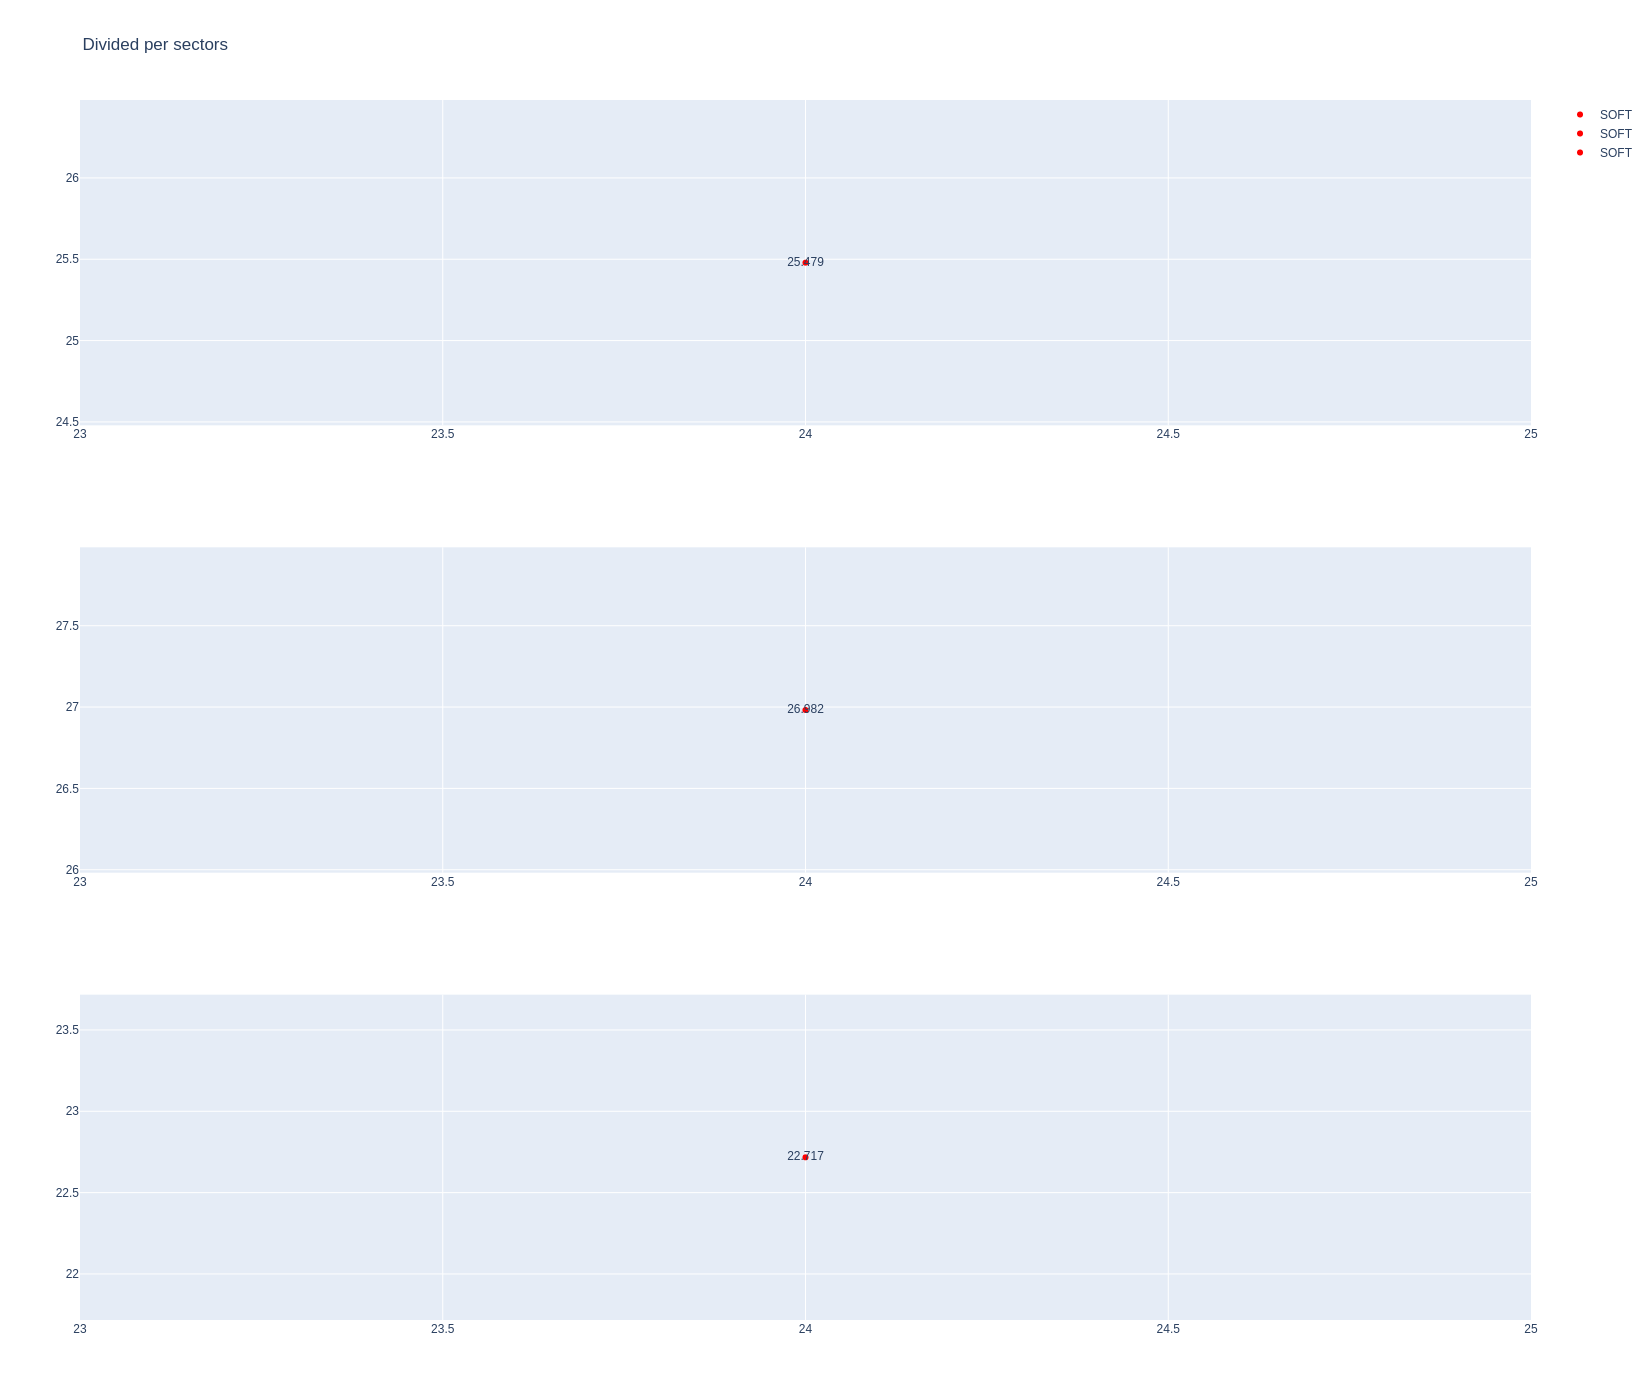

In [90]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [91]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
289  Pierre GASLY   MEDIUM  2025-08-29T14:48:39.716000+00:00          18   
300  Pierre GASLY   MEDIUM  2025-08-29T14:49:56.388000+00:00          19   
311  Pierre GASLY   MEDIUM  2025-08-29T14:51:12.521000+00:00          20   
322  Pierre GASLY   MEDIUM  2025-08-29T14:52:28.524000+00:00          21   
335  Pierre GASLY   MEDIUM  2025-08-29T14:53:44.832000+00:00          22   
350  Pierre GASLY   MEDIUM  2025-08-29T14:55:00.813000+00:00          23   
366  Pierre GASLY   MEDIUM  2025-08-29T14:56:16.887000+00:00          24   
382  Pierre GASLY   MEDIUM  2025-08-29T14:57:33.468000+00:00          25   
399  Pierre GASLY   MEDIUM  2025-08-29T14:58:50.936000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
289             26.018             27.485             23.197        76.700  
300             25.759             27.199             23.105        76.063  
311             25.707             27.176             23.167        76.050  
322             25.987             27.056             23.256        76.299  
335             25.672             27.148             23.117        75.937  
350             25.891             27.158             23.027        76.076  
366             26.069             27.357             23.135        76.561  
382             26.755             27.491             23.370        77.616  
399             26.080             27.445             23.122        76.647

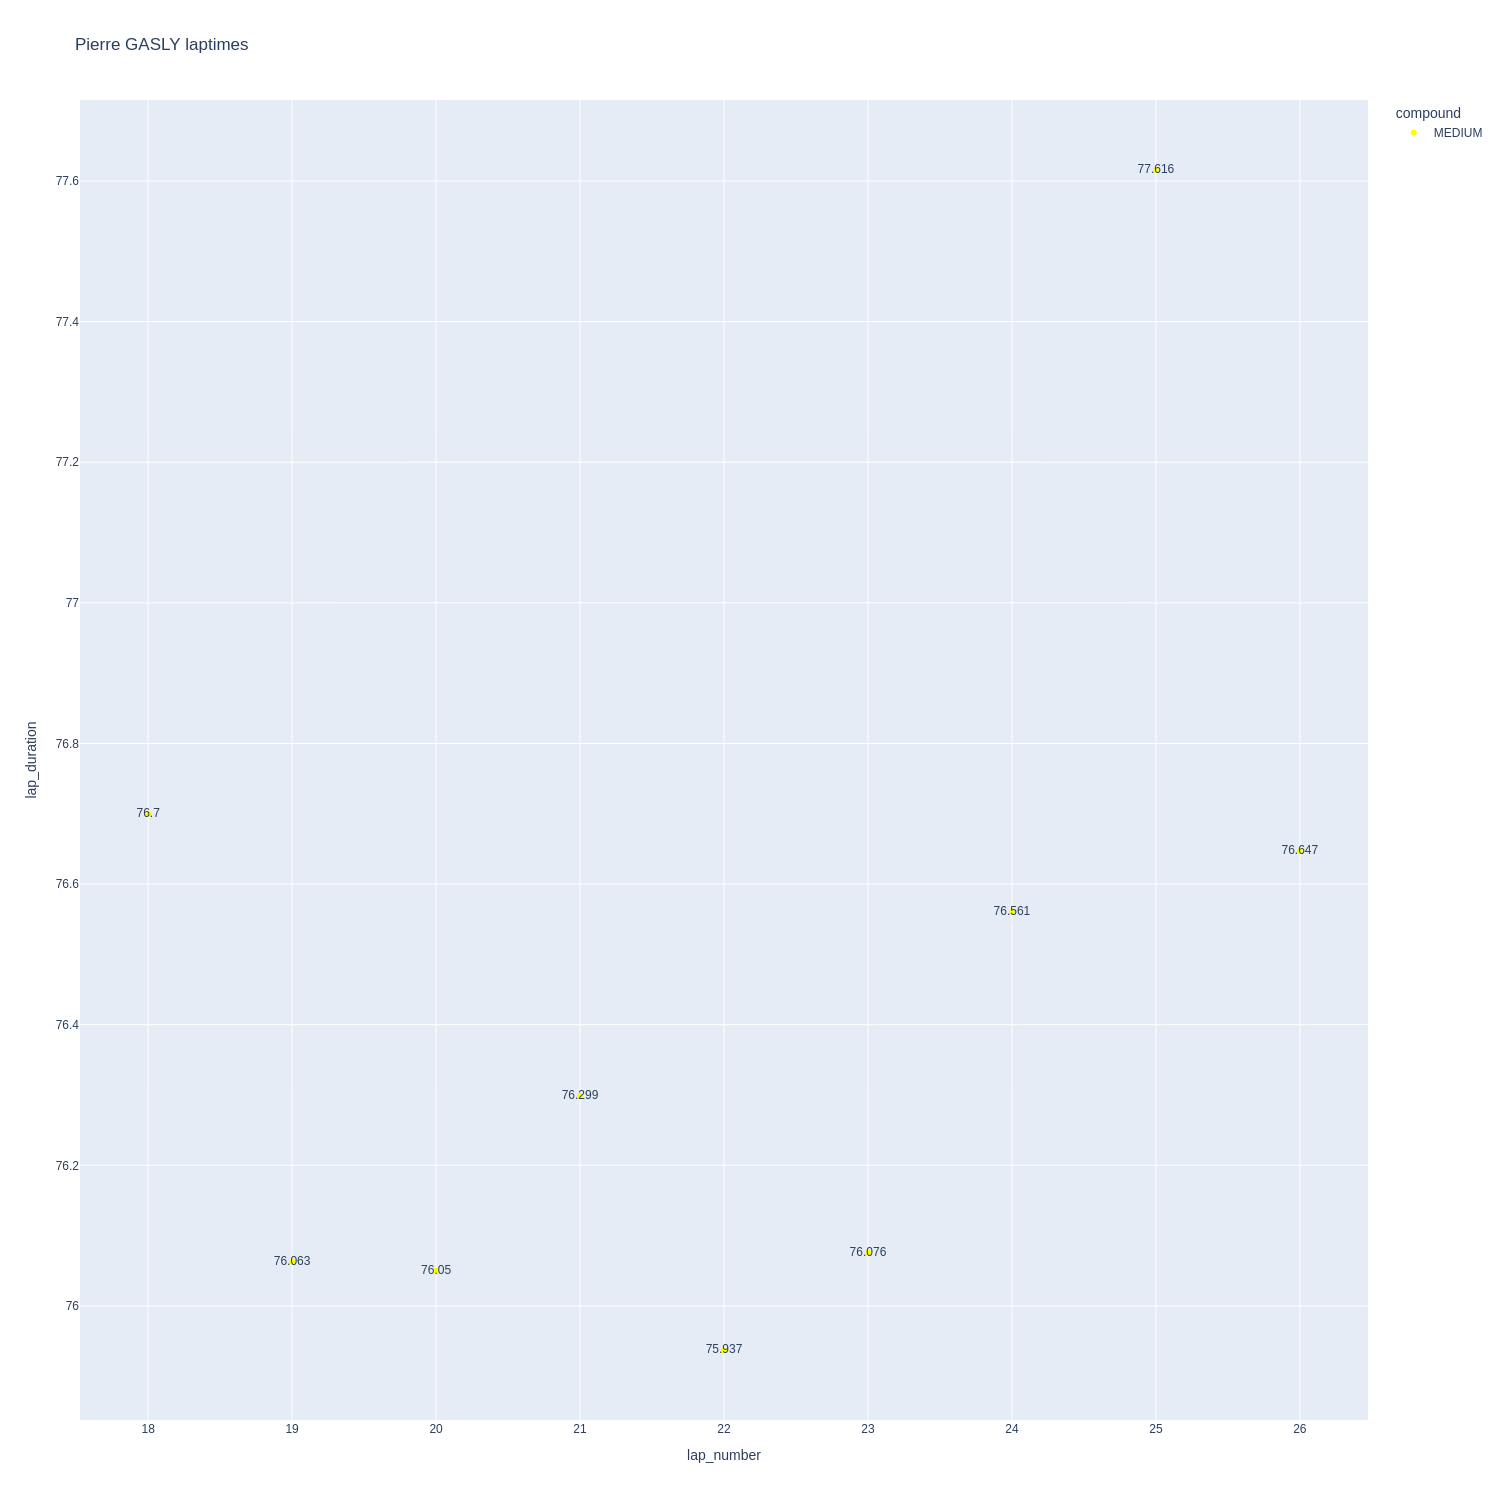

In [92]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

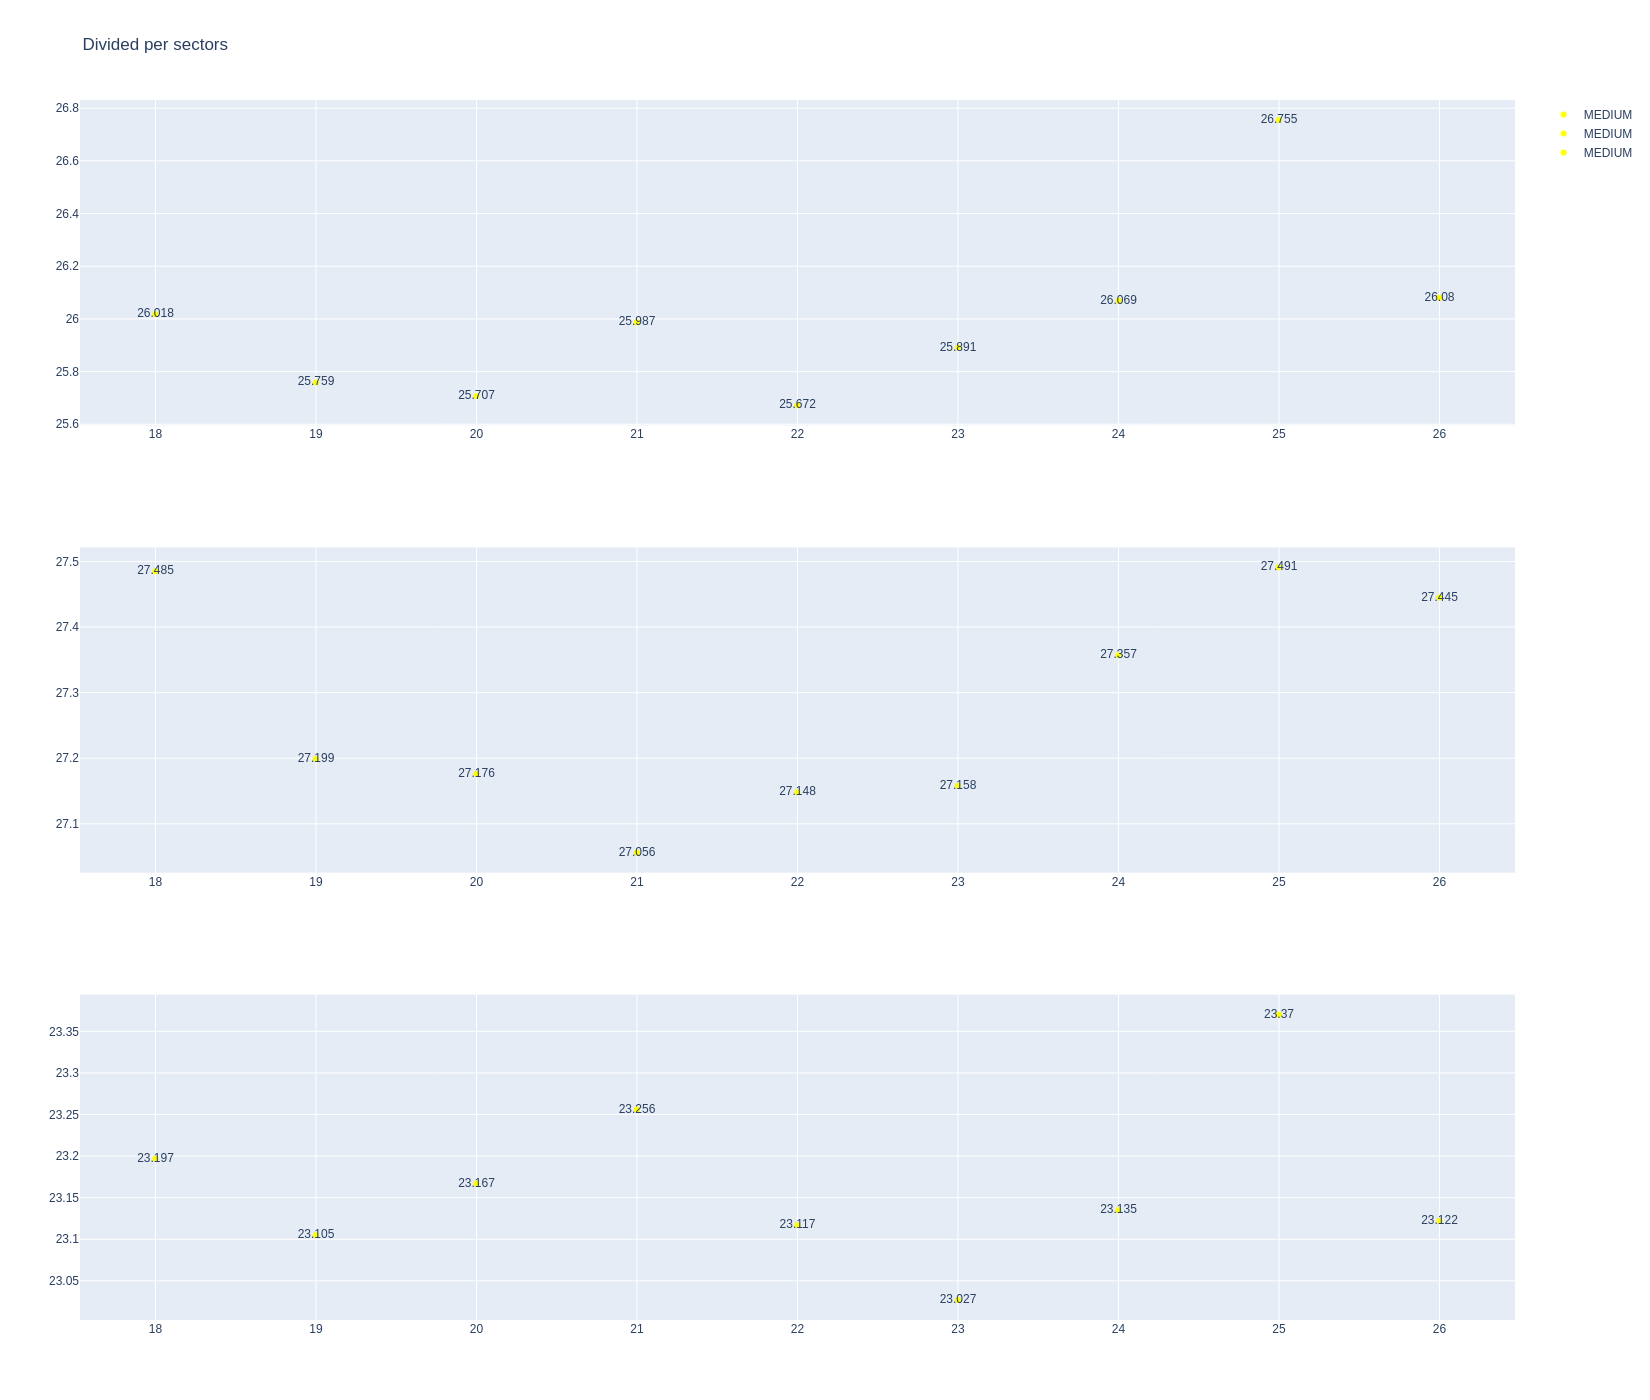

In [93]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [94]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1267         9914             1             55          1        5   
8          1267         9914             1             23          1        5   
14         1267         9914             2             23          6        6   
15         1267         9914             2             55          6        7   
23         1267         9914             3             55          8        9   
40         1267         9914             4             55         10       15   
42         1267         9914             3             23          7       14   
47         1267         9914             4             23         15       16   
64         1267         9914             5             55         16       17   
65         1267         9914             6             55         18       18   
89         1267         9914             7             55         19       30   

   compound  tyre_age_at_start  
3      HARD                  0  
8      HARD                  0  
14     SOFT                  0  
15     SOFT                  0  
23     HARD                  5  
40     HARD                  7  
42     HARD                  5  
47     SOFT                  1  
64     SOFT                  2  
65     SOFT                  0  
89     HARD                 13

In [95]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
195  Alexander ALBON     HARD  2025-08-29T14:33:26.931000+00:00          13   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
195             24.501             25.681             26.563        76.745

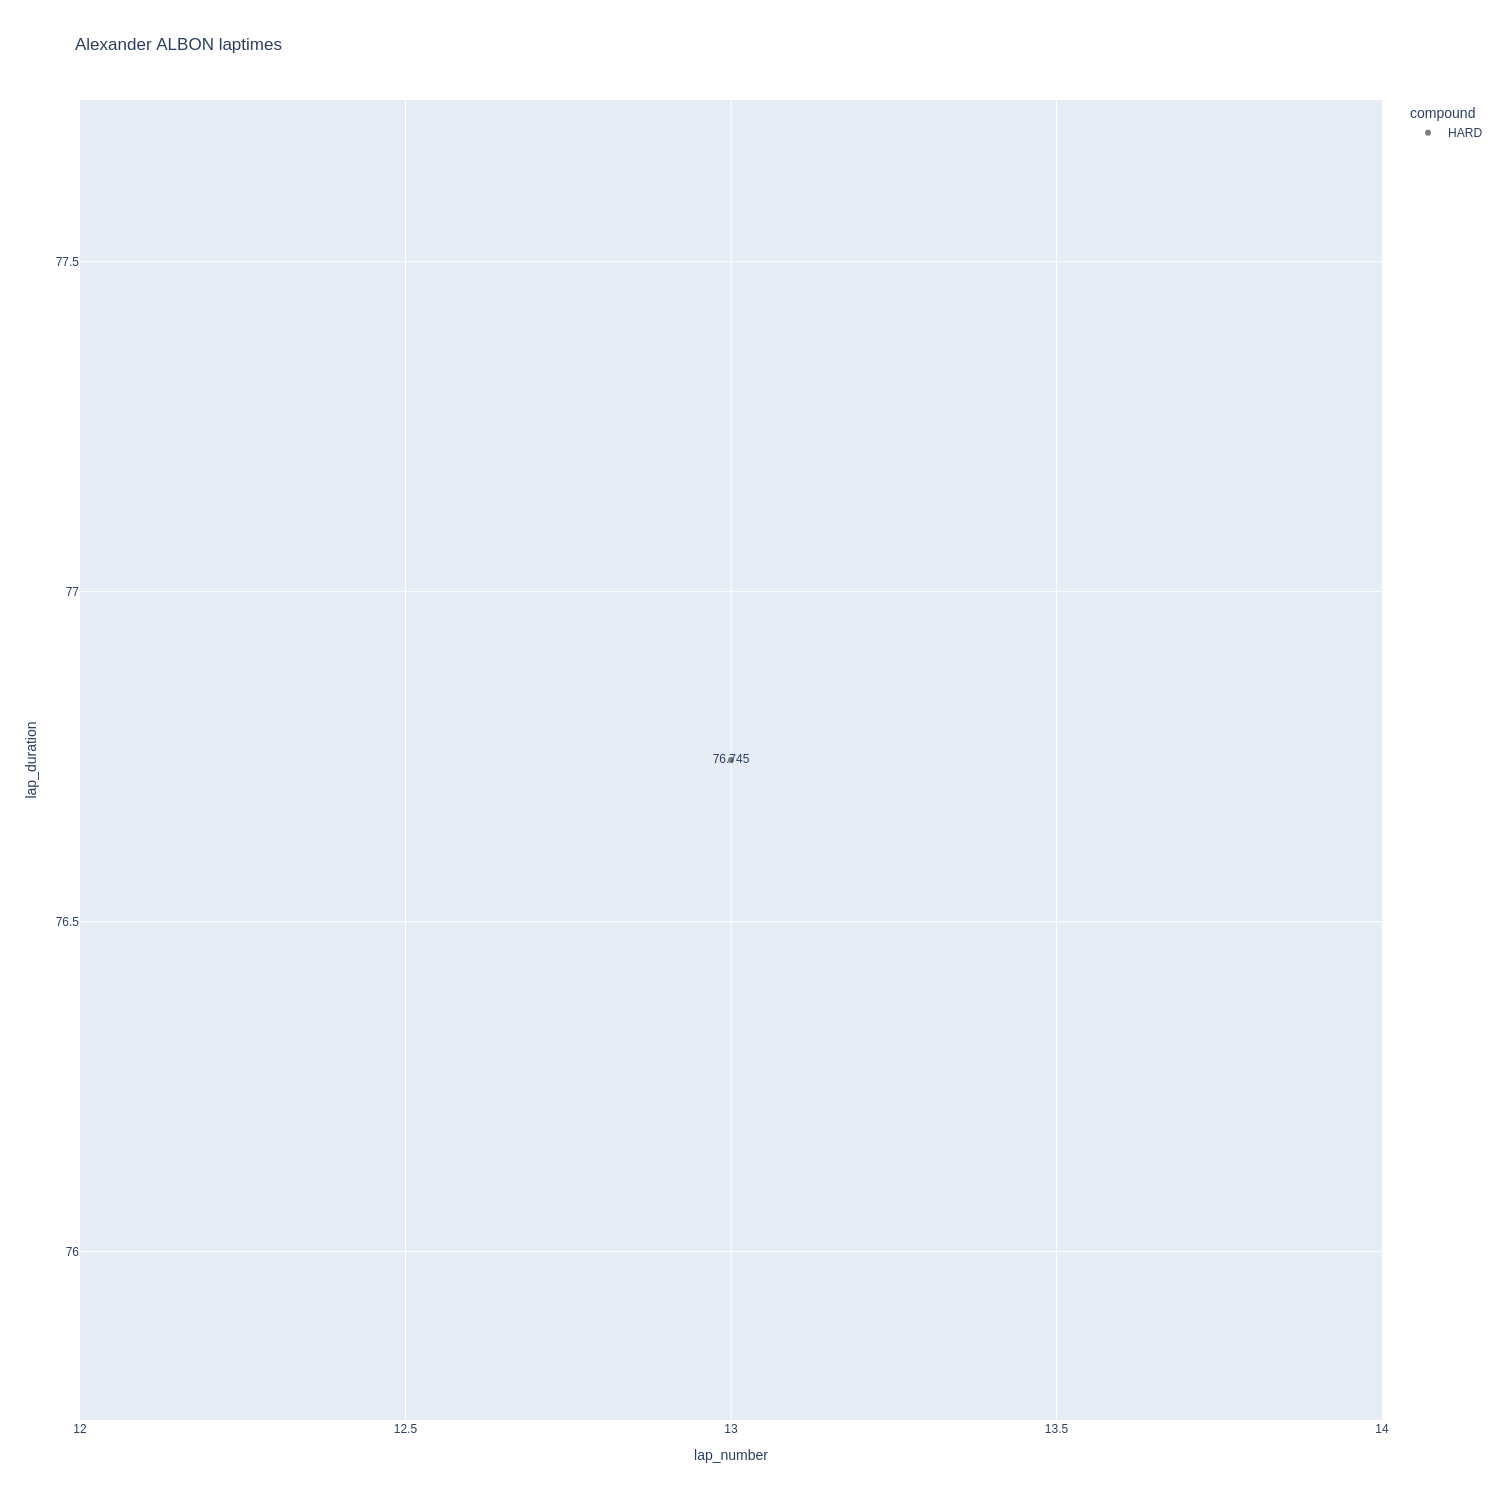

In [96]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

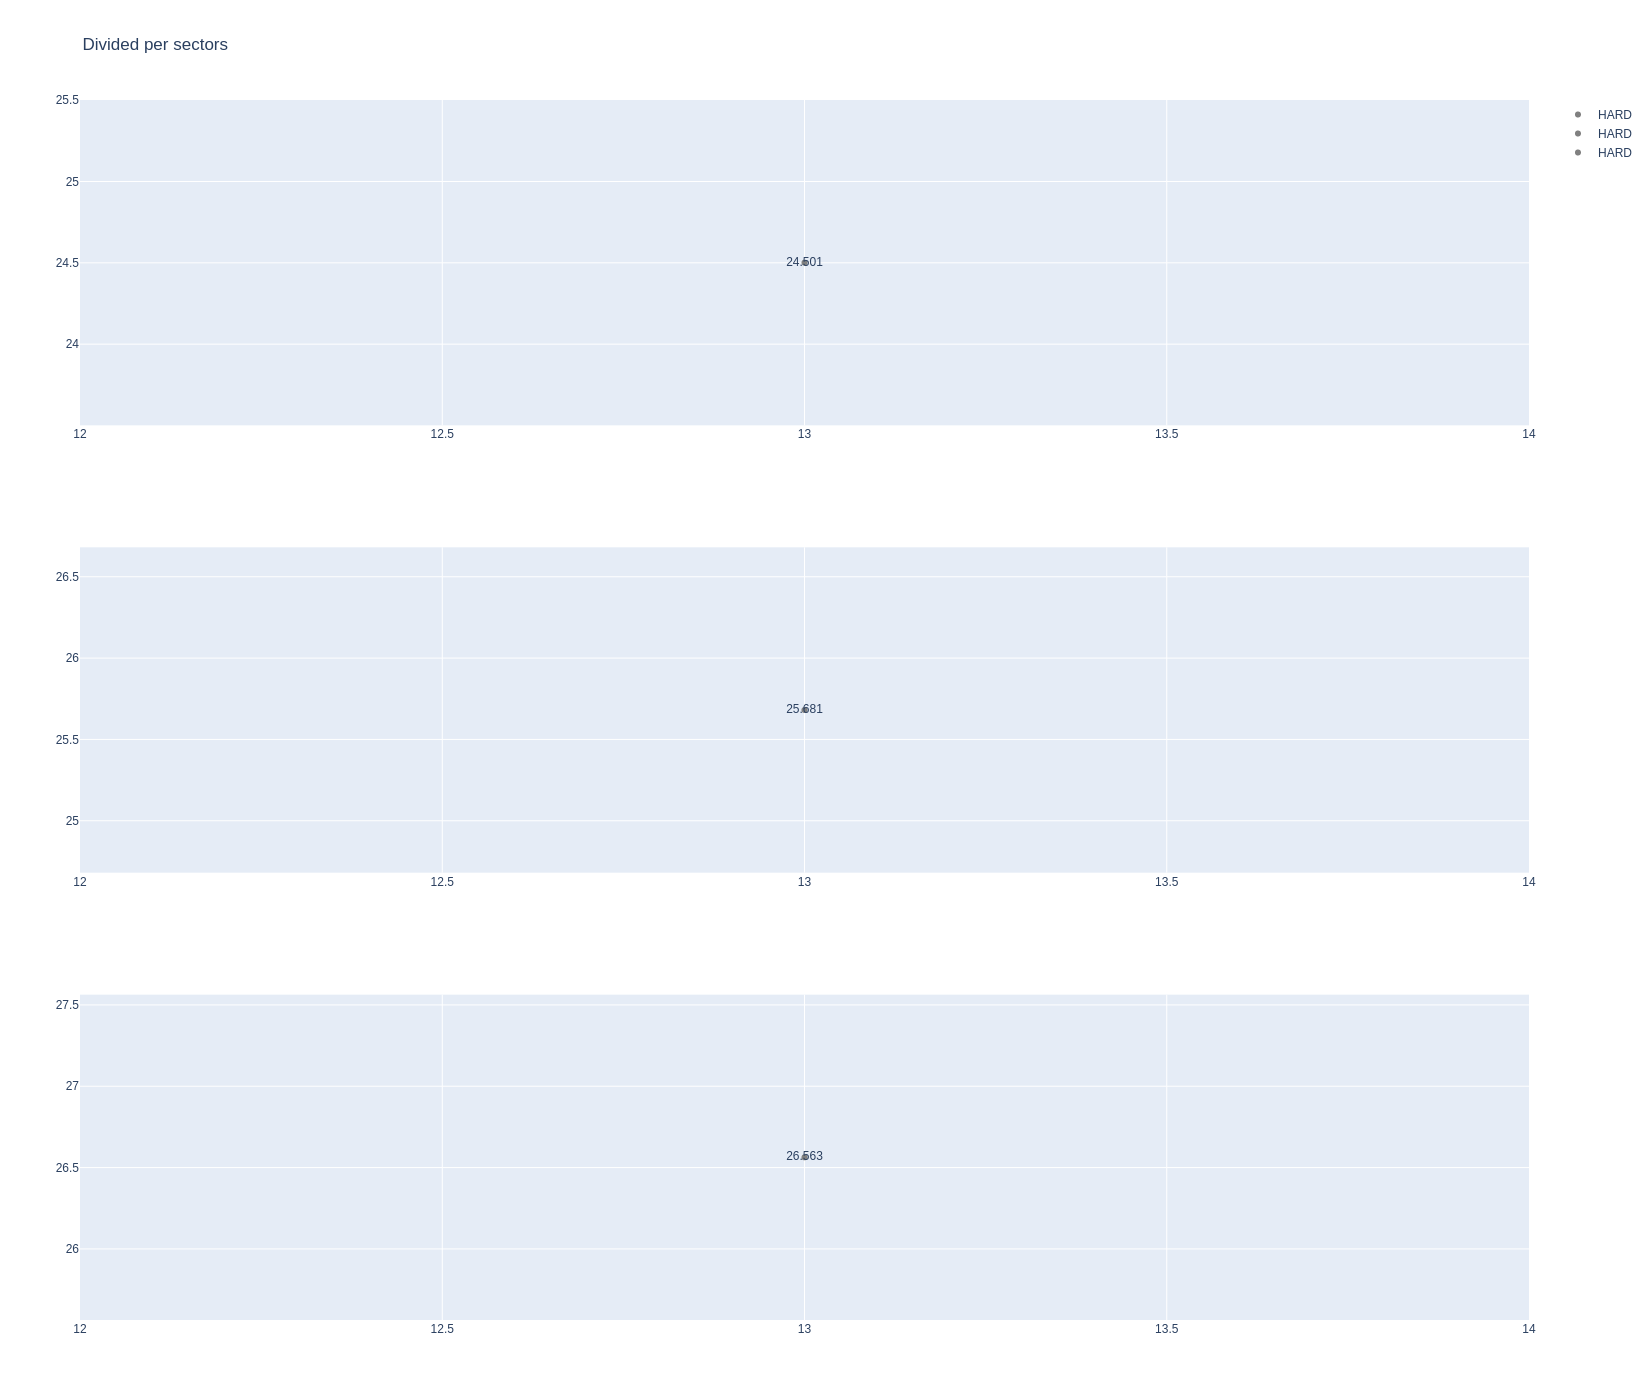

In [97]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [98]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
293  Carlos SAINZ     HARD  2025-08-29T14:49:17.423000+00:00          20   
305  Carlos SAINZ     HARD  2025-08-29T14:50:32.853000+00:00          21   
315  Carlos SAINZ     HARD  2025-08-29T14:51:48.336000+00:00          22   
328  Carlos SAINZ     HARD  2025-08-29T14:53:03.692000+00:00          23   
343  Carlos SAINZ     HARD  2025-08-29T14:54:19.189000+00:00          24   
358  Carlos SAINZ     HARD  2025-08-29T14:55:34.574000+00:00          25   
374  Carlos SAINZ     HARD  2025-08-29T14:56:50.168000+00:00          26   
390  Carlos SAINZ     HARD  2025-08-29T14:58:06.106000+00:00          27   
406  Carlos SAINZ     HARD  2025-08-29T14:59:22.310000+00:00          28   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
293             25.528             27.063             22.743        75.334  
305             25.498             27.038             22.969        75.505  
315             25.437             27.218             22.734        75.389  
328             25.412             27.228             22.796        75.436  
343             25.372             27.331             22.715        75.418  
358             25.392             27.446             22.788        75.626  
374             25.503             27.637             22.796        75.936  
390             25.459             27.826             22.939        76.224  
406             25.554             27.600             22.905        76.059

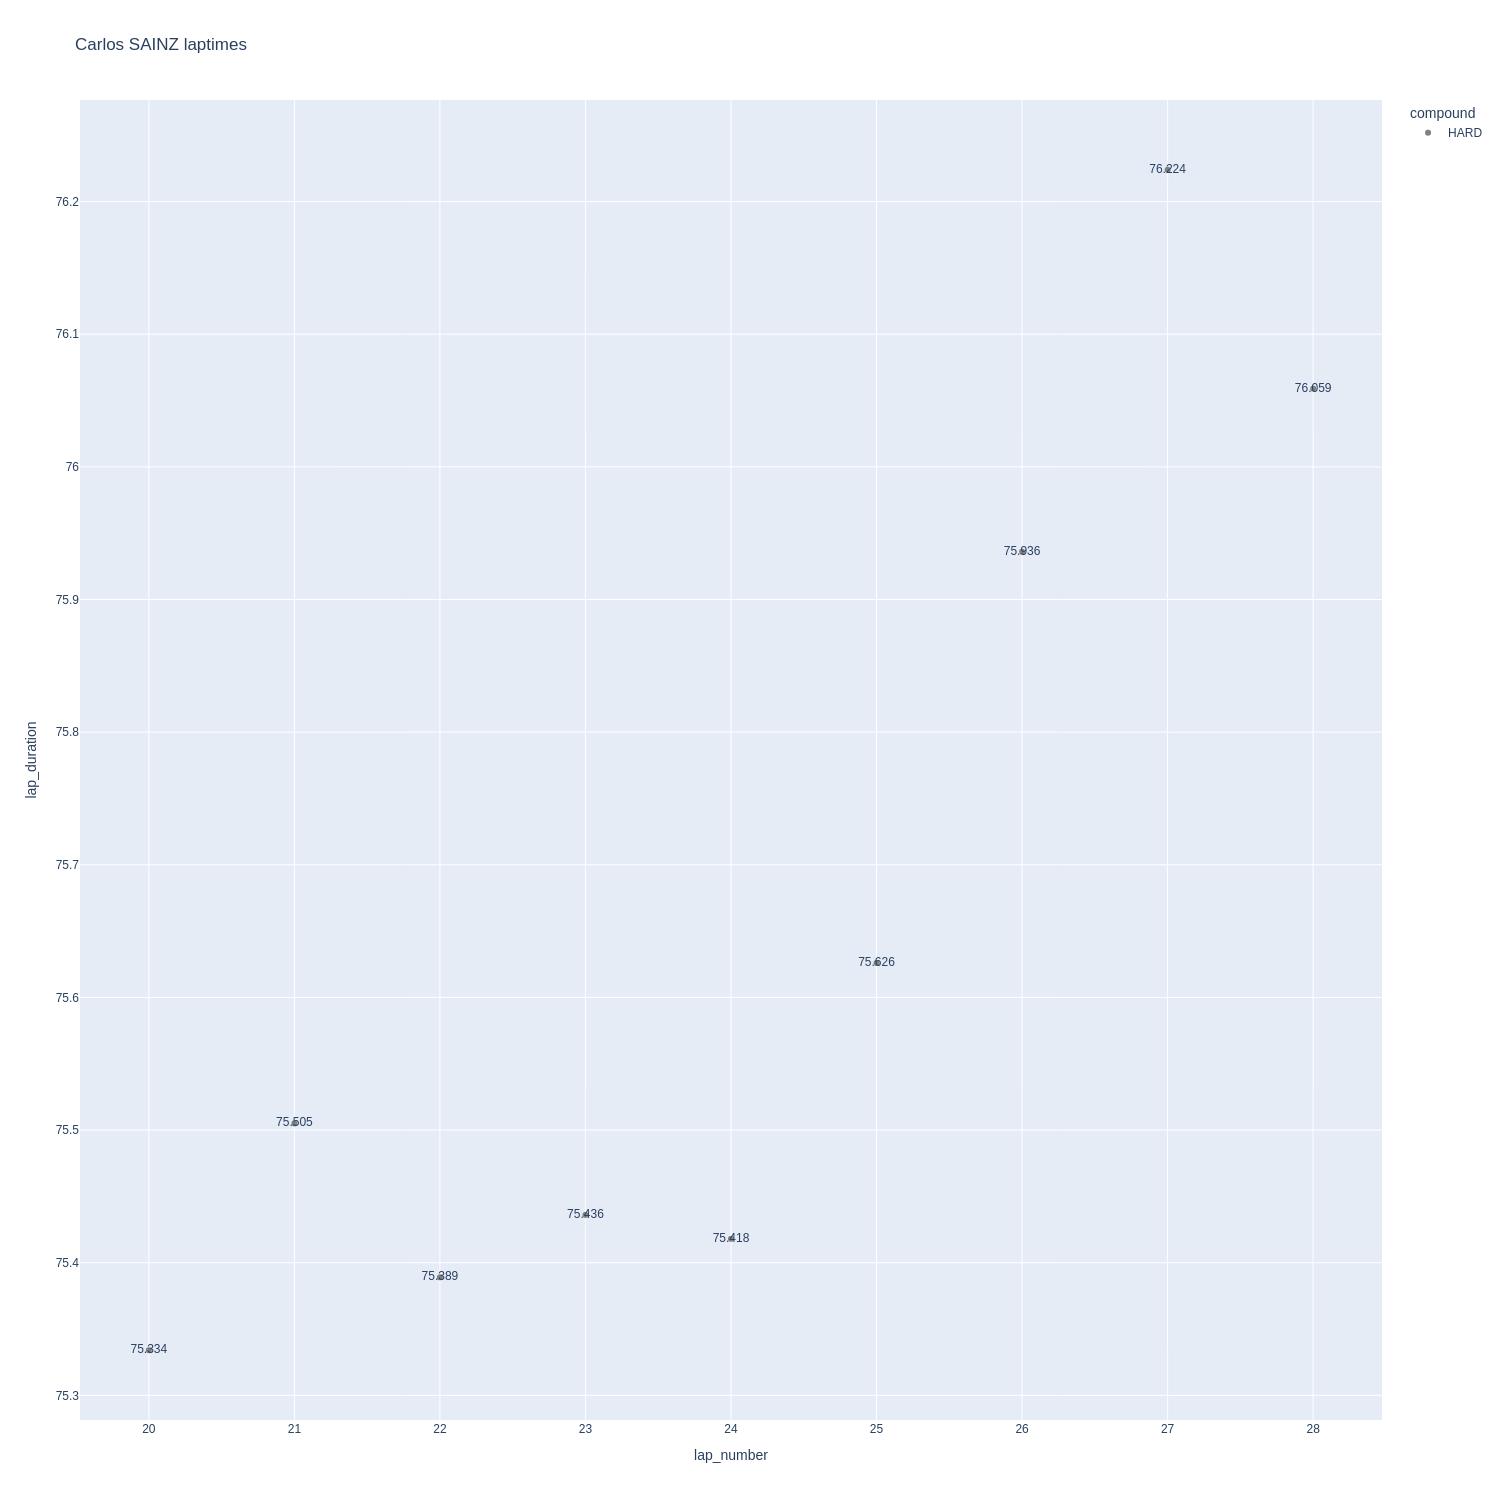

In [99]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

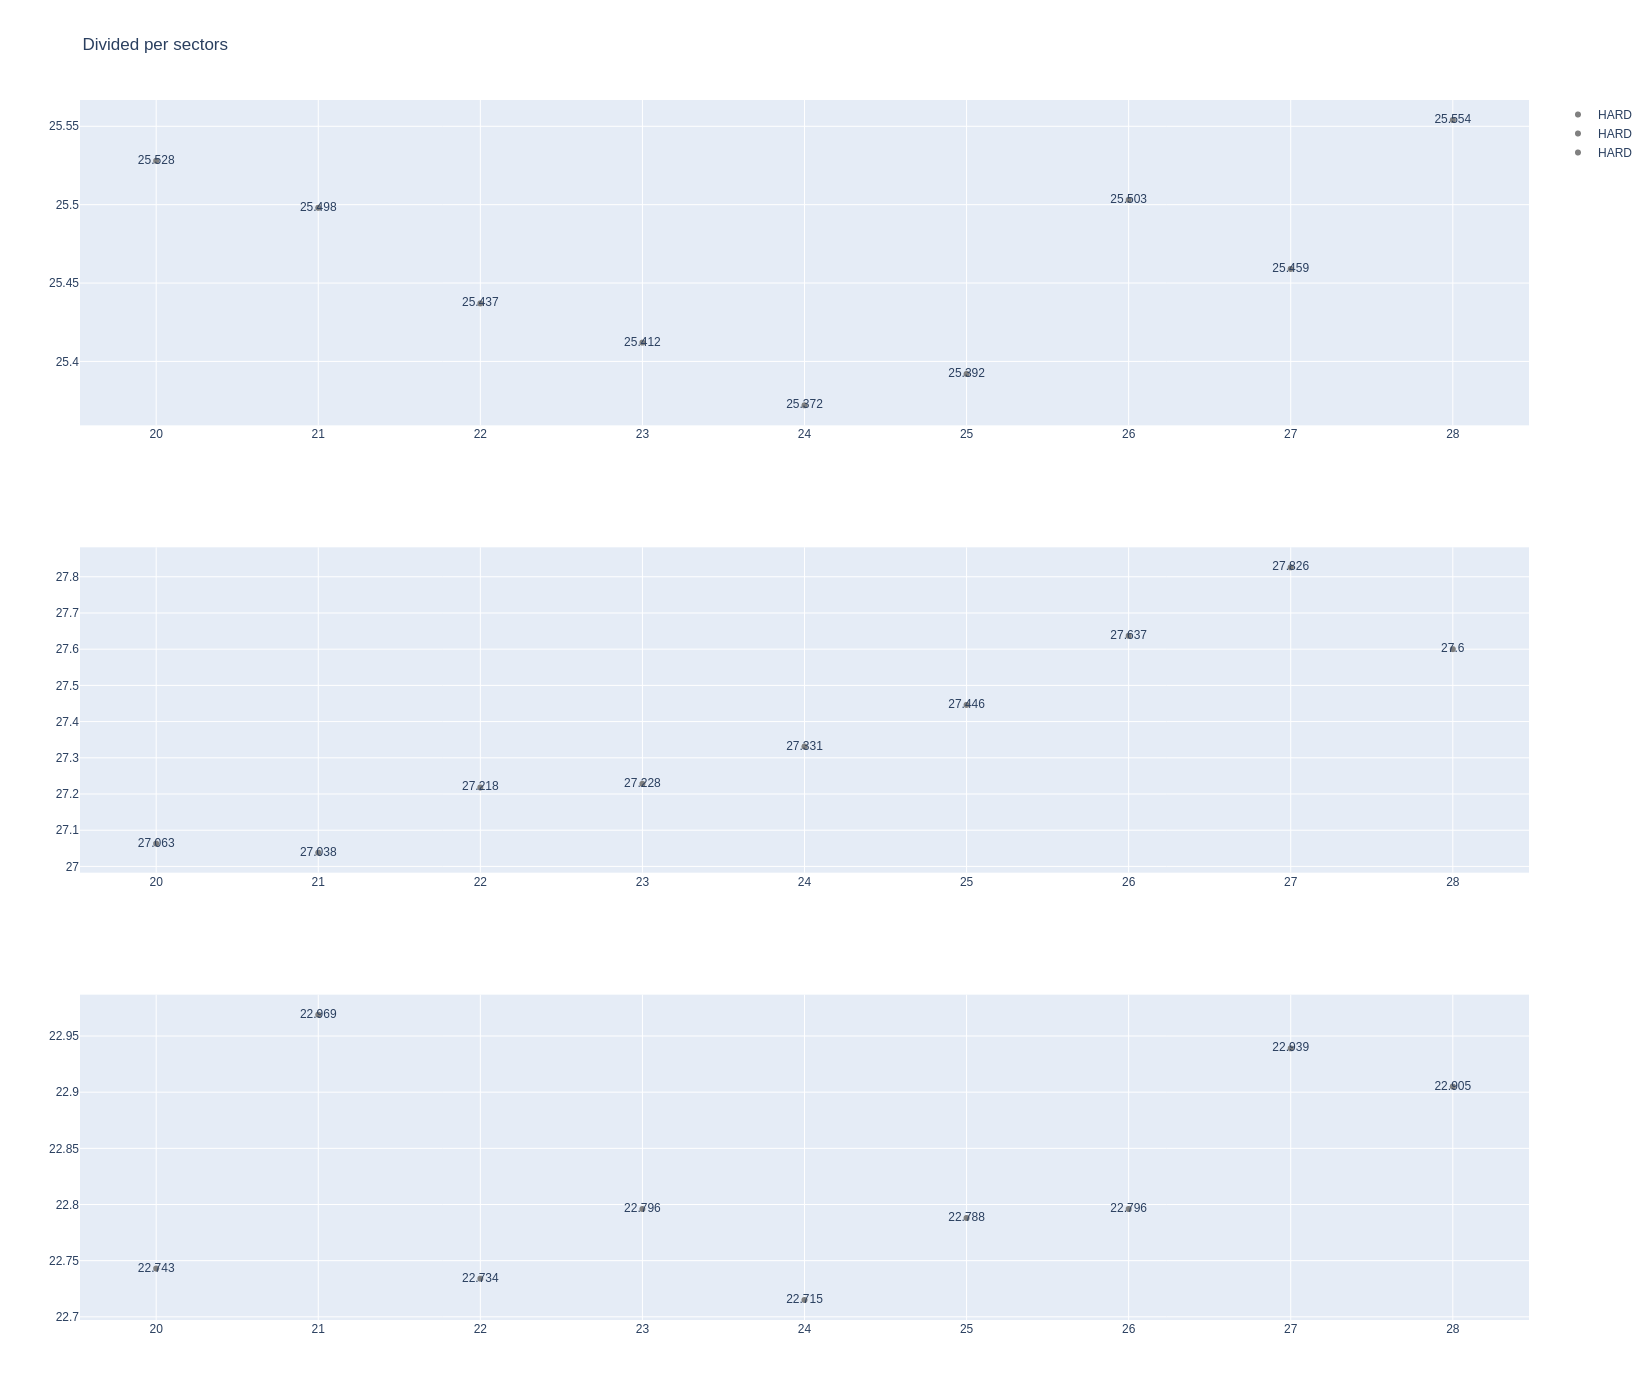

In [100]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [101]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1267         9914             1              5          1        3   
1          1267         9914             1             27          1        3   
6          1267         9914             2              5          4        6   
9          1267         9914             2             27          4        6   
24         1267         9914             3             27          7        7   
34         1267         9914             3              5          7        7   
48         1267         9914             4              5          8       10   
49         1267         9914             4             27          8       10   
82         1267         9914             5              5         11       25   
87         1267         9914             5             27         11       25   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
1    MEDIUM                  0  
6      SOFT                  0  
9      SOFT                  0  
24     SOFT                  3  
34     SOFT                  0  
48     SOFT                  4  
49     SOFT                  4  
82   MEDIUM                  3  
87   MEDIUM                  3

In [102]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
253  Nico HULKENBERG   MEDIUM  2025-08-29T14:45:34.468000+00:00          12   
268  Nico HULKENBERG   MEDIUM  2025-08-29T14:46:49.557000+00:00          13   
285  Nico HULKENBERG   MEDIUM  2025-08-29T14:48:07.584000+00:00          14   
296  Nico HULKENBERG   MEDIUM  2025-08-29T14:49:22.501000+00:00          15   
308  Nico HULKENBERG   MEDIUM  2025-08-29T14:50:37.822000+00:00          16   
318  Nico HULKENBERG   MEDIUM  2025-08-29T14:51:53.773000+00:00          17   
331  Nico HULKENBERG   MEDIUM  2025-08-29T14:53:09.614000+00:00          18   
346  Nico HULKENBERG   MEDIUM  2025-08-29T14:54:25.704000+00:00          19   
362  Nico HULKENBERG   MEDIUM  2025-08-29T14:55:41.308000+00:00          20   
377  Nico HULKENBERG   MEDIUM  2025-08-29T14:56:58.924000+00:00          21   
392  Nico HULKENBERG   MEDIUM  2025-08-29T14:58:14.436000+00:00          22   
409  Nico HULKENBERG   MEDIUM  2025-08-29T14:59:30.077000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
253             25.893             26.663             22.623        75.179  
268             25.860             26.833             25.281        77.974  
285             25.659             26.742             22.622        75.023  
296             25.614             26.834             22.761        75.209  
308             25.839             27.115             23.003        75.957  
318             25.814             27.098             23.060        75.972  
331             25.877             27.387             22.800        76.064  
346             25.738             27.143             22.758        75.639  
362             25.707             27.296             24.467        77.470  
377             25.602             27.250             22.724        75.576  
392             25.493             27.281             22.875        75.649  
409             25.701             27.327             22.771        75.799

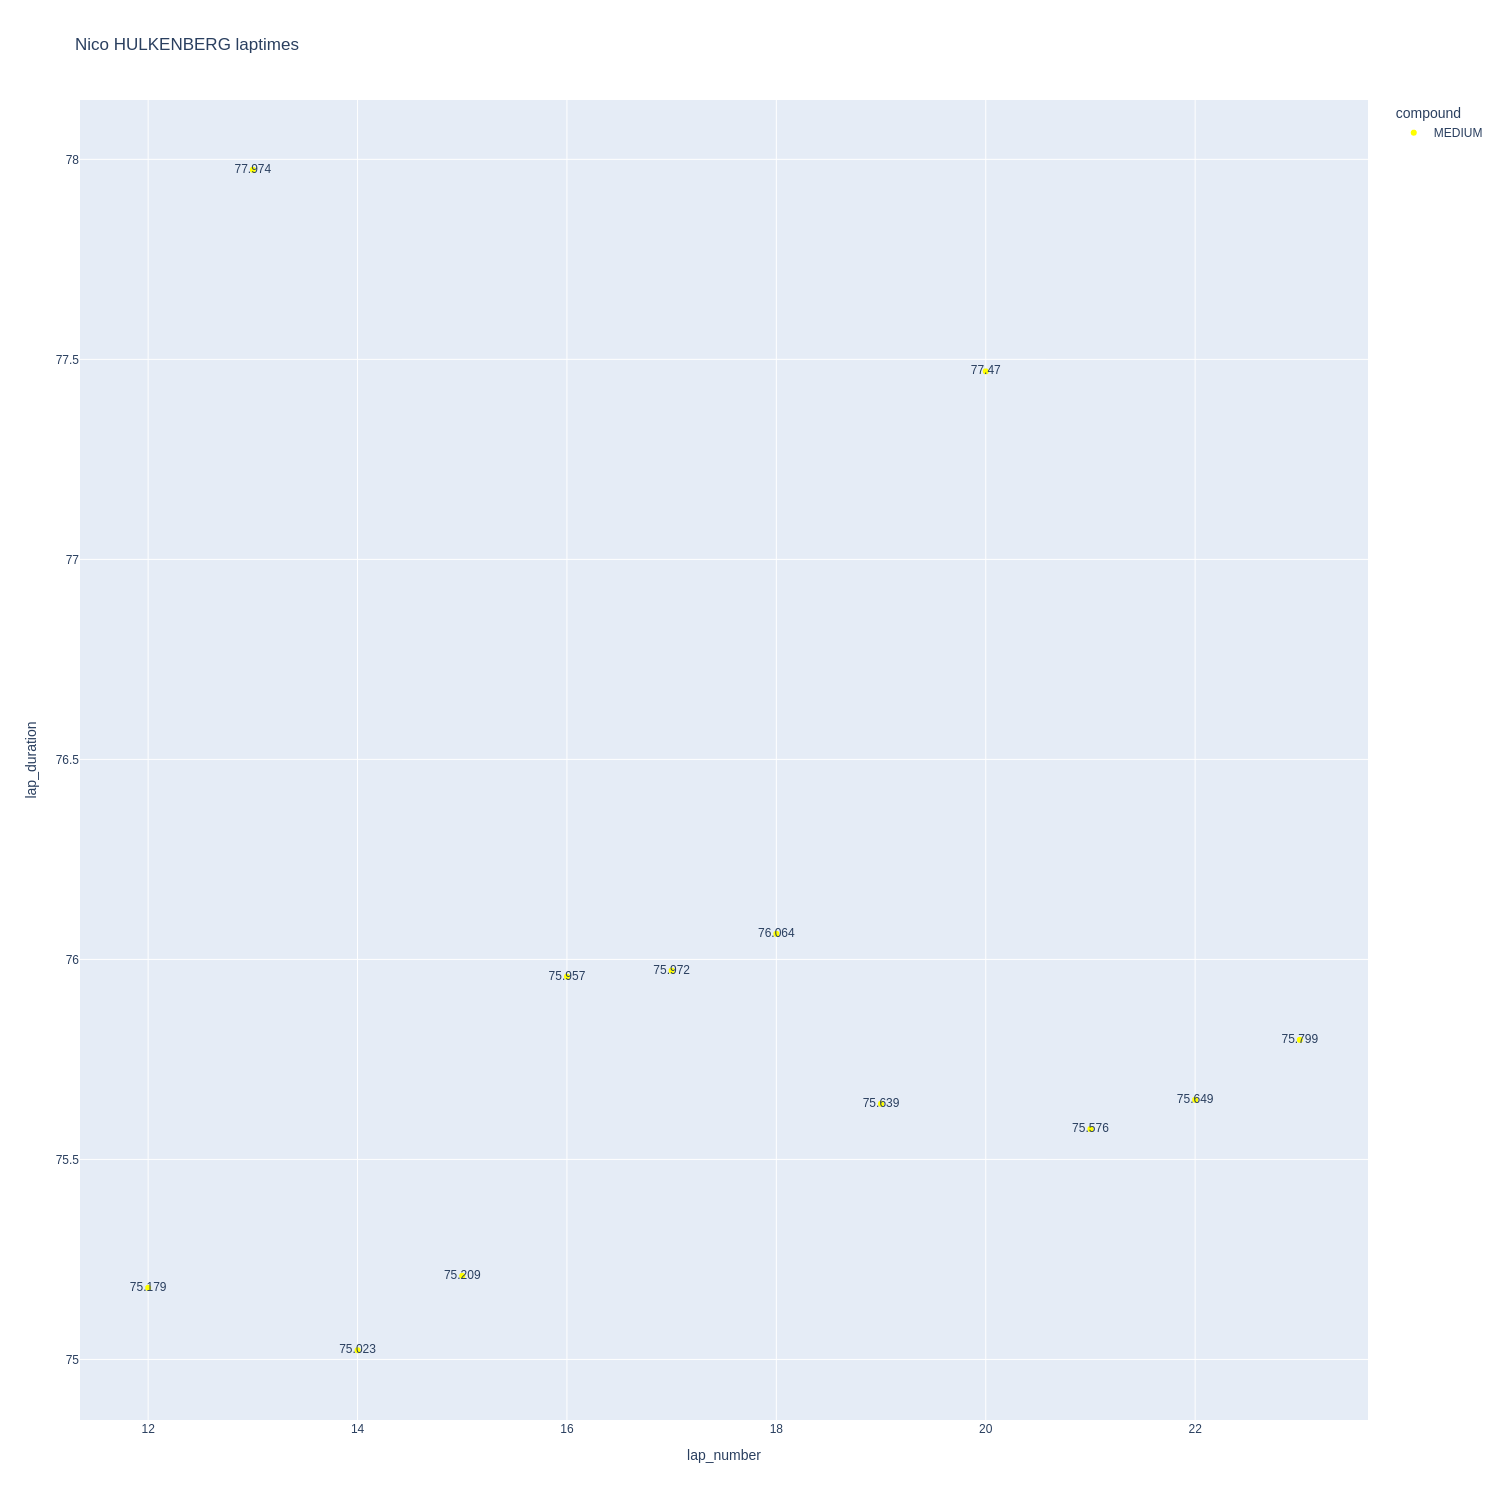

In [103]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

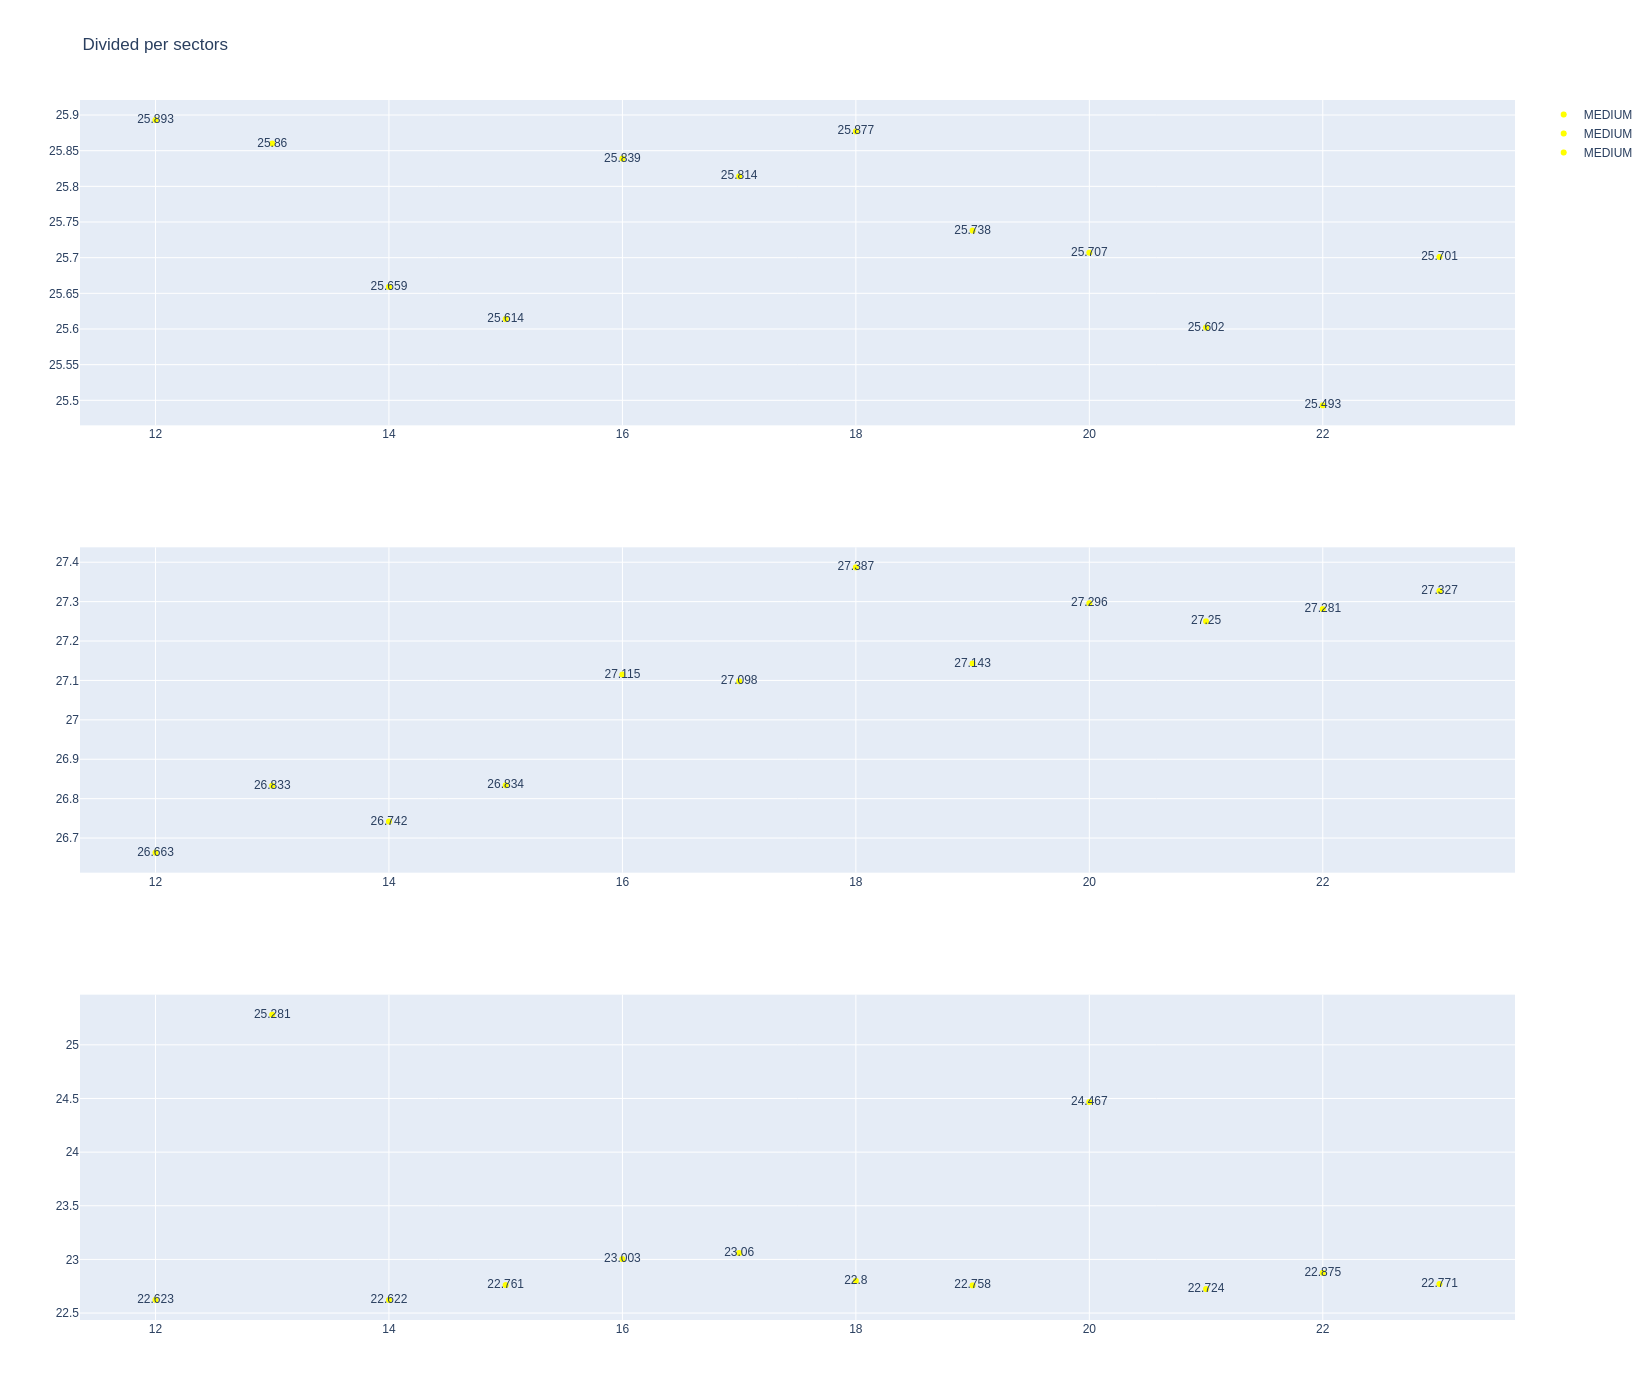

In [104]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [105]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
266  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:46:44.494000+00:00          13   
283  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:48:00.835000+00:00          14   
294  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:49:18.001000+00:00          15   
306  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:50:34.634000+00:00          16   
316  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:51:50.851000+00:00          17   
329  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:53:07.114000+00:00          18   
345  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:54:24.236000+00:00          19   
361  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:55:40.043000+00:00          20   
376  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:56:56.293000+00:00          21   
391  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:58:12.145000+00:00          22   
407  Gabriel BORTOLETO   MEDIUM  2025-08-29T14:59:27.723000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
266             26.103             27.090             23.037        76.230  
283             25.873             28.344             23.044        77.261  
294             26.117             27.357             23.150        76.624  
306             25.911             27.078             23.196        76.185  
316             25.972             27.283             23.040        76.295  
329             26.666             27.462             22.951        77.079  
345             25.731             27.196             22.960        75.887  
361             25.824             27.411             23.011        76.246  
376             25.787             27.081             22.892        75.760  
391             25.613             27.003             22.985        75.601  
407             25.738             27.024             22.889        75.651

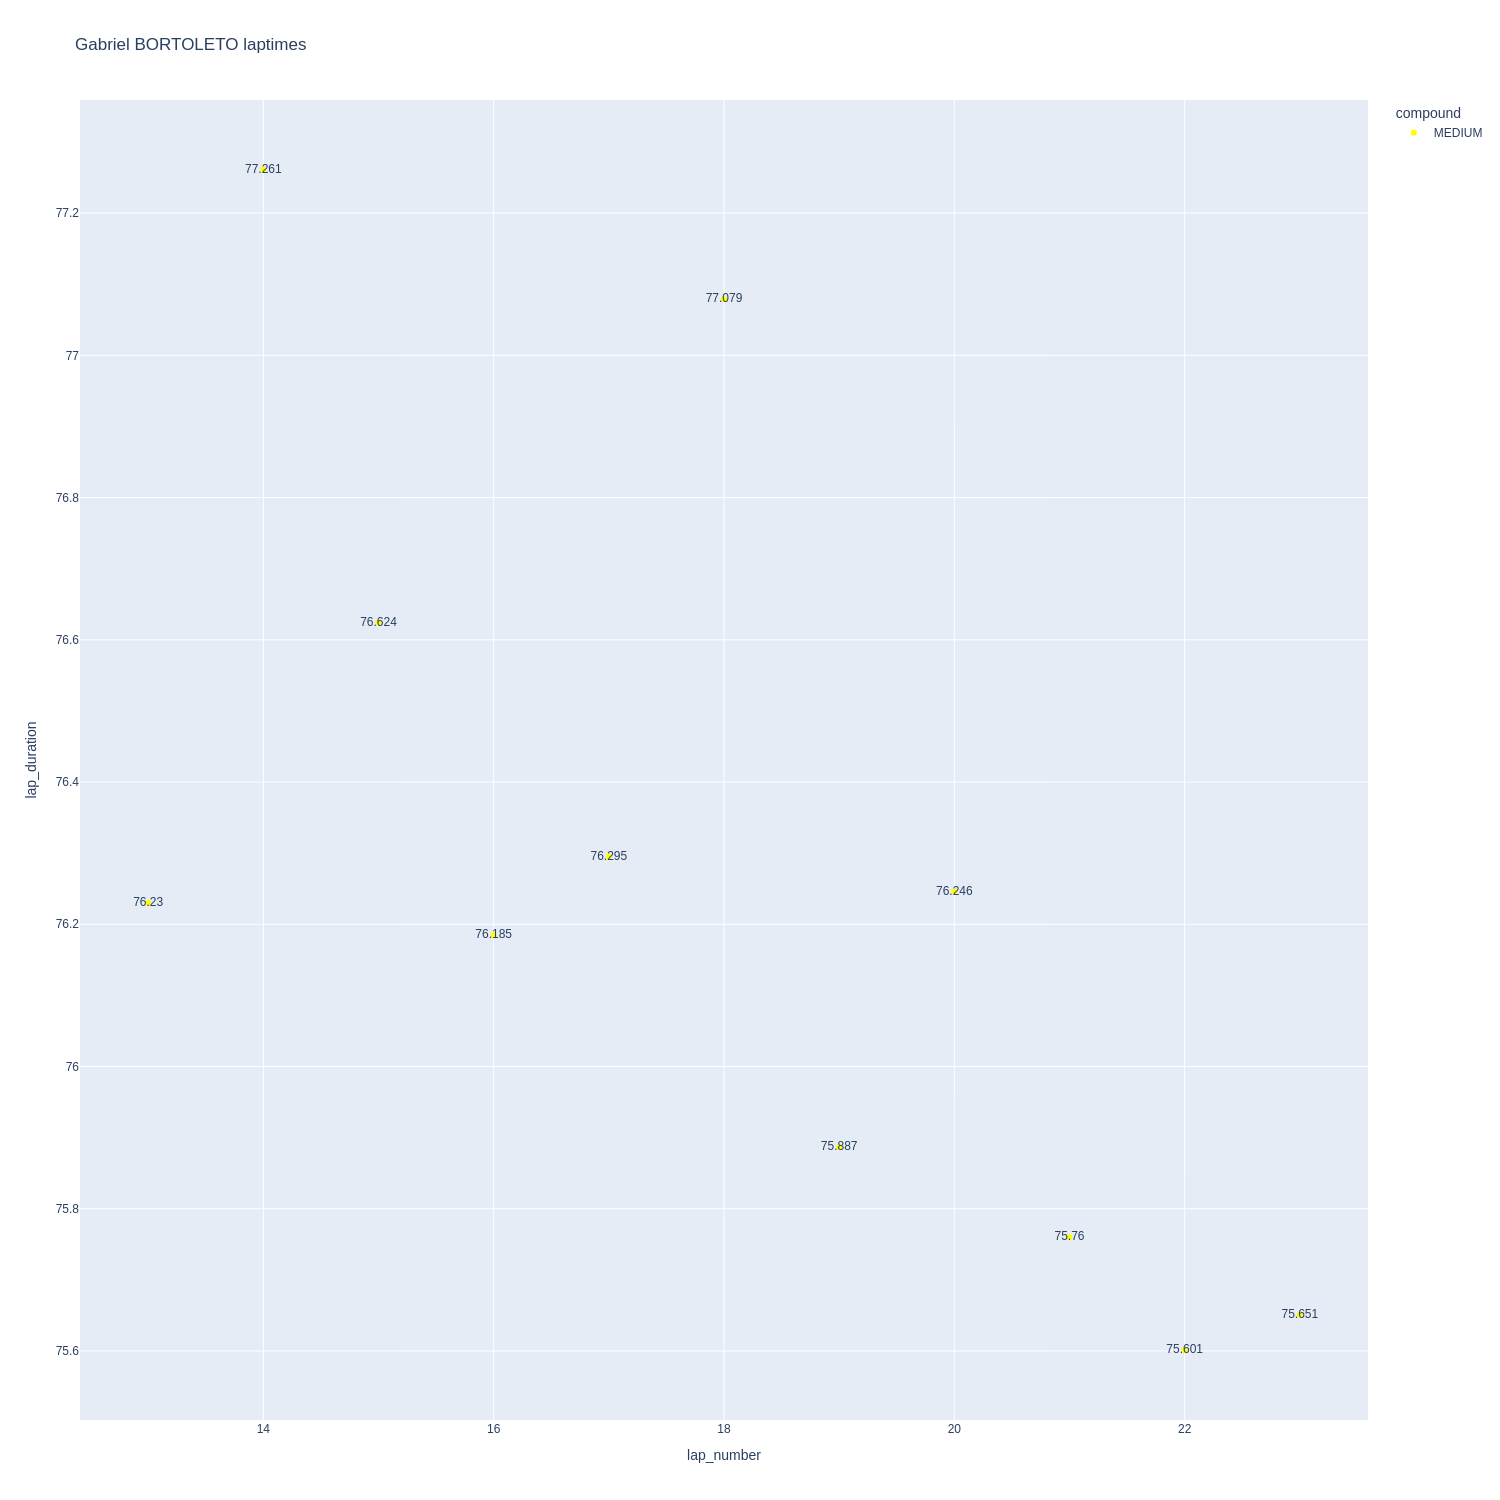

In [106]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

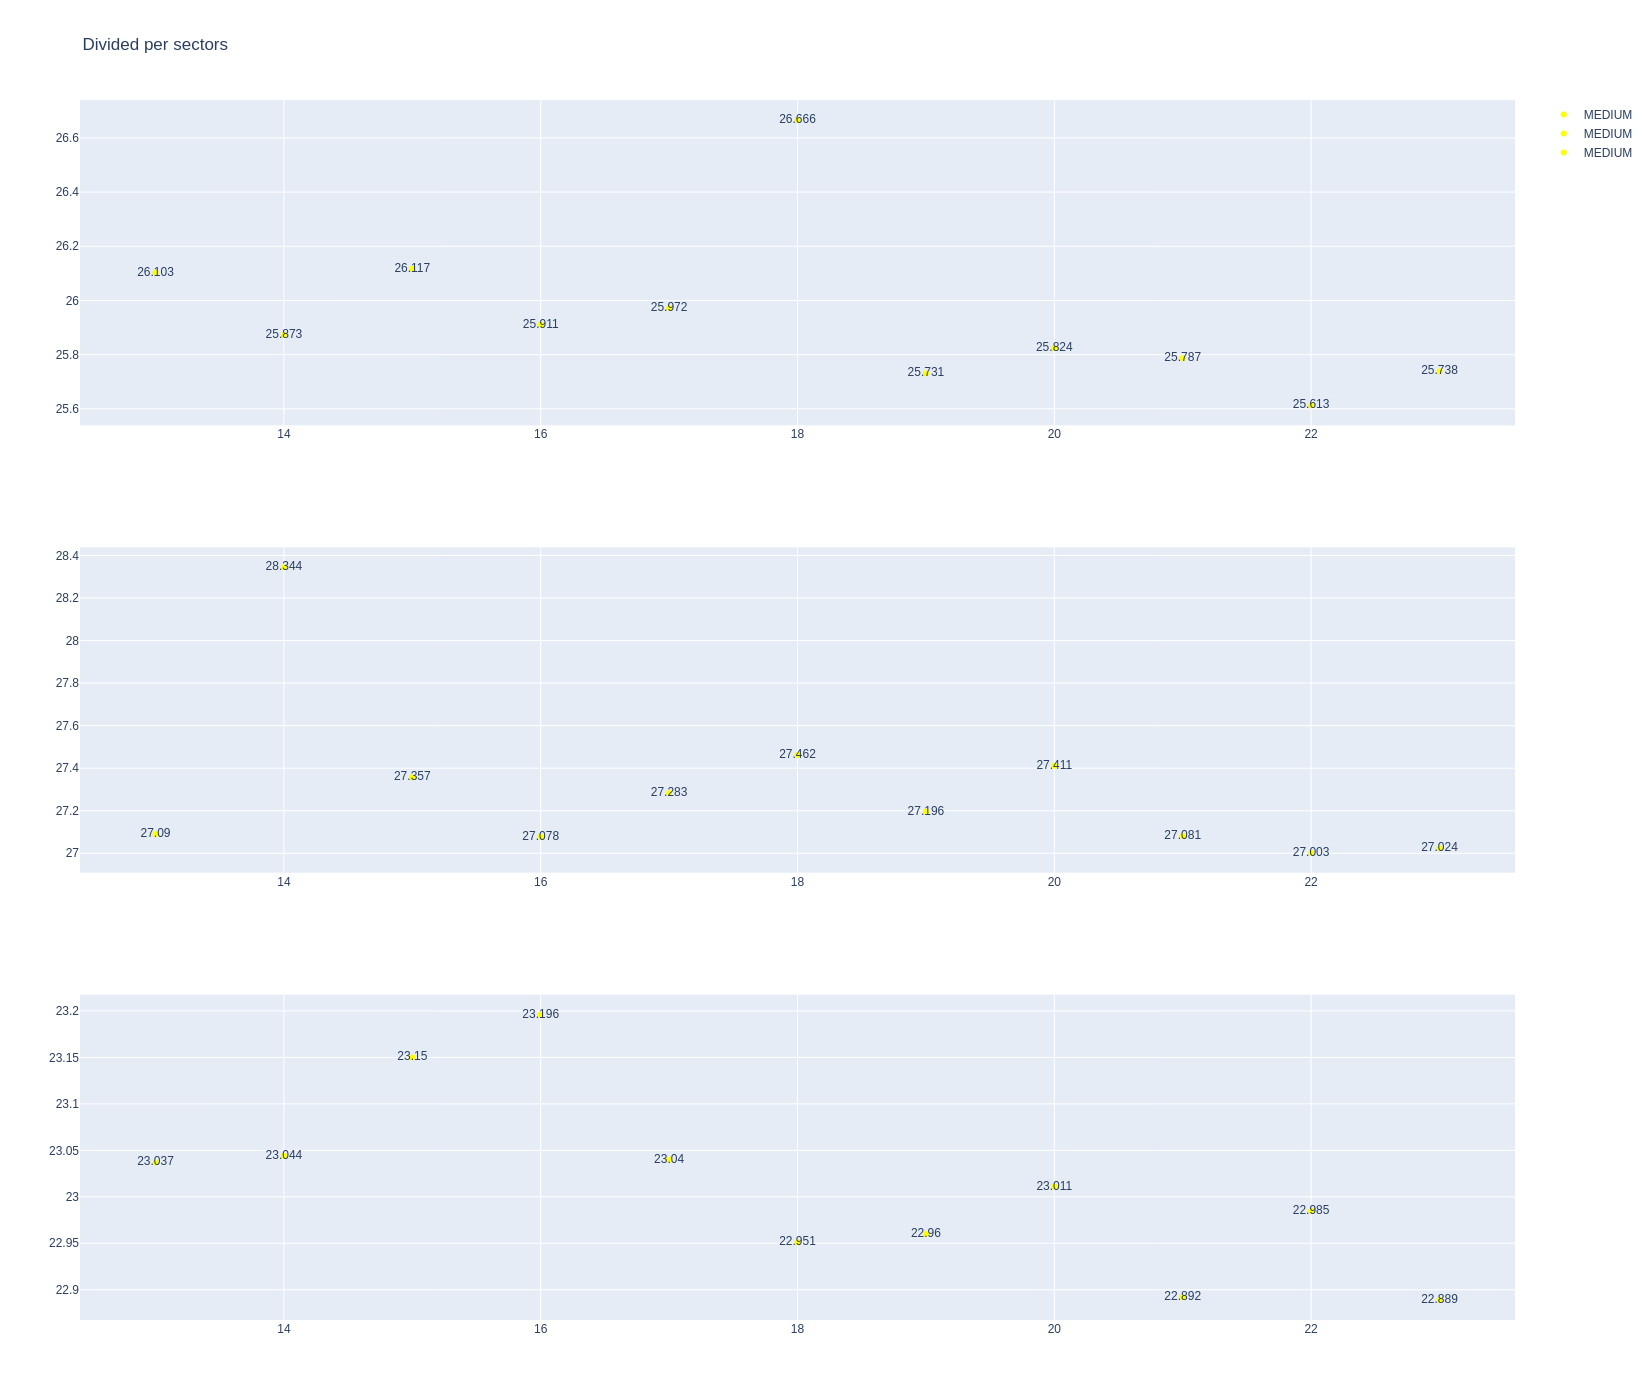

In [107]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [108]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
It seems that teams powered by HOnda suffers in S1 while Alpine had a good pace. It seems that Aston is the fourth team in race pace witrh softs and mediums.
Aston in S2 is competitive. Colapinto's pace in S3 is interesting and Stroll suffers here.

In [109]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [110]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
11   Franco COLAPINTO     SOFT     75.178000  25.479000  26.982000  22.717000
1        Lando NORRIS   MEDIUM     75.240250  25.283000  27.167250  22.790000
12     Lewis HAMILTON     HARD     75.452000  25.367333  26.736000  23.348667
4     Fernando ALONSO   MEDIUM     75.501000  25.563667  27.087667  22.849667
14     George RUSSELL     HARD     75.533875  25.522750  27.162500  22.848625
0      Max VERSTAPPEN     SOFT     75.640571  25.480857  27.261286  22.898429
16     Oliver BEARMAN   MEDIUM     75.656083  25.564083  27.206750  22.885250
13       Carlos SAINZ     HARD     75.658556  25.461667  27.376333  22.820556
10       Esteban OCON   MEDIUM     75.692800  25.824200  27.044600  22.824000
15      Oscar PIASTRI   MEDIUM     75.881500  25.384250  27.387125  23.110125
8     Nico HULKENBERG   MEDIUM     75.959250  25.733083  27.080750  23.145417
9         Liam LAWSON     SOFT     76.084400  25.657000  27.010600  23.416800
5     Charles LECLERC     SOFT     76.250000  25.538000  27.297500  23.414500
2   Gabriel BORTOLETO   MEDIUM     76.256273  25.939545  27.302636  23.014091
6        Yuki TSUNODA   MEDIUM     76.292625  25.876875  27.445000  22.970750
3        Pierre GASLY   MEDIUM     76.438778  25.993111  27.279444  23.166222
7     Alexander ALBON     HARD     76.745000  24.501000  25.681000  26.563000

##### Sorted by sector 1

In [111]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
7     Alexander ALBON     HARD  24.501000
1        Lando NORRIS   MEDIUM  25.283000
12     Lewis HAMILTON     HARD  25.367333
15      Oscar PIASTRI   MEDIUM  25.384250
13       Carlos SAINZ     HARD  25.461667
11   Franco COLAPINTO     SOFT  25.479000
0      Max VERSTAPPEN     SOFT  25.480857
14     George RUSSELL     HARD  25.522750
5     Charles LECLERC     SOFT  25.538000
4     Fernando ALONSO   MEDIUM  25.563667
16     Oliver BEARMAN   MEDIUM  25.564083
9         Liam LAWSON     SOFT  25.657000
8     Nico HULKENBERG   MEDIUM  25.733083
10       Esteban OCON   MEDIUM  25.824200
6        Yuki TSUNODA   MEDIUM  25.876875
2   Gabriel BORTOLETO   MEDIUM  25.939545
3        Pierre GASLY   MEDIUM  25.993111

##### Sorted by sector 2

In [112]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
7     Alexander ALBON     HARD  25.681000
12     Lewis HAMILTON     HARD  26.736000
11   Franco COLAPINTO     SOFT  26.982000
9         Liam LAWSON     SOFT  27.010600
10       Esteban OCON   MEDIUM  27.044600
8     Nico HULKENBERG   MEDIUM  27.080750
4     Fernando ALONSO   MEDIUM  27.087667
14     George RUSSELL     HARD  27.162500
1        Lando NORRIS   MEDIUM  27.167250
16     Oliver BEARMAN   MEDIUM  27.206750
0      Max VERSTAPPEN     SOFT  27.261286
3        Pierre GASLY   MEDIUM  27.279444
5     Charles LECLERC     SOFT  27.297500
2   Gabriel BORTOLETO   MEDIUM  27.302636
13       Carlos SAINZ     HARD  27.376333
15      Oscar PIASTRI   MEDIUM  27.387125
6        Yuki TSUNODA   MEDIUM  27.445000

##### Sorted by sector 3

In [113]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
11   Franco COLAPINTO     SOFT  22.717000
1        Lando NORRIS   MEDIUM  22.790000
13       Carlos SAINZ     HARD  22.820556
10       Esteban OCON   MEDIUM  22.824000
14     George RUSSELL     HARD  22.848625
4     Fernando ALONSO   MEDIUM  22.849667
16     Oliver BEARMAN   MEDIUM  22.885250
0      Max VERSTAPPEN     SOFT  22.898429
6        Yuki TSUNODA   MEDIUM  22.970750
2   Gabriel BORTOLETO   MEDIUM  23.014091
15      Oscar PIASTRI   MEDIUM  23.110125
8     Nico HULKENBERG   MEDIUM  23.145417
3        Pierre GASLY   MEDIUM  23.166222
12     Lewis HAMILTON     HARD  23.348667
5     Charles LECLERC     SOFT  23.414500
9         Liam LAWSON     SOFT  23.416800
7     Alexander ALBON     HARD  26.563000

#### Long runs mean

In [114]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [115]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
1       L NORRIS         75.240
4       F ALONSO         75.501
16     O BEARMAN         75.656
10        E OCON         75.693
15     O PIASTRI         75.882
8   N HULKENBERG         75.959
2    G BORTOLETO         76.256
6      Y TSUNODA         76.293
3        P GASLY         76.439

In [116]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
11   F COLAPINTO         75.178
0   M VERSTAPPEN         75.183
9       L LAWSON         75.642
5      C LECLERC         76.250

In [117]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
12  L HAMILTON         75.460
14   G RUSSELL         75.534
13     C SAINZ         75.659
7      A ALBON         76.745

## Free Practice 3
### Obtain setup

In [118]:
practice = libraryDataF1.obtain_information('laps',session_key=9915)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9915)
drivers = libraryDataF1.obtain_information('drivers',session_key=9915)

In [119]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [120]:
session = ff1.get_session(2025, 15, 'FP3')
session.load();

req         WARNING 	DEFAULT CACHE ENABLED! (4.73 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Dutch Grand Prix - Practice 3 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status dat

### Speed trap
Aston Martin set up the car centered on straights as Red Bull and Racing Bulls. Otherwise, McLaren, Alpine and Ferrari centered on the turns.

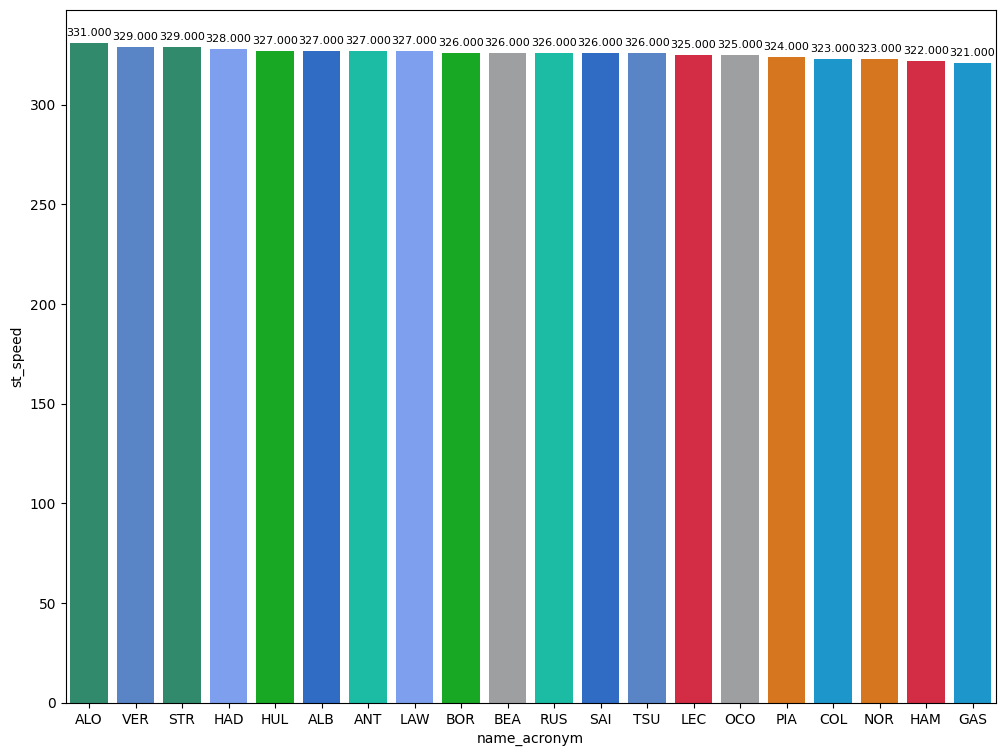

In [121]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

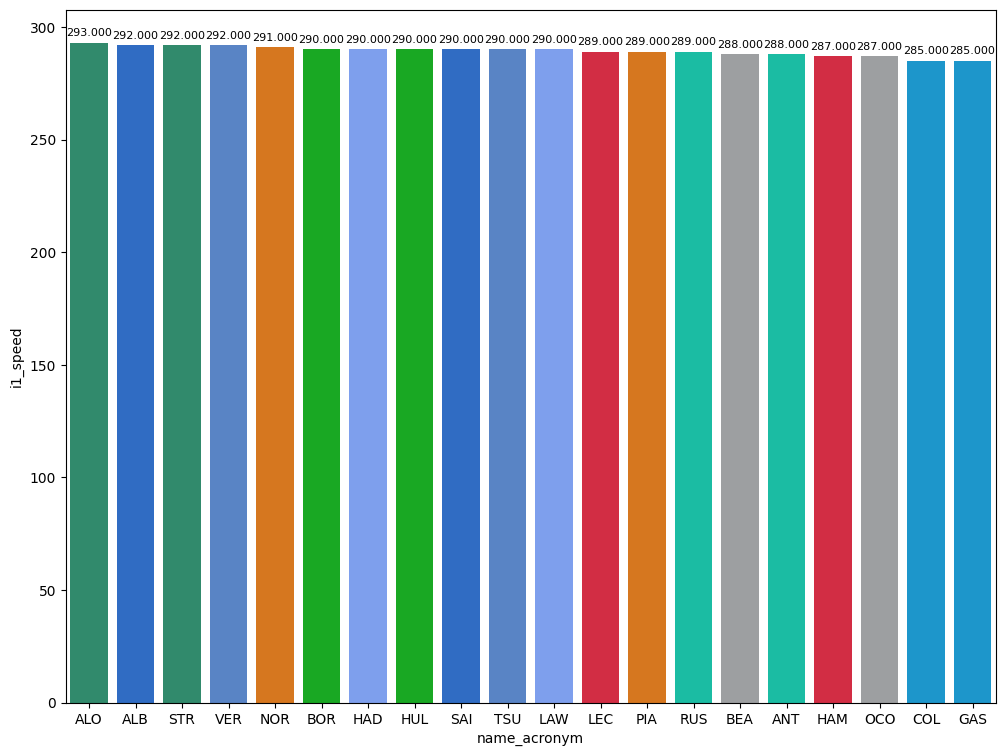

In [122]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

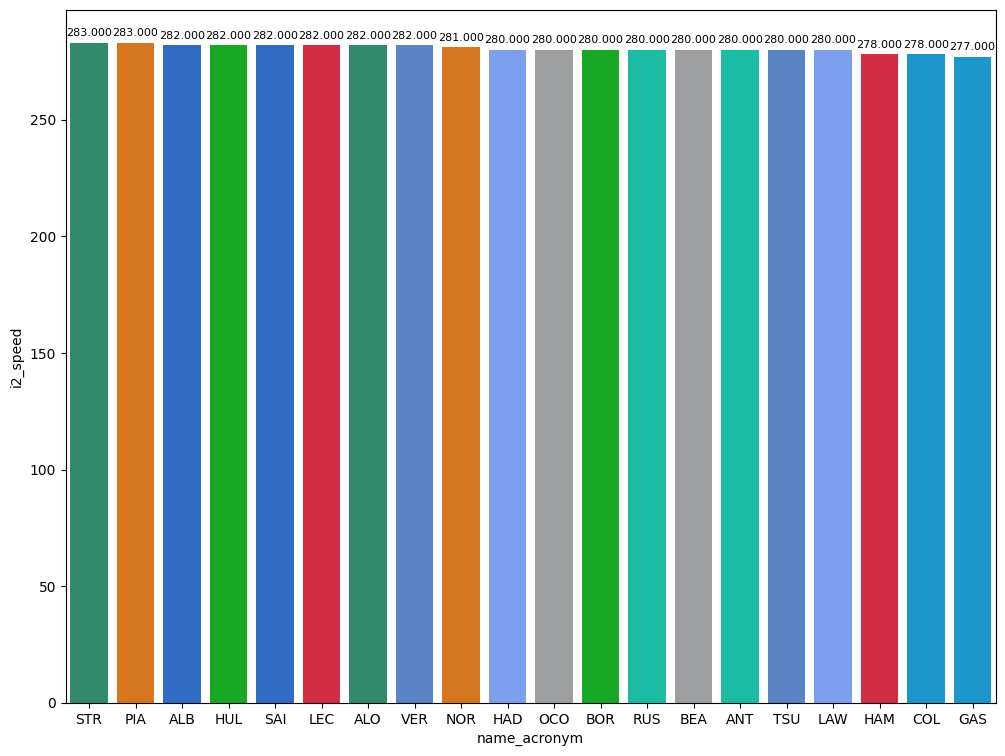

In [123]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [124]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name      compound  duration_sector_1  duration_sector_2  \
133  Oliver BEARMAN          HARD             24.167             25.247   
27     Pierre GASLY  INTERMEDIATE             28.454             30.193   
200  George RUSSELL        MEDIUM             24.280             24.975   
241    Lando NORRIS          SOFT             23.561             24.469   

     duration_sector_3  lap_duration  
133             21.212        70.626  
27              25.078        83.725  
200             21.215        70.470  
241             20.942        68.972

### Deltas
Last attemp showed McLaren as dominant so far. For being the second team, Williams, Mercedes and Aston Martin (unfortuntely for ALO, he was unable to finish his fastest attemp, will be there). Haas and Alpine are candidates to knocked-out in Q1. ANT attemp was interrupted by STR.

In [125]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


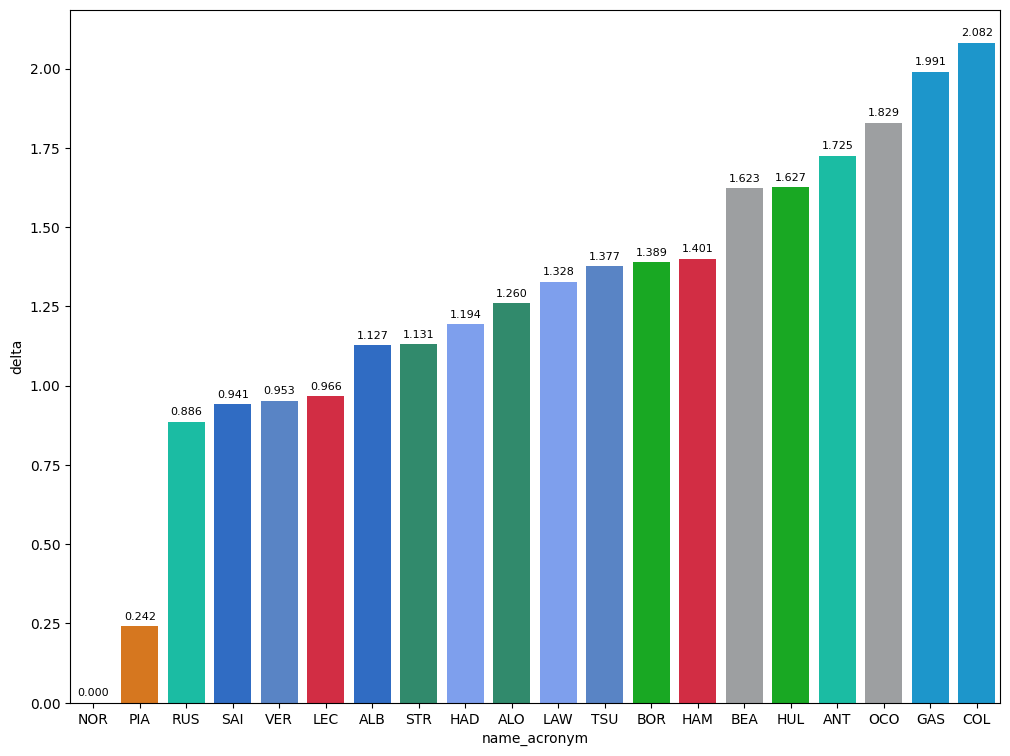

In [126]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
S1: Williams is fast here, mainly Sainz, and they could be candidate to get a good position thanks to this sector. Leak point for Haas and Alpine.
S2: Mercedes could take advantage of this sector to get a good position. Sauber could pass to Q2 thanks to this sector.
S3: Sauber and Racing Bulls are very comeptitive and it could help to pass to Q2 or in case of RB reaching Q3. BOR must maximize this sector to reach Q3.

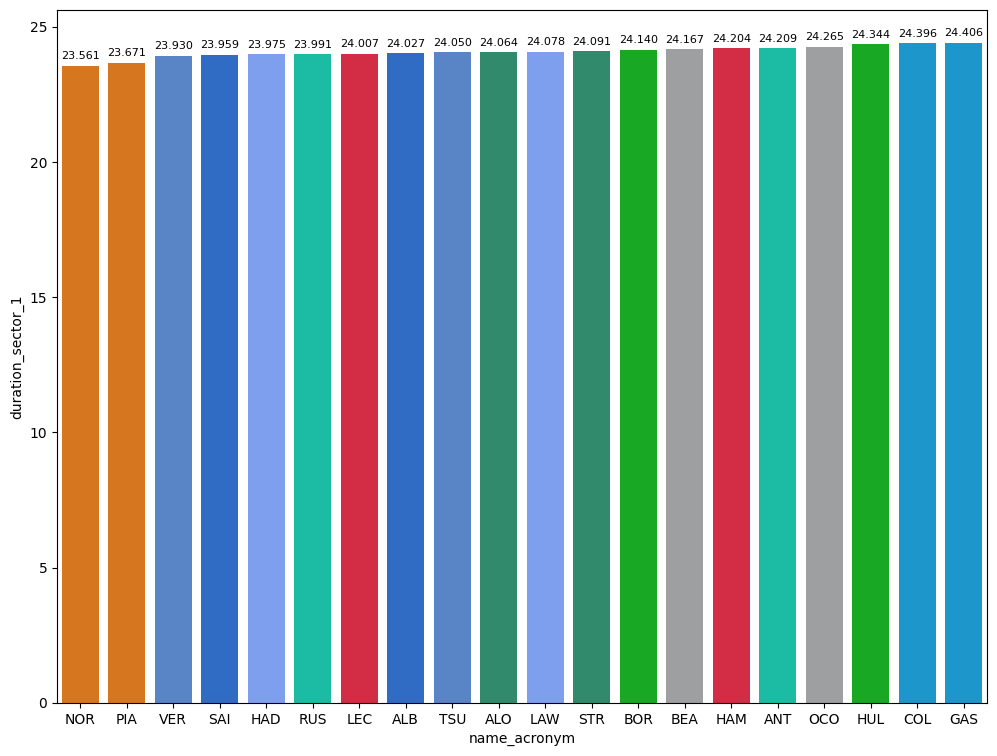

In [127]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

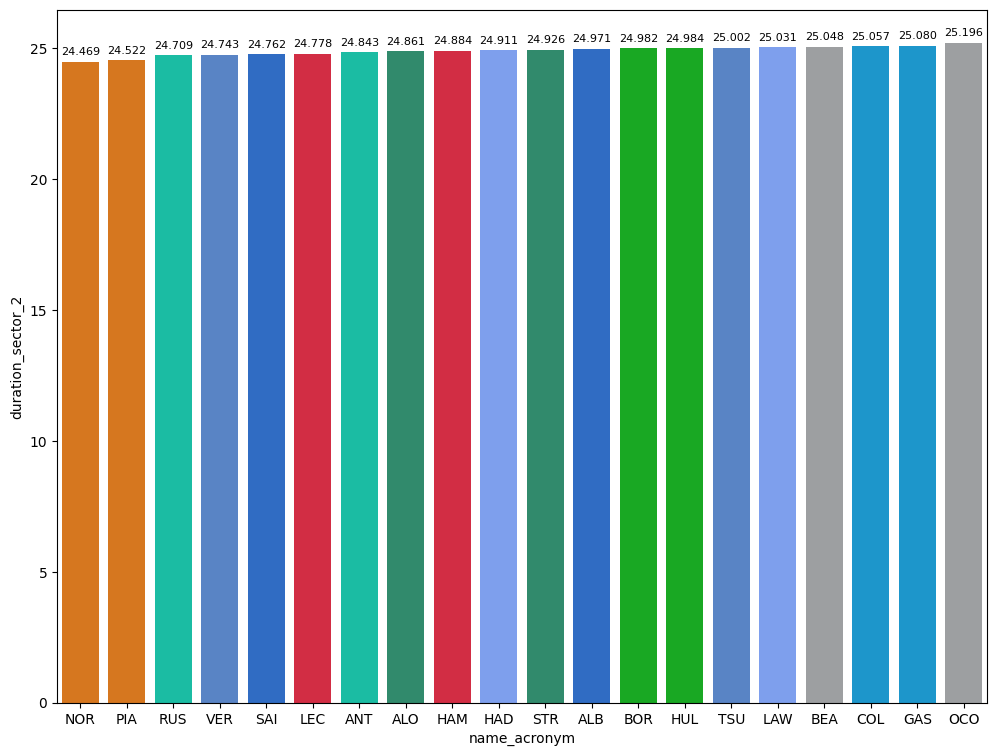

In [128]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

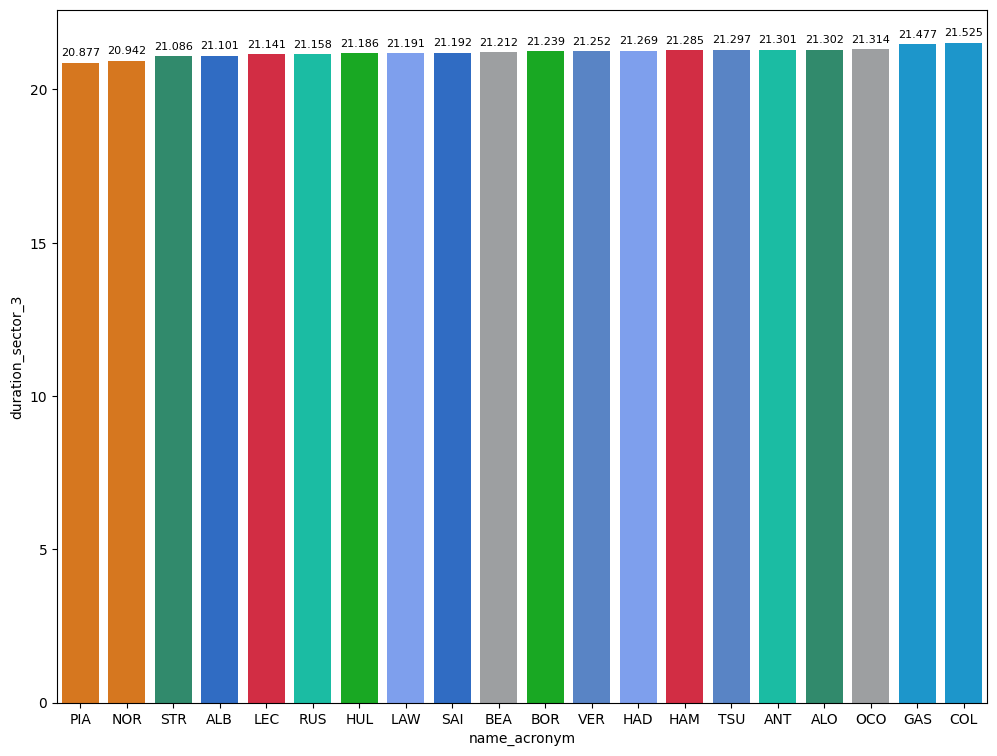

In [129]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [130]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration <134").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound                  
MEDIUM           89.414828
HARD             90.772644
INTERMEDIATE     92.173000
SOFT             93.947595

### Comparaison between the poleman and the second

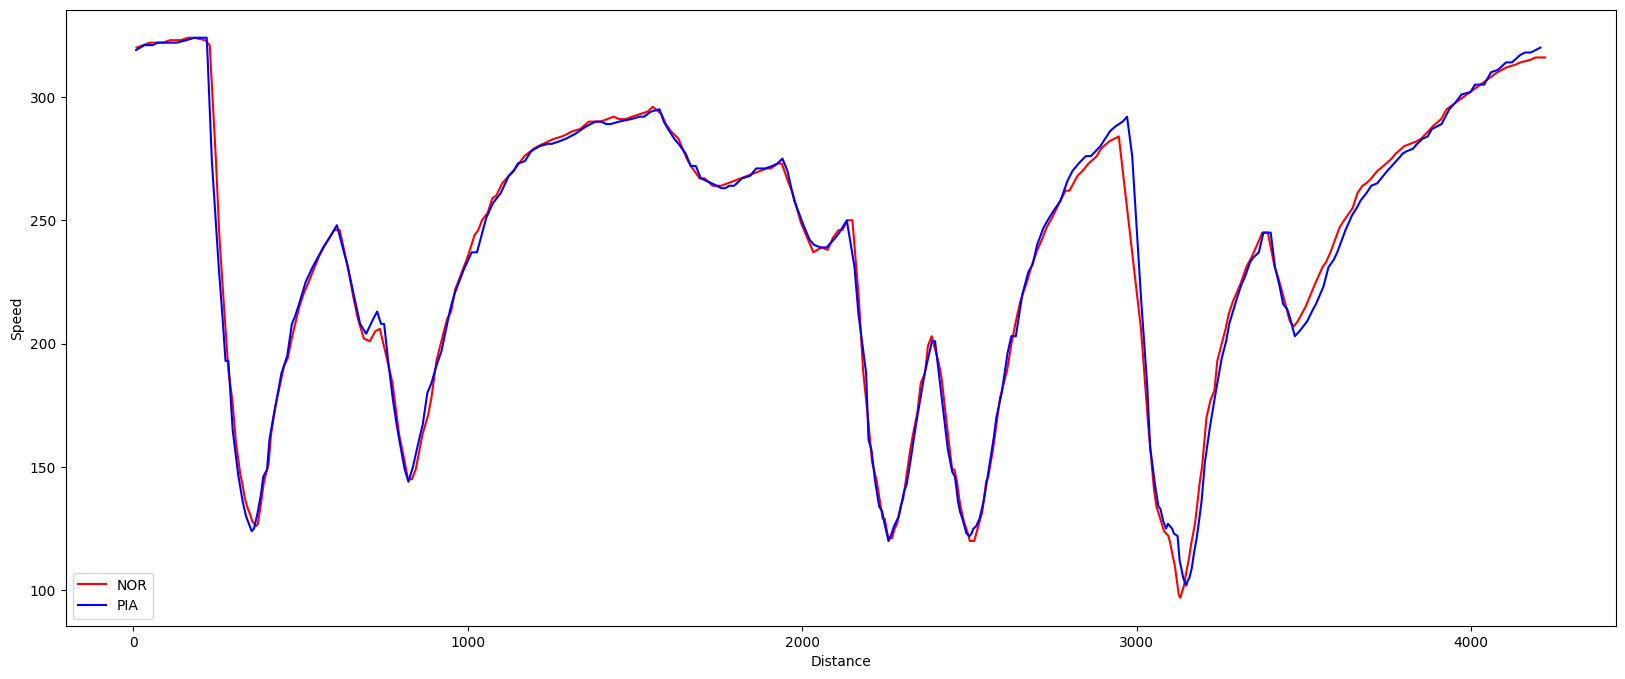

In [131]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

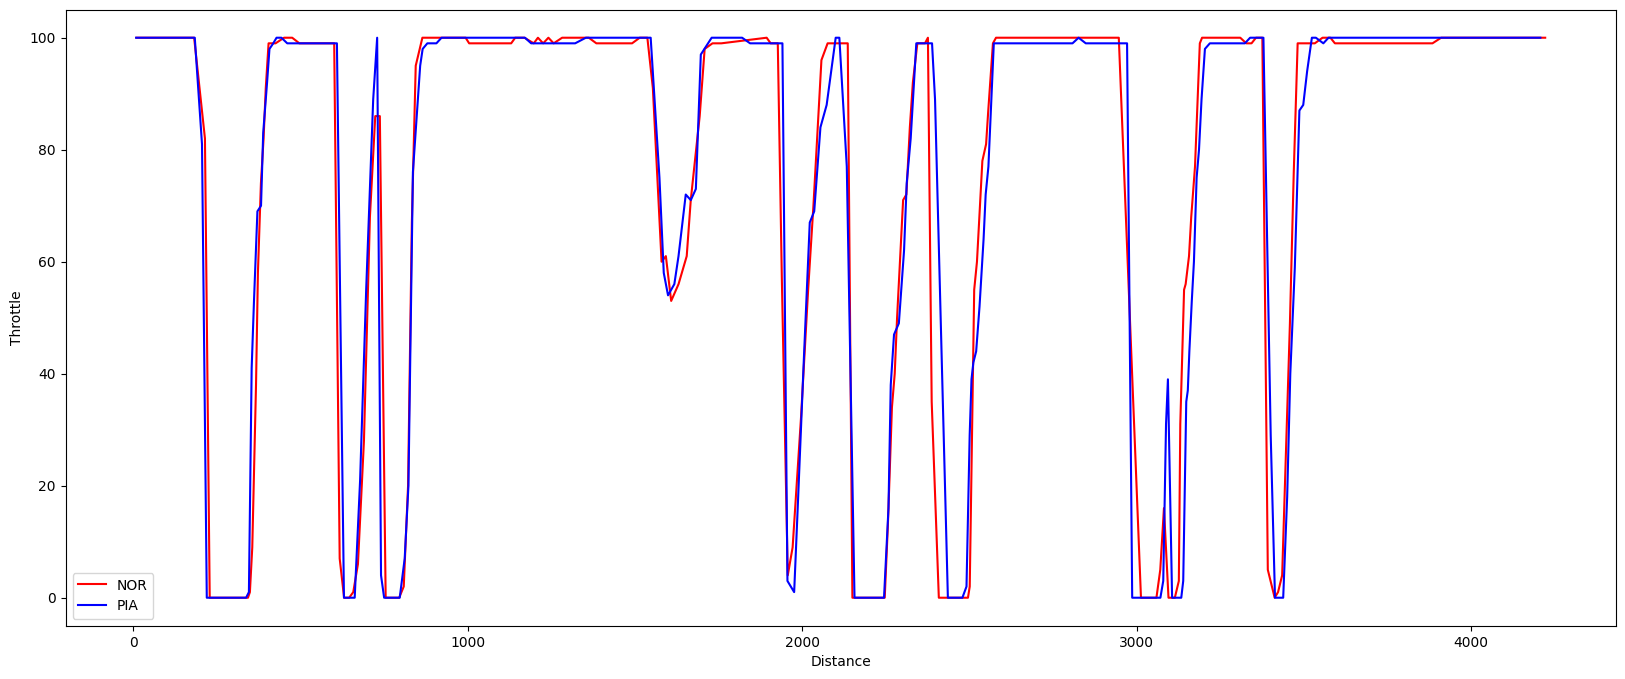

In [132]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

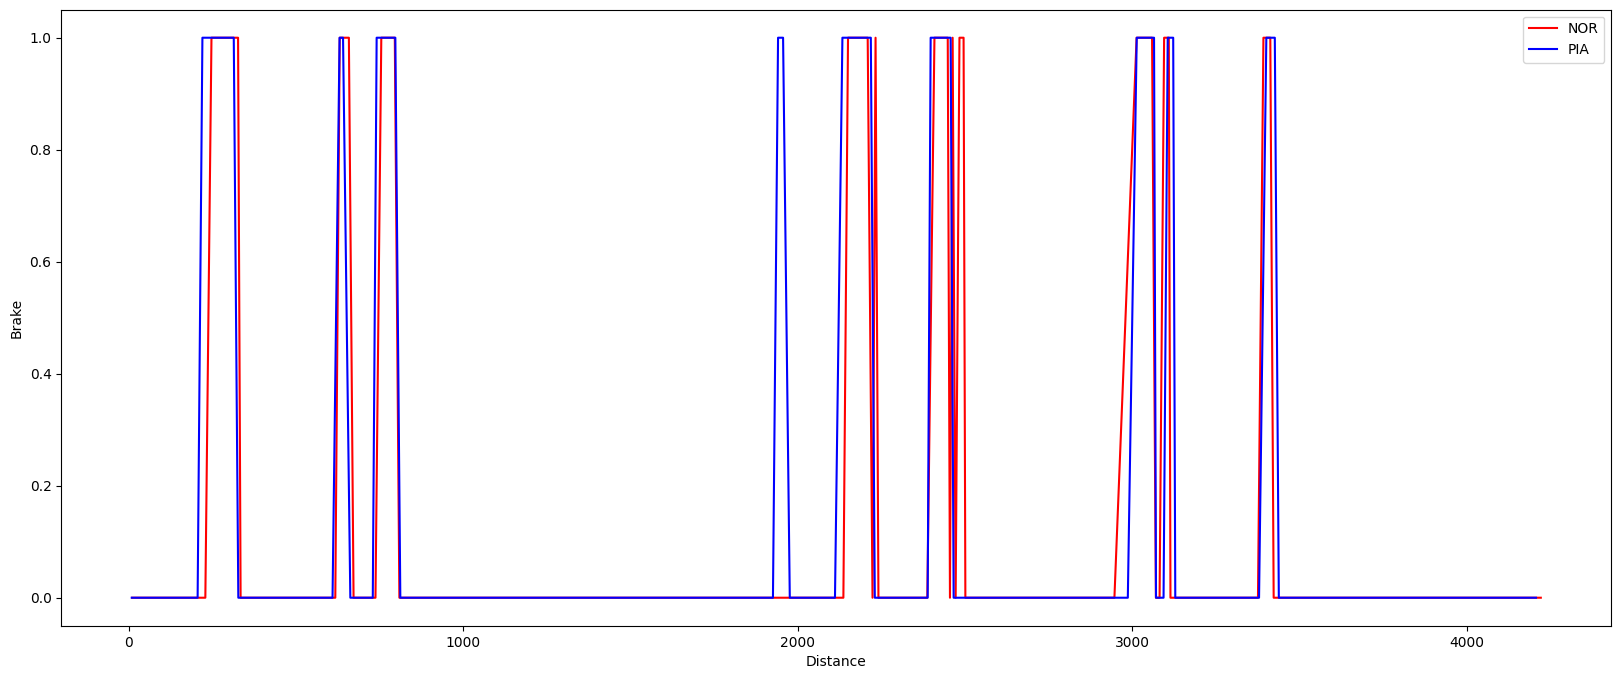

In [133]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

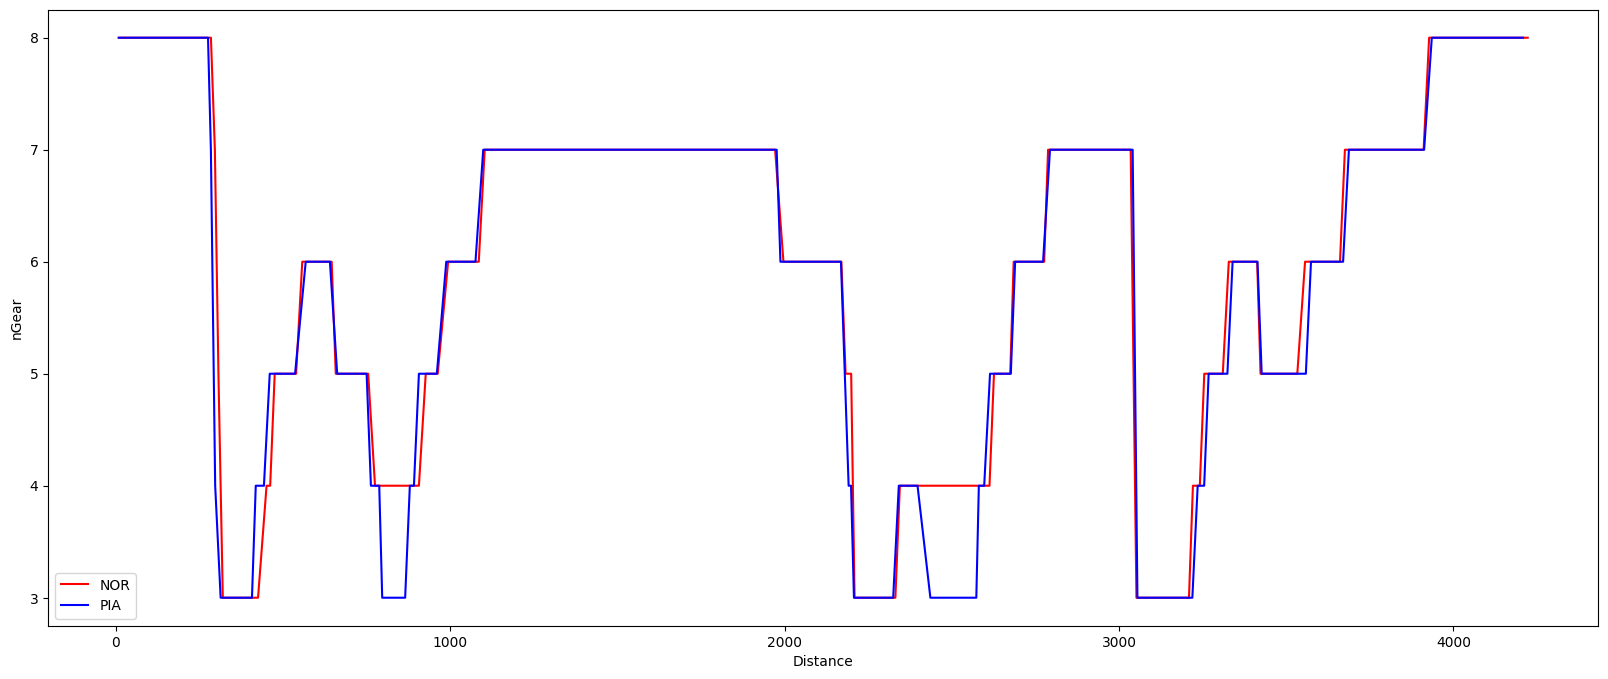

In [134]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Predictions

In [3]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9913)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9913)
drivers = libraryDataF1.obtain_information('drivers',session_key=9913)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
practice = libraryDataF1.obtain_information('laps',session_key=9914)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9914)
drivers = libraryDataF1.obtain_information('drivers',session_key=9914)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [6]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice2,jointablesfreepractice2],drivers,0.04,0.05,0.03)
qualy_simulation.sort_values(by='qualy_lap_time')

team  qualy_lap_time  mean_sector_1  mean_sector_2  \
6     Aston Martin       70.454000        24.0080      24.925333   
1          McLaren       70.660262        24.0265      25.031429   
7          Ferrari       71.029300        24.1265      25.248200   
0  Red Bull Racing       71.076033        24.2490      25.120833   
5         Mercedes       71.217500        24.2660      25.262500   
9     Haas F1 Team       71.361367        24.3650      25.369167   
3     Racing Bulls       71.501333        24.4320      25.319000   
4           Alpine       71.585871        24.5875      25.185571   
8         Williams       71.665100        24.1245      25.464400   
2      Kick Sauber       71.797567        24.6515      25.271667   

   mean_sector_3  
6      21.520667  
1      21.602333  
7      21.654600  
0      21.706200  
5      21.689000  
9      21.627200  
3      21.750333  
4      21.812800  
8      22.076200  
2      21.874400

### Race prediction

In [7]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice2,drivers,74.5,79.8)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

mean_lap_duration  mean_sector_1  mean_sector_2  \
team                                                               
Aston Martin             75.363500      25.538750      26.979500   
Mercedes                 75.391000      25.482600      27.133200   
Haas F1 Team             75.582958      25.711375      27.054708   
Alpine                   75.862300      25.845450      27.075550   
McLaren                  75.945522      25.320000      27.270622   
Racing Bulls             76.084400      25.657000      27.010600   
Kick Sauber              76.208667      25.848542      27.219708   
Red Bull Racing          76.329372      25.779306      27.438617   
Ferrari                  76.366800      25.590567      26.785500   
Williams                 76.953778      25.117083      26.564667   

                 mean_sector_3  
team                            
Aston Martin         22.845250  
Mercedes             22.775200  
Haas F1 Team         22.816875  
Alpine               22.941300  
McLaren              23.354900  
Racing Bulls         23.416800  
Kick Sauber          23.140417  
Red Bull Racing      23.111450  
Ferrari              23.990733  
Williams             25.272028

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9578)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9578)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9578)
drivers = libraryDataF1.obtain_information('drivers',session_key=9578)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 15, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
# laptimes_deleted = [115.370,96.993,109.924,104.377,102.586,128.082,95.902,102.051]
# driver_number_lap_deleted = [4,63,1,24,22,14,55,23]

# for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
#     try:
#         id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
#         qualyfing = qualyfing.drop(id_deleted)
#     except:
#         print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 69.673 seconds (1.04.314= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 75.24 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 75.24")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-08-24T13:23:13+00:00'"
maximumDateQ2 = "date_start <'2024-08-24T13:48:00+00:00' and date_start >'2024-08-24T13:23:13+00:00'"
maximumDateQ3 = "date_start >'2024-08-24T13:48:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. A lot of drivers decided to use two compounds for the track improvement and the differences were very narrow. Using F1 Tempo as support to watch the telemetry and the section where laptimes from drivers eliminated are compared with the driver at risk I will do the analysis. Up to turn 3, Bottas was the fastest with 60 miliseconds of difference. Since this turn until turn 7 Hulkenberg was faster than them in this section but, it was not enough to be the quickest because after the exit of sector 1, Ocon was the fastest with 86 miliseconds compared to Hulkenberg.
In the exit of turn 8, Ocon's car was the best, getting 3 tenths of difference that kept until the exit of the turn 10. In the straight, Ocon lost his gap being the slowest of the group, such a degree that his difference with Hulkenberg was two tenths in favour of the german driver. As we can see in the comparative table, Ricciardo was the fastest in this sector but the difference gained it was not enough to be the fastest in overrall.
In the sector 3, Ocon and Hulkenberg were fighting for the position. Ocon was faster at the exit of the last turn, but, Hulkenberg gained the battle thanks to the DRS.
Compared with the drivers whose laptime were faster than Hulkenberg, only Gasly was near Hulkenberg. In sector 1, Hulkenberg was 2 tenths slower than Gasly and ,even though, he was faster in the next sectors, the gap that he gained was not enough to pass Gasly.


In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.
The session was a madness with a close battle among Ferrari,Albon ,Hamilton and both Aston Martin.
 Alonso's car configuration was better in turns, as we can see in the exit of the turns 1 and 3, but he suffered on the straights with Sainz recovering the lost time in the straight after the exit of the turn 3. After the first sector, Hamilton was 8 miliseconds behind Alonso and Sainz 1 tenth.
 It seemed that Hamilton had a similar configuration than Fernando because in the turns, the fight between them was very close. With Sainz being faster on the straights. At the exit of the second sector, Hamilton was the fastest with 18 miliseconds of difference compared with Alonso.
 Since this sector, Sainz was the fastest, mainly thanks for the main straight of the circuit. Unfortunately, for the Spaniard driver, the gap that he gained was not enough to beat Alonso.
 
 Compared with Gasly, Alonso was faster on the turns but the gap was not enugh to beat the French driver that took advantage of his pace on the straights.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
As we were able to see in Q1, the second sector was crucial to pass to Q3. In the Checo's case he lost 2 tenths with Albon in the sector 1 and 3 tenths in the third sector but his second sector was enough to pass to Q3 but the gap was very close.3 militenths.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.
Norris showed his pace with a pole 3 tenths faster than Verstappen's laptime the it was an incredible lap. Verstappen, who suffered in the second sector, decided to take care of the tyre in the first sector to try to obtain a better laptime. Unfortunately the difference that Norris got with the gap gained in the last sector meant that Norris took the pole


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9582)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9582)
drivers = libraryDataF1.obtain_information('drivers',session_key=9582)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >74 and lap_duration <=78.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >74 and lap_duration <=78.5").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >74 and lap_duration <=78.5").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >74 and lap_duration <=78.5").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >74 and lap_duration <=78.5").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 74
MAXIMUM_SECONDS = 78.5

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9582)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration